In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import derivative
from scipy.signal import find_peaks
from statistics import stdev,mean
import itertools as itr
import math
import pprint, pickle

In [2]:
def length(x1,x2,y1,y2,z1,z2):
    output=(math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2))
    return output
def thigh_r(k):
    l_xy=length(key_array[k][24][0],key_array[k][26][0],key_array[k][24][1],key_array[k][26][1],0,0)
    visi=key_array[k][24][4]*key_array[k][26][4]
    return l_xy,visi

def thigh_l(k):
    l_xy=length(key_array[k][23][0],key_array[k][25][0],key_array[k][23][1],key_array[k][25][1],0,0)
    visi=key_array[k][23][4]*key_array[k][25][4]
    return l_xy,visi

def shank_r(k):
    l_xy=length(key_array[k][28][0],key_array[k][26][0],key_array[k][26][1],key_array[k][28][1],0,0)
    visi=key_array[k][28][4]*key_array[k][26][4]
    return l_xy,visi

def shank_l(k):
    l_xy=length(key_array[k][27][0],key_array[k][25][0],key_array[k][27][1],key_array[k][25][1],0,0)
    visi=key_array[k][27][4]*key_array[k][25][4]
    return l_xy,visi

def ankle_to_heel_r(k):
    l_xy=length(key_array[k][28][0],key_array[k][30][0],key_array[k][28][1],key_array[k][30][1],0,0)
    visi=key_array[k][28][4]*key_array[k][30][4]
    return l_xy,visi

def ankle_to_heel_l(k):
    l_xy=length(key_array[k][27][0],key_array[k][29][0],key_array[k][27][1],key_array[k][29][1],0,0)
    visi=key_array[k][27][4]*key_array[k][29][4]
    return l_xy,visi

def ubl(k):
    l_xy=upper_body(key_array[k][11][0],key_array[k][12][0],key_array[k][23][0],key_array[k][24][0],key_array[k][11][1],key_array[k][12][1],key_array[k][23][1],key_array[k][24][1],0,0,0,0)
    return l_xy
def upper_body(x11,x12,x23,x24,y11,y12,y23,y24,z11,z12,z23,z24):
    output=math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2+(((z11+z12)/2)-((z23+z24)/2))**2)
    return output
def center(k):
    cent=(key_array[k][11][0]+key_array[k][12][0]+key_array[k][23][0]+key_array[k][24][0])/4
    return cent

def shoulder(k):
    l_xy=length(key_array[k][11][0],key_array[k][12][0],key_array[k][11][1],key_array[k][12][1],0,0)
    visi=key_array[k][11][4]*key_array[k][12][4]
    return l_xy,visi

def hip_size(k):
    l_xy=length(key_array[k][24][0],key_array[k][23][0],key_array[k][24][1],key_array[k][23][1],0,0)
    visi=key_array[k][24][4]*key_array[k][23][4]
    return l_xy,visi

def upper_arm_r(k):
    l_xy=length(key_array[k][12][0],key_array[k][14][0],key_array[k][12][1],key_array[k][14][1],0,0)
    visi=key_array[k][12][4]*key_array[k][14][4]
    return l_xy,visi

def upper_arm_l(k):
    l_xy=length(key_array[k][11][0],key_array[k][13][0],key_array[k][11][1],key_array[k][13][1],0,0)
    visi=key_array[k][11][4]*key_array[k][13][4]
    return l_xy,visi

def lower_arm_r(k):
    l_xy=length(key_array[k][16][0],key_array[k][14][0],key_array[k][16][1],key_array[k][14][1],0,0)
    visi=key_array[k][16][4]*key_array[k][14][4]
    return l_xy,visi

def lower_arm_l(k):
    l_xy=length(key_array[k][15][0],key_array[k][13][0],key_array[k][15][1],key_array[k][13][1],0,0)
    visi=key_array[k][15][4]*key_array[k][13][4]
    return l_xy,visi

def palm_to_finger_r(k):
    l_xy=length(key_array[k][16][0],key_array[k][20][0],key_array[k][16][1],key_array[k][20][1],0,0)
    visi=key_array[k][16][4]*key_array[k][20][4]
    return l_xy,visi

def palm_to_finger_l(k):
    l_xy=length(key_array[k][15][0],key_array[k][19][0],key_array[k][15][1],key_array[k][19][1],0,0)
    visi=key_array[k][15][4]*key_array[k][19][4]
    return l_xy,visi

def face_width(k):
    l_xy=length(key_array[k][7][0],key_array[k][8][0],key_array[k][7][1],key_array[k][8][1],0,0)
    visi=key_array[k][7][4]*key_array[k][8][4]
    return l_xy,visi

def mouth_width(k):
    l_xy=length(key_array[k][9][0],key_array[k][10][0],key_array[k][9][1],key_array[k][10][1],0,0)
    visi=key_array[k][9][4]*key_array[k][10][4]
    return l_xy,visi

def eye_size(k):
    l_xy=length(key_array[k][4][0],key_array[k][6][0],key_array[k][4][1],key_array[k][6][1],0,0)
    visi=key_array[k][4][4]*key_array[k][6][4]
    return l_xy,visi

def eyes_midpoints(k):
    l_xy=length(key_array[k][5][0],key_array[k][2][0],key_array[k][5][1],key_array[k][2][1],0,0)
    visi=key_array[k][5][4]*key_array[k][2][4]
    return l_xy,visi

def get_peaks(df,y,p):
    peak, _ = find_peaks(y,prominence=p)
    plt.figure(figsize=(20,5))
    #plt.xlim(0, 50)
    #plt.ylim(0, 60)
    plt.plot(df.t,y)
    plt.plot(df.t[peak], y[peak], "X",markerfacecolor='red',markersize=8)
    plt.show()
    return peak

def remove_distinct_peaks(array,df,Time_to_index_ratio,y,p,m):
    modified_mean= mean(array)
    Distance=Time_to_index_ratio*modified_mean*m
    
    peaks, _ = find_peaks(y,prominence=p,distance=Distance)
    plt.figure(figsize=(20,5))
    #plt.xlim(0, 50)
    plt.plot(df.t,y)
    plt.plot(df.t[peaks], y[peaks],"X",markerfacecolor='red',markersize=8)
    plt.show()
    return peaks

def time_diff(peaks, df):
    array=[]
    for i in range(len(peaks)-1):
        td=df.t[peaks[i+1]]-df.t[peaks[i]]
        array.append(td)
    return array

def step_width(x11,x12,x23,x24,y11,y12,y23,y24,x29,x30):
    step_width=abs(x30 - x29)
    body_length = math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2)
    output = step_width/body_length
    #output = step_wid
    return output

def pelvic_obliquity(x23,x24,y23,y24):
    output=math.atan((abs(y23-y24))/(abs(x23-x24)))
    return output

def foot_lifting(y28,y27,x11,x12,x23,x24,y11,y12,y23,y24):
    body_length = math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2)
    output=(y28 - y27)/body_length
    return output

def step_length(x11,x12,x23,x24,y11,y12,y23,y24,z27,z28):
    step_length=abs(z28 - z27)
    body_length = math.sqrt((((x11+x12)/2)-((x23+x24)/2))**2+(((y11+y12)/2)-((y23+y24)/2))**2)
    output = step_length/body_length
    #output = step_len
    return output




# Caution

In [3]:
##per step 
def calculate_averages(indices, lbl_r):
    result=[]
    time=[]
    for i in range(0, len(indices)-1):
        start_idx = indices[i]
        end_idx = indices[i+1]
        t1=df_para.t[start_idx]
        print('t1',t1)
        avg = lbl_r.iloc[start_idx:end_idx+1].mean()
        #print(avg)
        result.append(avg)
        time.append(t1)

    print('results',result)        
    out=[result,time]
    df_out=pd.DataFrame(out)
    df_out=df_out.transpose()
    return df_out

In [4]:
##per step 
def calculate_averages_visi(indices, lbl_r):
    result=[]
    for i in range(0, len(indices)-1):
        start_idx = indices[i]
        end_idx = indices[i+1]
        t1=df_para.t[start_idx]
        print('t1',t1)
        avg = lbl_r.iloc[start_idx:end_idx+1].mean()
        #print(avg)
        result.append(avg)
    print('results',result, t1) 
    out=[result]
    df_out=pd.DataFrame(out)
    df_out=df_out.transpose()
    return result

In [33]:
cam='front'
vid_no=input("Please enter video number of the person:")
direction=input("Enter direction (front/back)")

In [34]:
#name_list=['hasitha']

In [35]:
name_list=['chathura','hasitha','yohan','ravindu','geemanthi','jayasanka','derek','nirmana','dasith','bimsara']
len(name_list)


32

[[ 1.85435351e-01  4.00000000e-02 -1.23490533e-02  5.67422628e-01
   5.04803061e-01  6.32740042e-02  3.41218673e-01]
 [ 1.84976090e-01  8.00000000e-02 -1.15447303e-02  5.66820860e-01
   5.04613400e-01  6.30702627e-02  3.40964405e-01]
 [ 1.84273912e-01  1.20000000e-01 -1.17974699e-02  5.66490710e-01
   5.04639566e-01  6.28484401e-02  3.41059891e-01]
 [ 1.80892945e-01  1.60000000e-01 -1.13963921e-02  5.66179037e-01
   5.04733980e-01  6.22645300e-02  3.44206513e-01]
 [ 1.79716767e-01  2.00000000e-01 -1.03798942e-02  5.65716207e-01
   5.04863739e-01  6.17376822e-02  3.43527670e-01]
 [ 1.77848248e-01  2.40000000e-01 -1.08320810e-02  5.65589845e-01
   5.05042851e-01  6.16240798e-02  3.46498099e-01]
 [ 1.76005060e-01  2.80000000e-01 -1.37969020e-02  5.65651536e-01
   5.05385995e-01  6.12268107e-02  3.47869606e-01]
 [ 1.75047247e-01  3.20000000e-01 -1.78113999e-02  5.65659881e-01
   5.06046474e-01  6.05594088e-02  3.45960360e-01]
 [ 1.73596082e-01  3.60000000e-01 -1.58540185e-02  5.65901697e-0

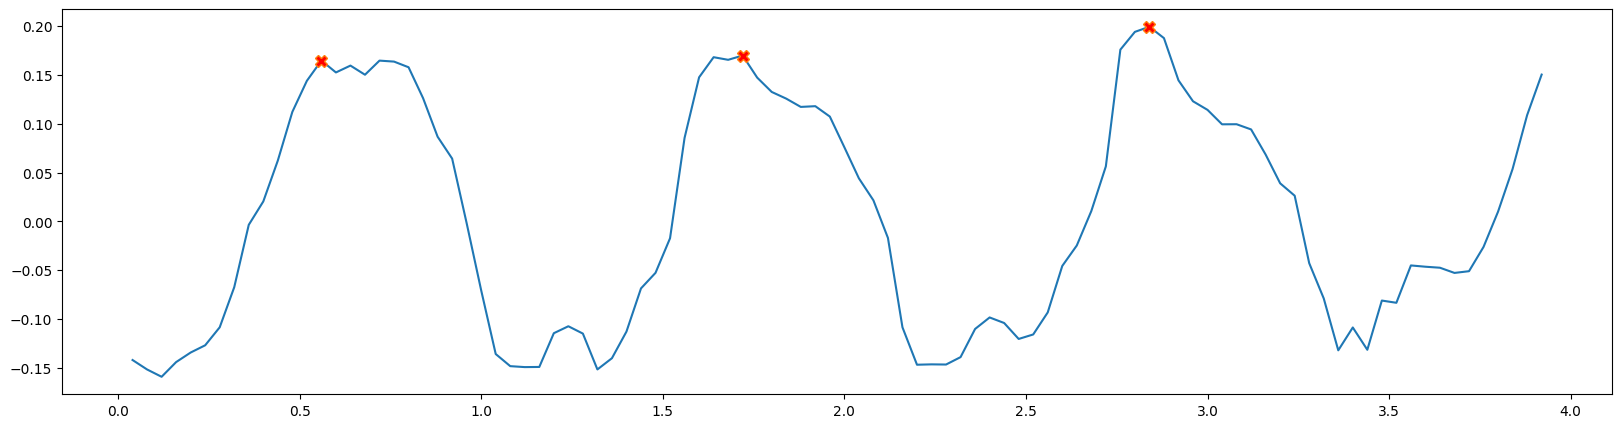

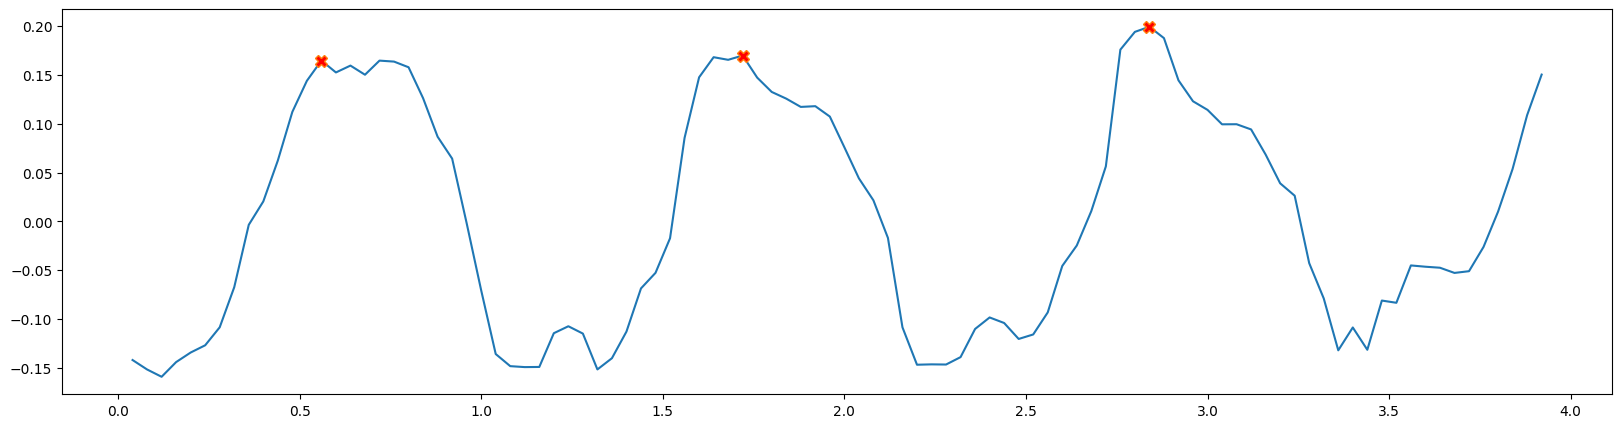

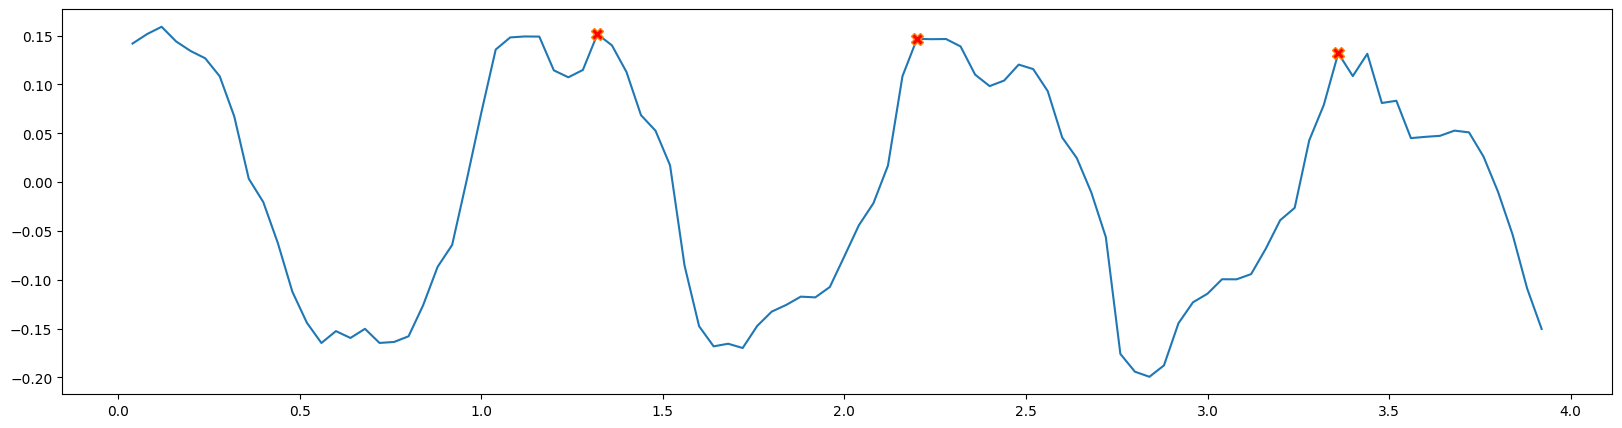

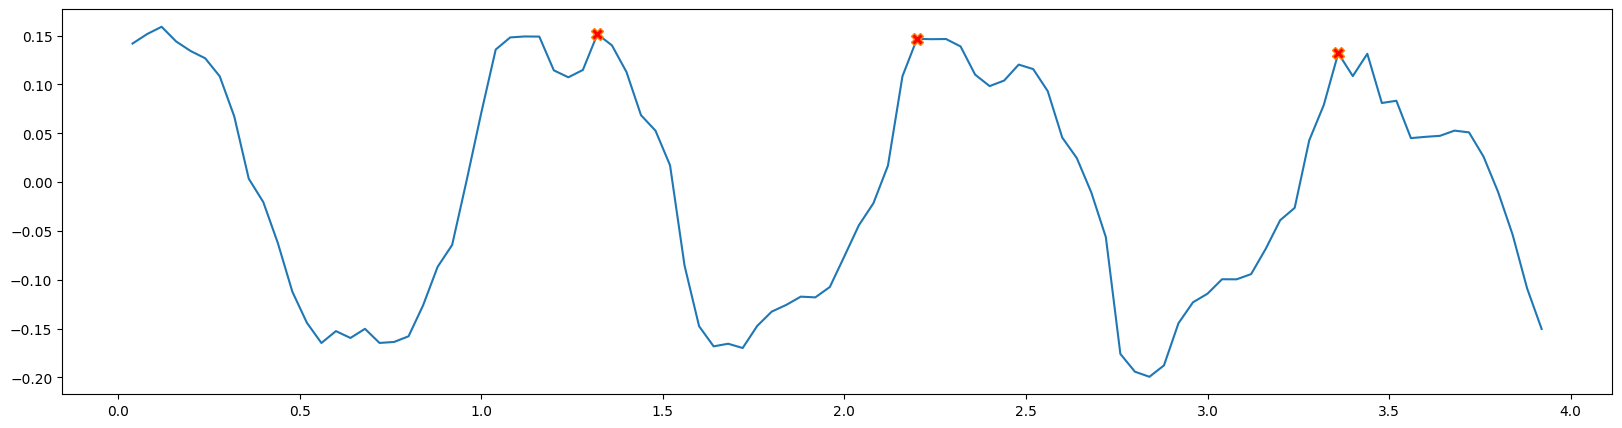

t1 0.56
t1 1.72
results [1.4460568883760005, 1.4493361251800196]
t1 0.56
t1 1.72
results [0.34201990351631295, 0.34277485910799005]
t1 0.56
t1 1.72
results [0.19253662322966864, 0.1940580572686343]
t1 0.56
t1 1.72
results [0.5568988232830551, 0.5527093023766574]
t1 0.56
t1 1.72
results [0.5415601554002082, 0.5503739560979475]
t1 0.56
t1 1.72
results [0.4809800361253948, 0.4857418878523314]
t1 0.56
t1 1.72
results [0.5114310561477093, 0.4991361748179596]
t1 0.56
t1 1.72
results [1.181861290095067, 1.1791546901776597]
t1 0.56
t1 1.72
results [1.1850455274350165, 1.1939132742478444]
t1 0.56
t1 1.72
results [0.7269983054495218, 0.7206496691578935]
t1 0.56
t1 1.72
results [0.7253157434235227, 0.7226907654258571]
t1 0.56
t1 1.72
results [0.7207411449524783, 0.7266453597541624]
t1 0.56
t1 1.72
results [0.7207411449524783, 0.7266453597541624]
t1 0.56
t1 1.72
results [0.11292795383055294, 0.11045858168684901]
t1 0.56
t1 1.72
results [0.03606732795213519, 0.0362910062134023]
t1 0.56
t1 1.72
resu

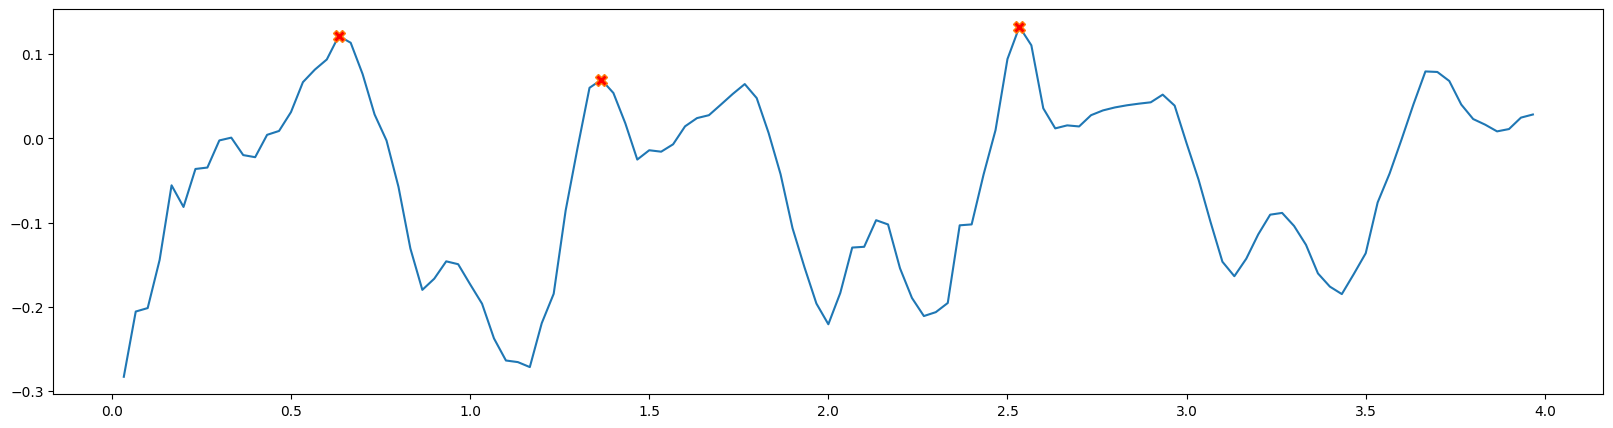

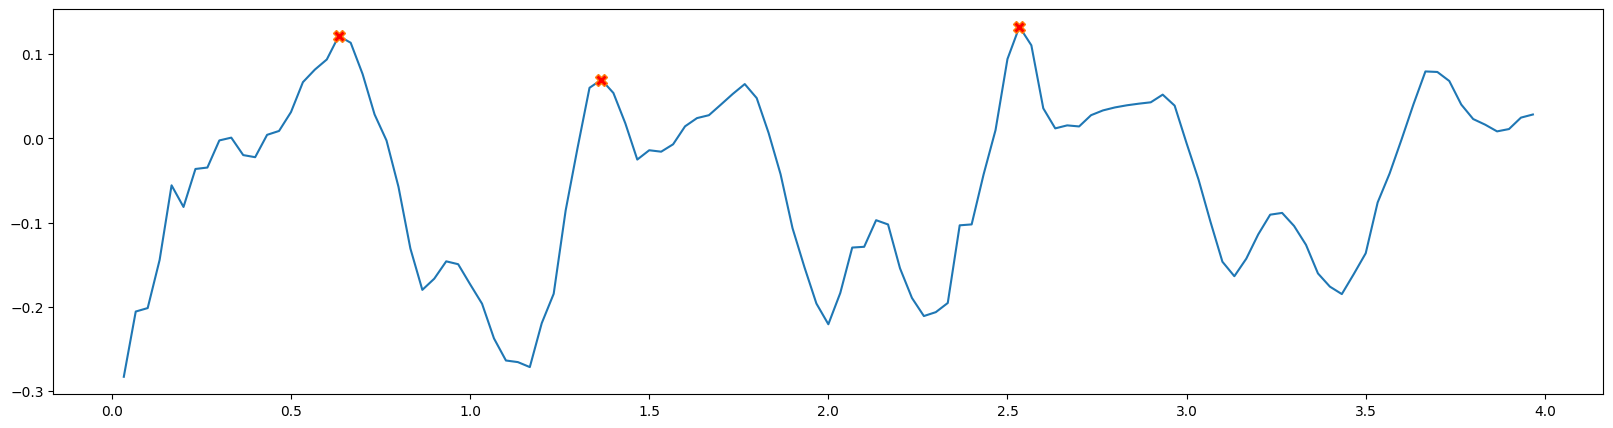

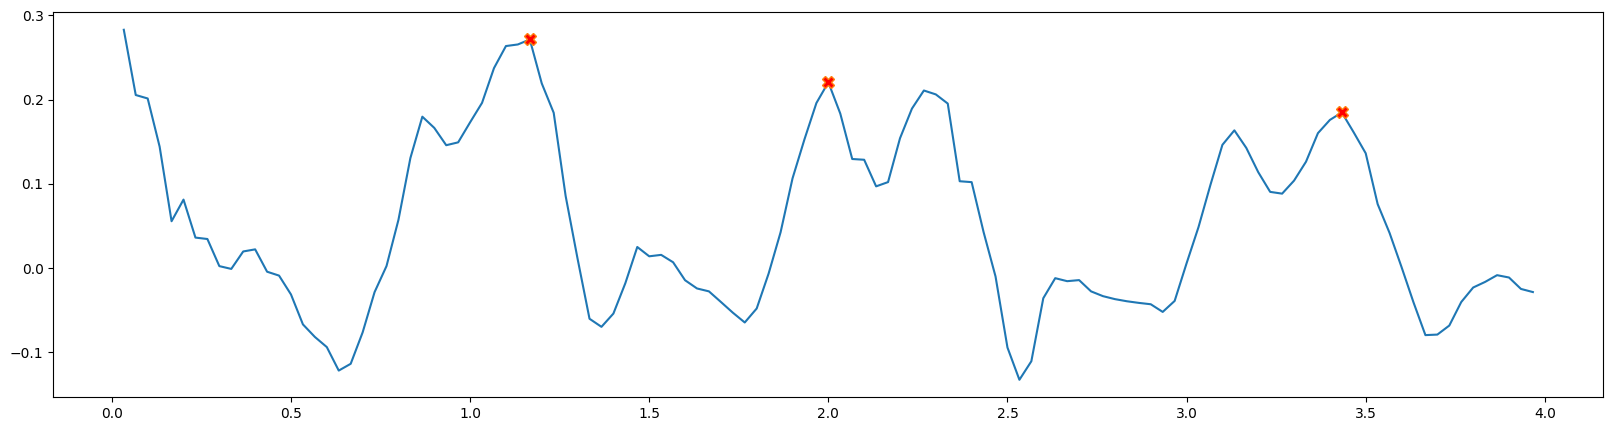

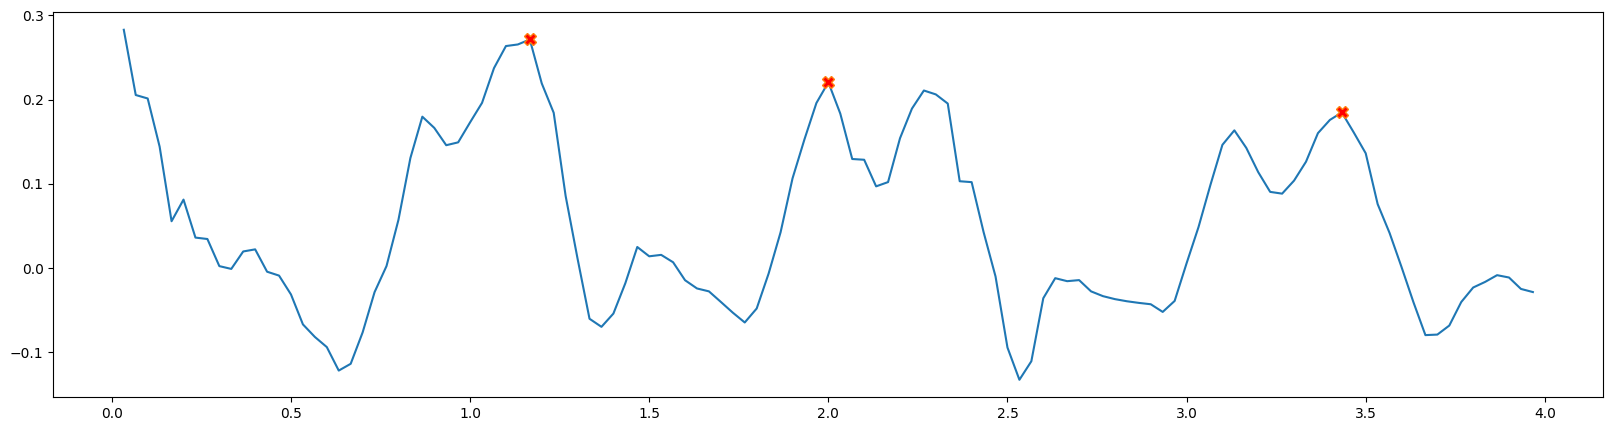

t1 0.6333333333333333
t1 1.3666666666666667
results [1.4667949402971932, 1.4696797181879624]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.3643101202537046, 0.3607976889059655]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.20079949413446735, 0.20216537450229366]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.529946814834779, 0.5164232242423832]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.5222252317611941, 0.5182860051072607]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.4847810912283283, 0.4747614458332952]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.4986694816321581, 0.5033457813687794]
t1 0.6333333333333333
t1 1.3666666666666667
results [1.1347426370687792, 1.1162438074884244]
t1 0.6333333333333333
t1 1.3666666666666667
results [1.1496930544668913, 1.1563490078664636]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.7676058487150428, 0.7476844636384926]
t1 0.6333333333333333
t1 1.3666666666666667
results [0.72351756308927

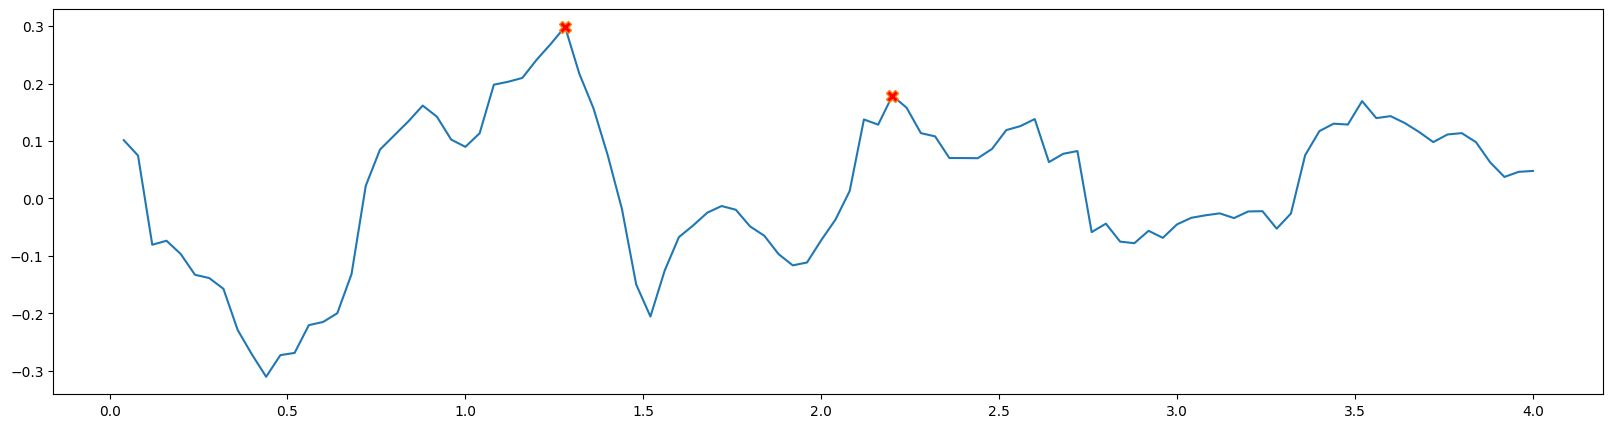

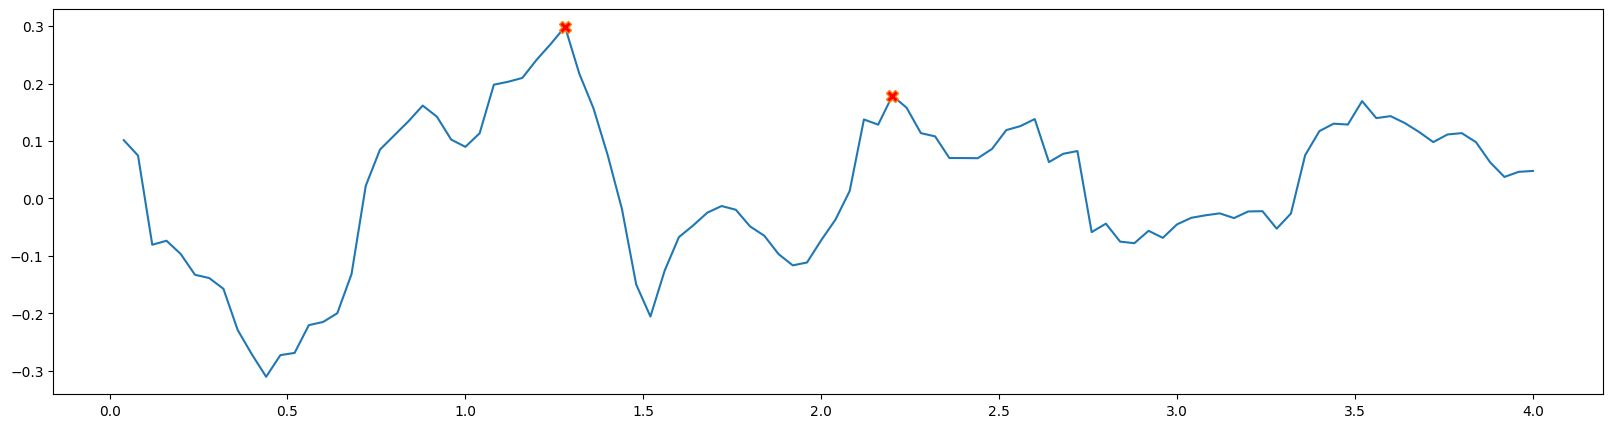

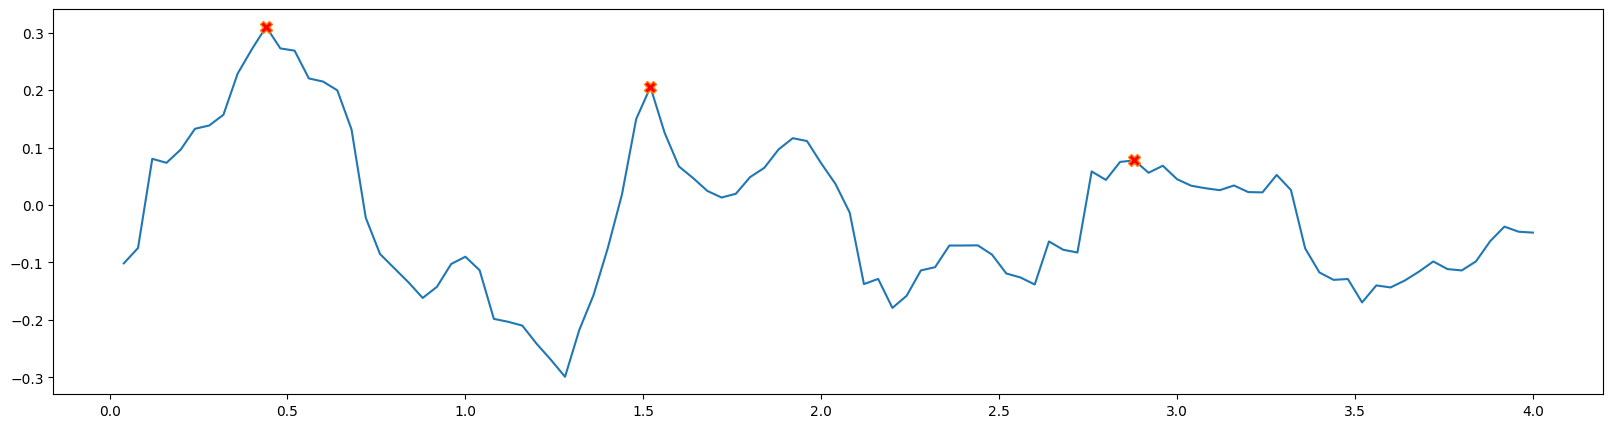

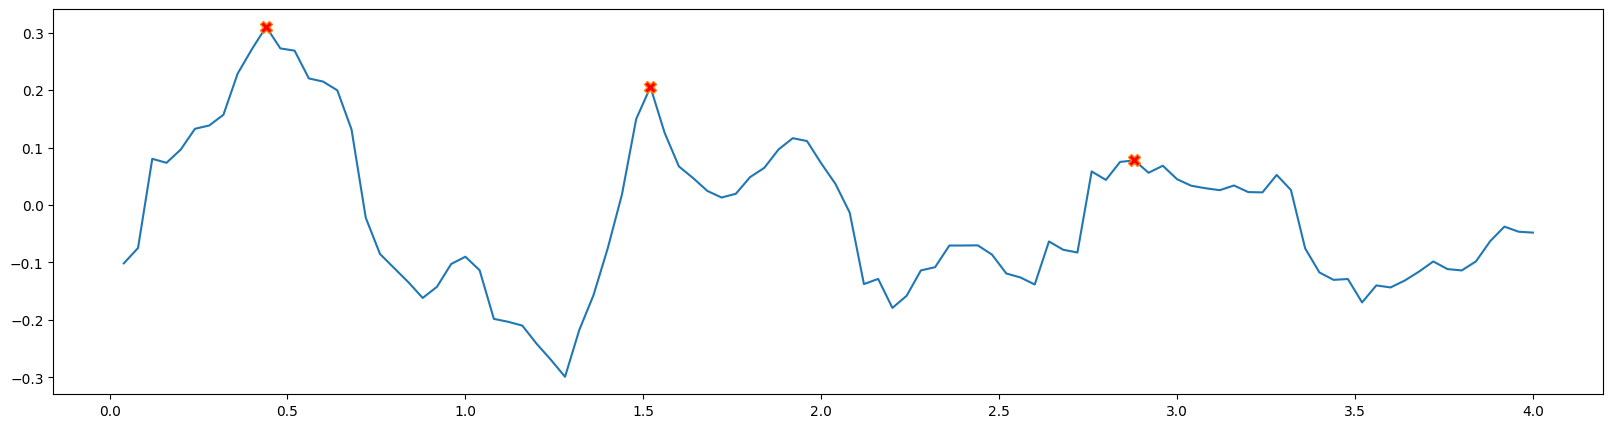

t1 1.28
results [1.3882395342047082]
t1 1.28
results [0.3778717255323912]
t1 1.28
results [0.20576140557272682]
t1 1.28
results [0.5477166140752119]
t1 1.28
results [0.5506098431064056]
t1 1.28
results [0.4743310126115026]
t1 1.28
results [0.4910278362327765]
t1 1.28
results [1.1462483953227594]
t1 1.28
results [1.1707018860351874]
t1 1.28
results [0.6956089866666703]
t1 1.28
results [0.6829495042878196]
t1 1.28
results [0.7052900299168884]
t1 1.28
results [0.7052900299168884]
t1 1.28
results [0.12220387563473341]
t1 1.28
results [0.03745989292313689]
t1 1.28
results [0.022853801601128803]
t1 1.28
results [0.05725236746796522]
t1 1.28
results [0.9082790992173727] 1.28
t1 1.28
results [0.9996660107521714] 1.28
t1 1.28
results [0.9990957894963303] 1.28
t1 1.28
results [0.9832285865760434] 1.28
t1 1.28
results [0.9747346969596564] 1.28
t1 1.28
results [0.8187563302864671] 1.28
t1 1.28
results [0.7655524691795401] 1.28
t1 1.28
results [0.4621315850145145] 1.28
t1 1.28
results [0.4129517989

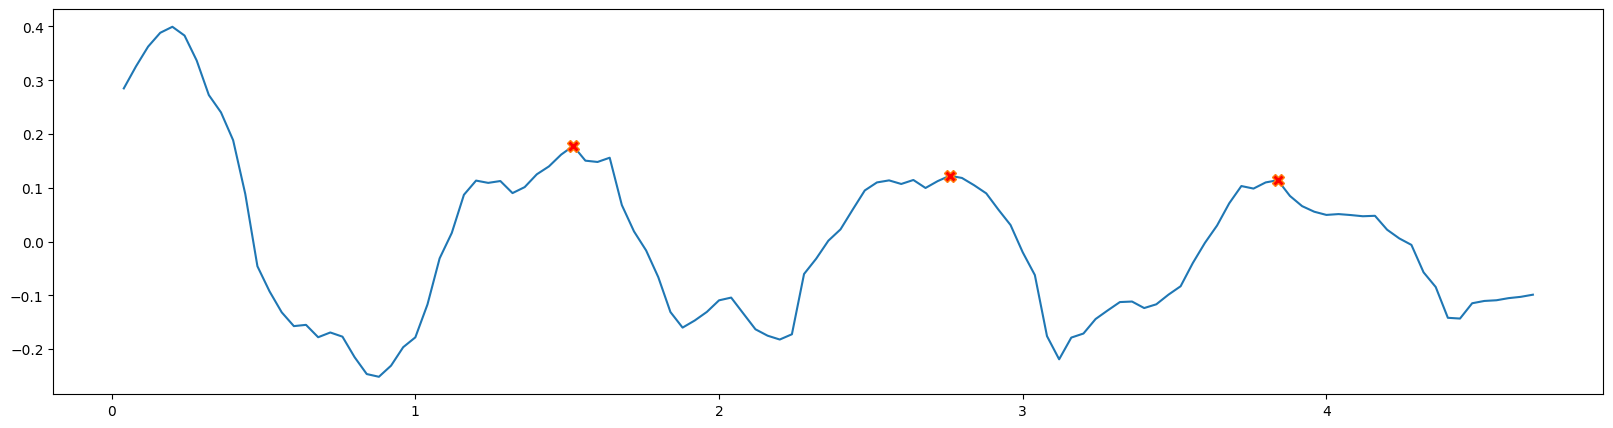

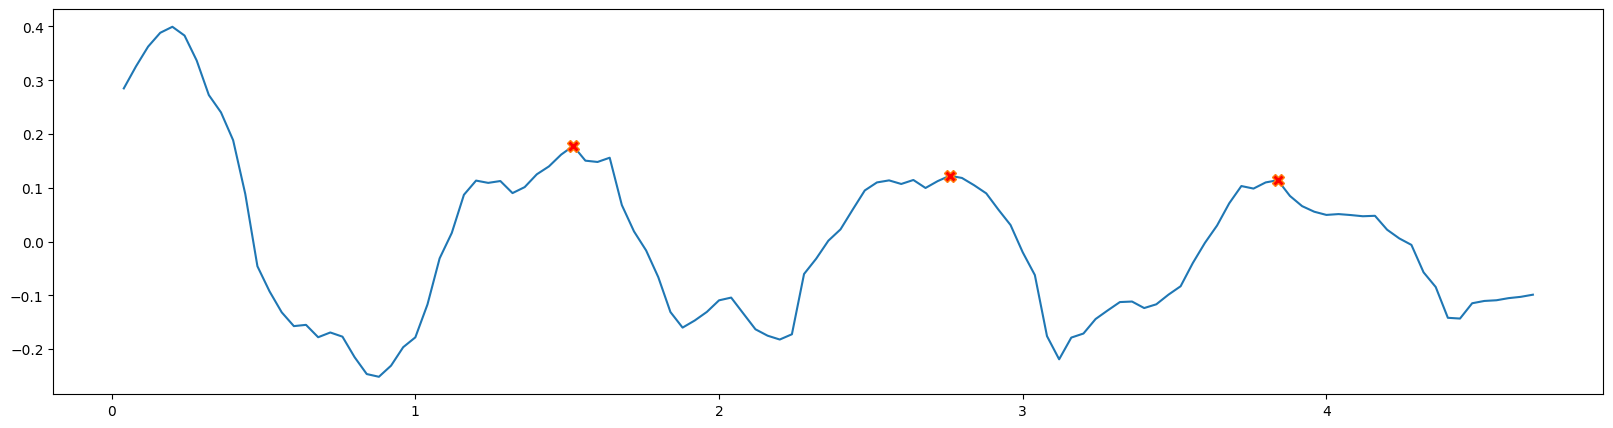

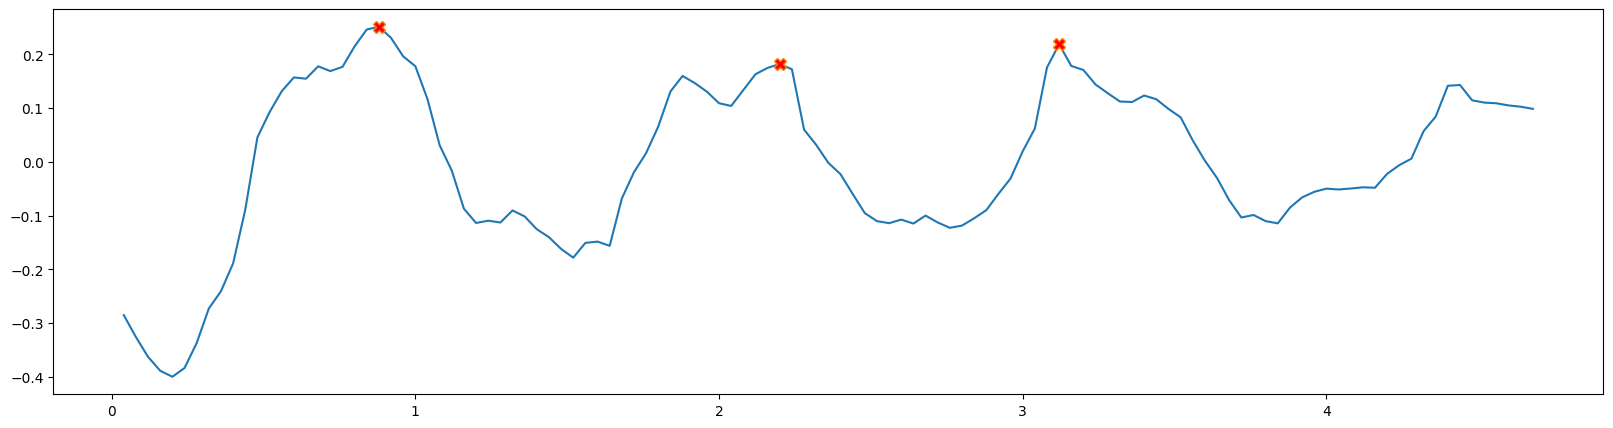

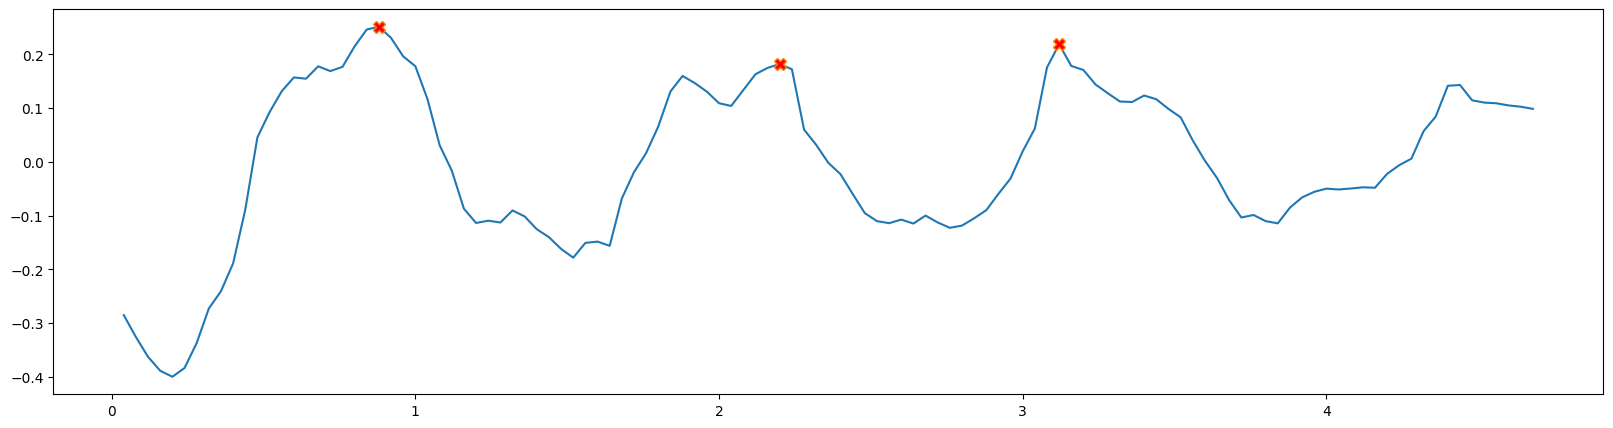

t1 1.52
t1 2.76
results [1.5742452355190952, 1.5267510103618533]
t1 1.52
t1 2.76
results [0.3804374106646916, 0.37539084128322125]
t1 1.52
t1 2.76
results [0.19851018481747912, 0.19847566394003074]
t1 1.52
t1 2.76
results [0.5817756417012192, 0.5806814583961434]
t1 1.52
t1 2.76
results [0.5697288612256227, 0.5736585342042894]
t1 1.52
t1 2.76
results [0.5065847858569126, 0.49418231886461567]
t1 1.52
t1 2.76
results [0.5228483779994129, 0.518565689413869]
t1 1.52
t1 2.76
results [1.225976984425903, 1.212001816165794]
t1 1.52
t1 2.76
results [1.2291902911950099, 1.219708504278763]
t1 1.52
t1 2.76
results [0.7941791992932308, 0.7905722615584864]
t1 1.52
t1 2.76
results [0.7890617997862209, 0.7663262582343109]
t1 1.52
t1 2.76
results [0.7851834357328741, 0.7604247521275423]
t1 1.52
t1 2.76
results [0.7851834357328741, 0.7604247521275423]
t1 1.52
t1 2.76
results [0.13335673032225087, 0.13514596033895038]
t1 1.52
t1 2.76
results [0.039488687740053374, 0.03997163726178882]
t1 1.52
t1 2.76
resu

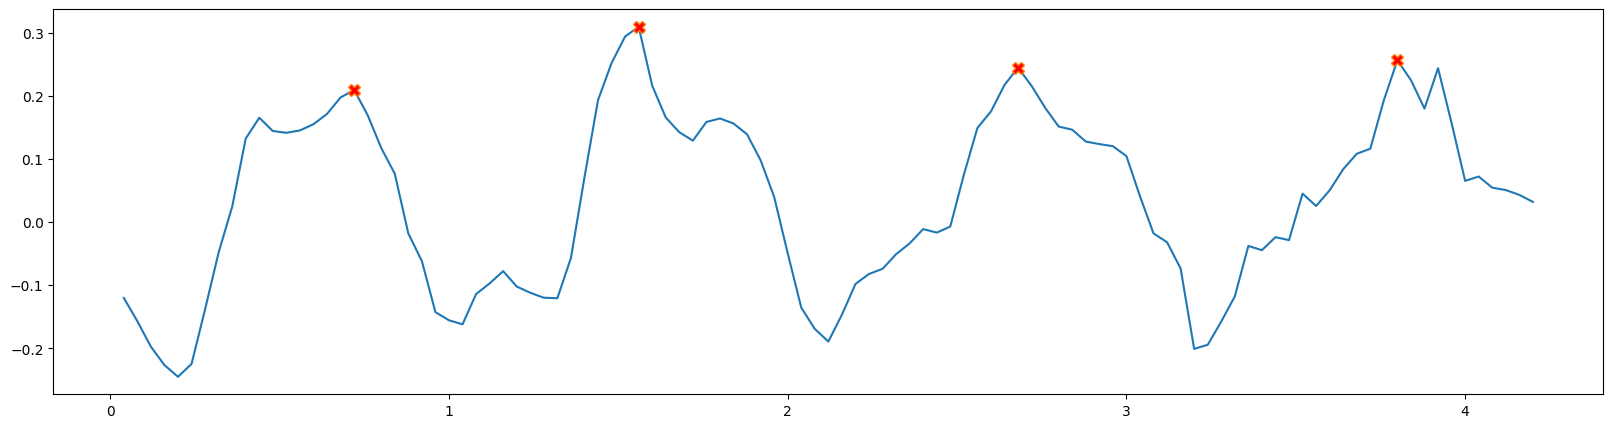

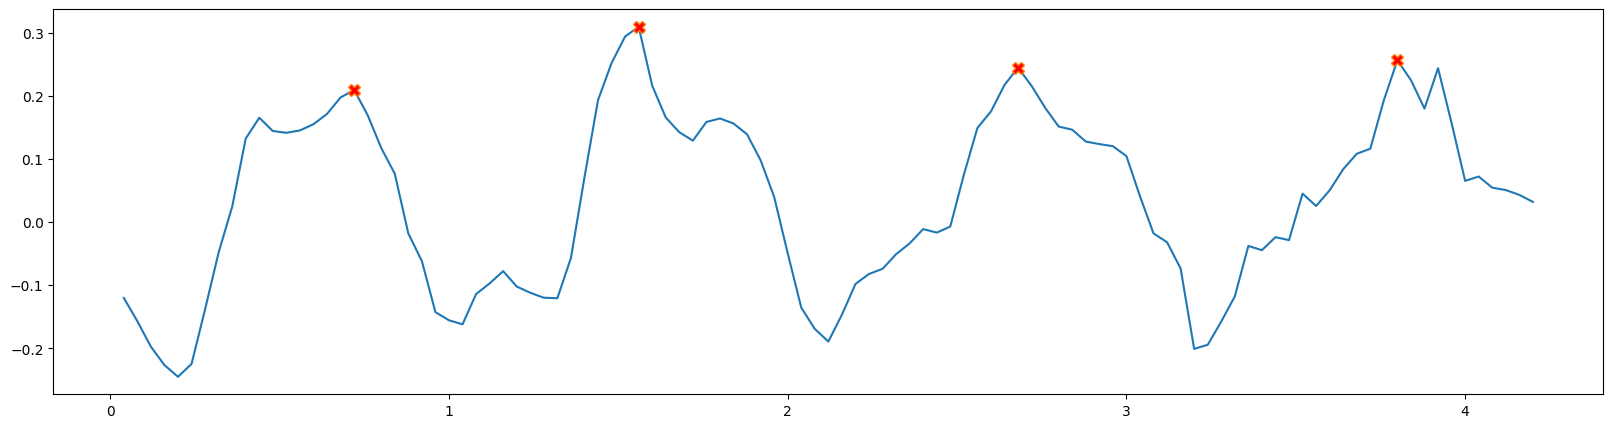

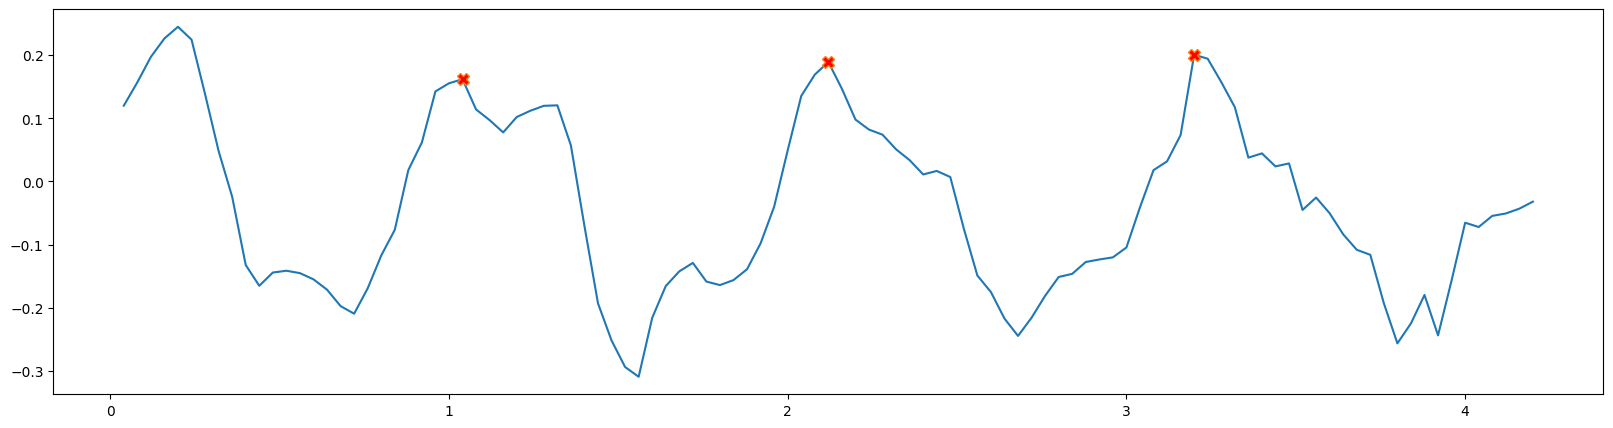

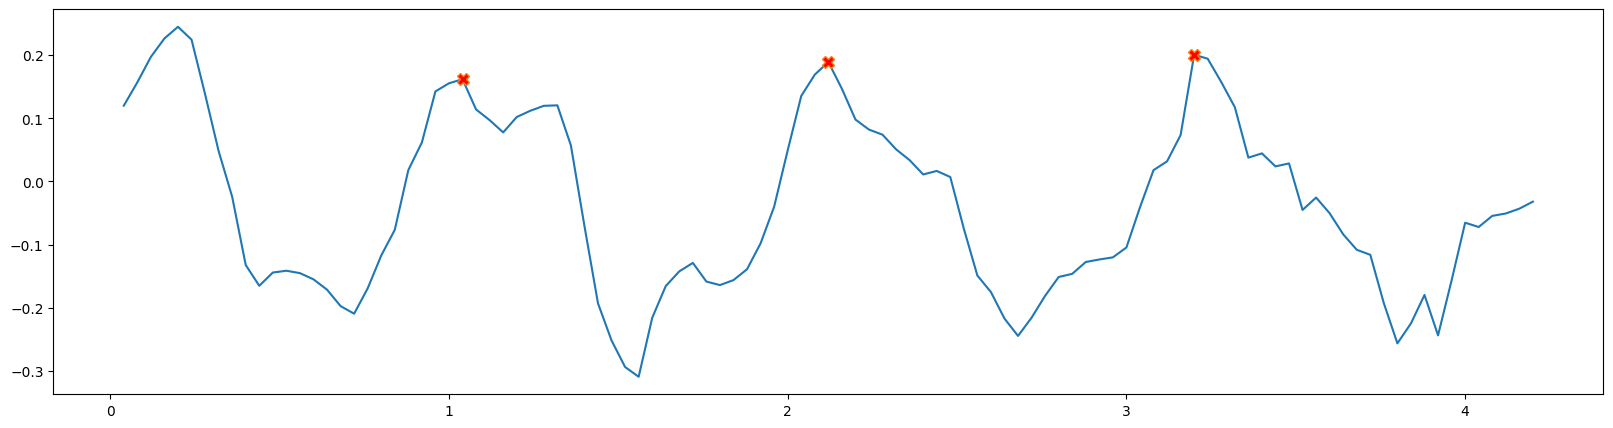

t1 0.72
t1 1.56
t1 2.68
results [1.360040855381935, 1.381542270732894, 1.3858402926326847]
t1 0.72
t1 1.56
t1 2.68
results [0.3568695883759246, 0.35624782503318, 0.3633918721166183]
t1 0.72
t1 1.56
t1 2.68
results [0.18672942833597075, 0.18860175227358383, 0.19093242051573986]
t1 0.72
t1 1.56
t1 2.68
results [0.5301959815408342, 0.5385094906579474, 0.5381977125318075]
t1 0.72
t1 1.56
t1 2.68
results [0.5578549976220825, 0.5406297979014518, 0.5490016673533662]
t1 0.72
t1 1.56
t1 2.68
results [0.33507968276585, 0.3884251237719423, 0.39380397787539967]
t1 0.72
t1 1.56
t1 2.68
results [0.40140679346574193, 0.4295201952330649, 0.43749639917153754]
t1 0.72
t1 1.56
t1 2.68
results [0.9556793457100149, 1.0349520171439384, 1.0373704603518792]
t1 0.72
t1 1.56
t1 2.68
results [1.0656613956090453, 1.0766144352512548, 1.095786305507811]
t1 0.72
t1 1.56
t1 2.68
results [0.6716517212456968, 0.6739785640907078, 0.6663776372665147]
t1 0.72
t1 1.56
t1 2.68
results [0.6752195269604049, 0.6813274535248538

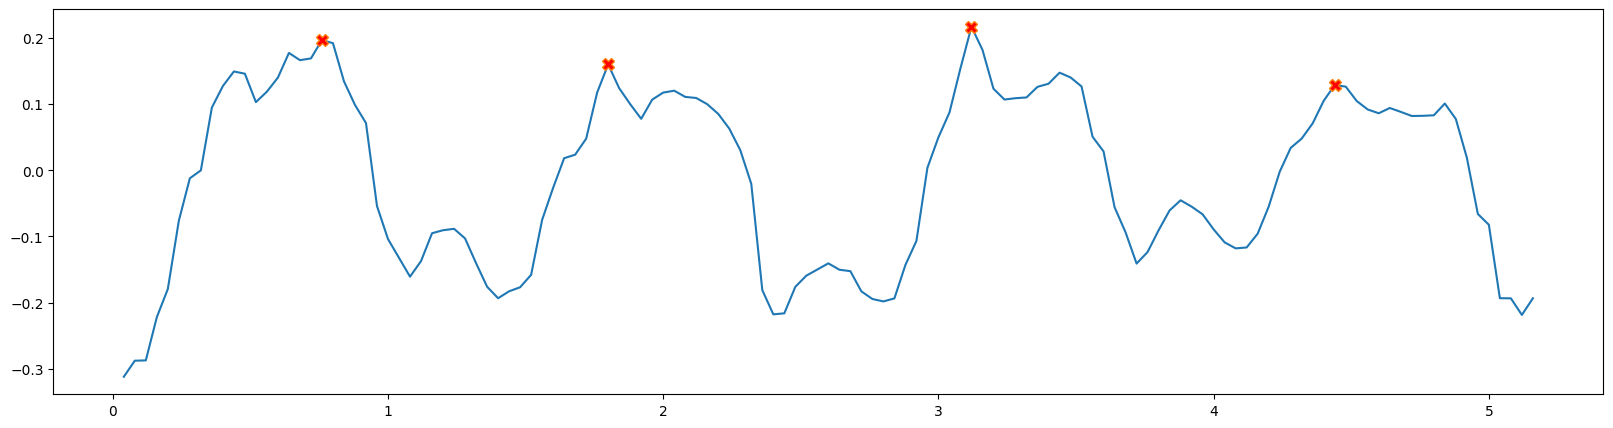

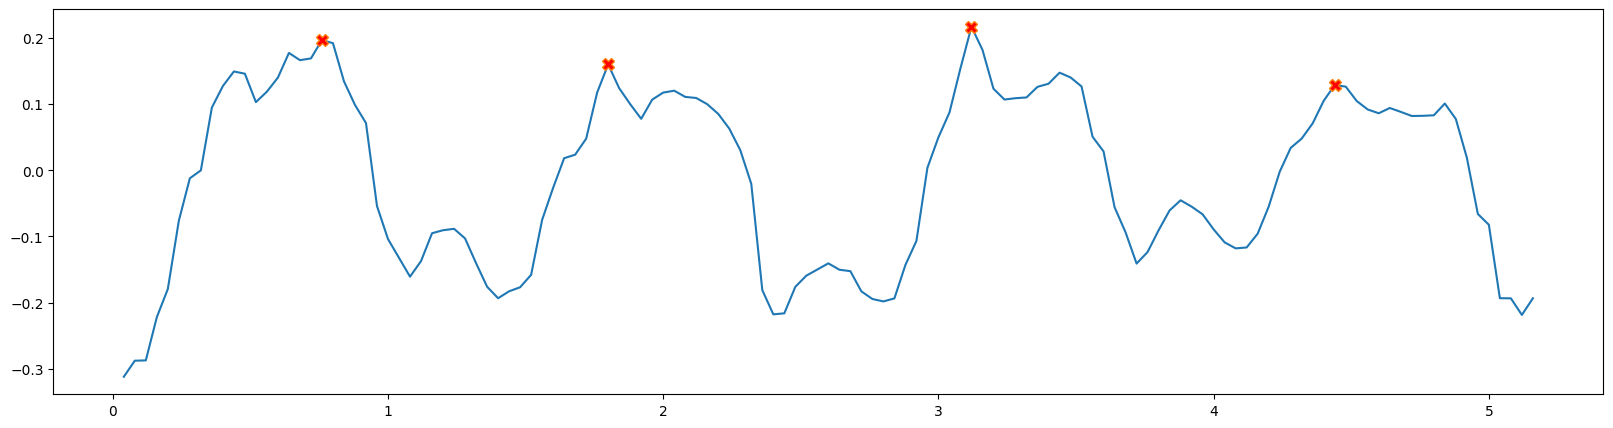

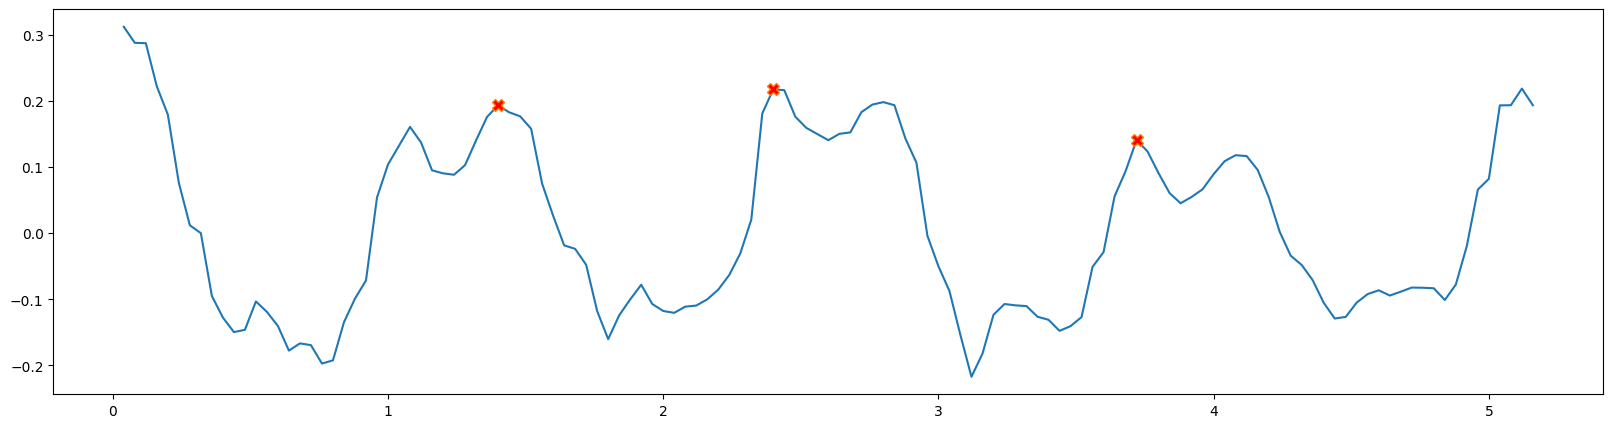

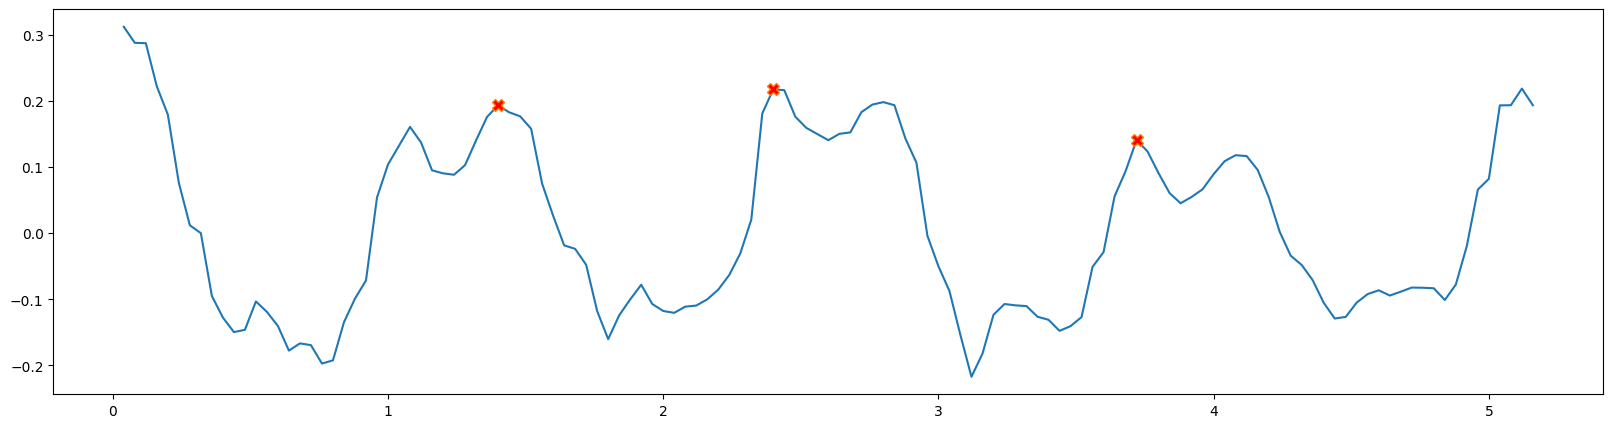

t1 0.76
t1 1.8
t1 3.12
results [1.5079913187555087, 1.534272343707095, 1.567010588375261]
t1 0.76
t1 1.8
t1 3.12
results [0.37908186929295373, 0.3881443794418652, 0.3857417789528133]
t1 0.76
t1 1.8
t1 3.12
results [0.21518789321404466, 0.2145986665464873, 0.21767872893893914]
t1 0.76
t1 1.8
t1 3.12
results [0.538246899868352, 0.5505190029617268, 0.5479324693436546]
t1 0.76
t1 1.8
t1 3.12
results [0.5534276775150511, 0.5521883818599254, 0.5421680326783747]
t1 0.76
t1 1.8
t1 3.12
results [0.4751028946054036, 0.4810926699519127, 0.501030241924724]
t1 0.76
t1 1.8
t1 3.12
results [0.48303531742662825, 0.4839993347368125, 0.4916355193644815]
t1 0.76
t1 1.8
t1 3.12
results [1.1336686506129663, 1.160869228107121, 1.1817455770447751]
t1 0.76
t1 1.8
t1 3.12
results [1.1749183018914302, 1.1662768624249282, 1.1640557931429776]
t1 0.76
t1 1.8
t1 3.12
results [0.7702490702734225, 0.7835227325514993, 0.7737316669110427]
t1 0.76
t1 1.8
t1 3.12
results [0.7600418256757758, 0.7690748541820417, 0.7737613

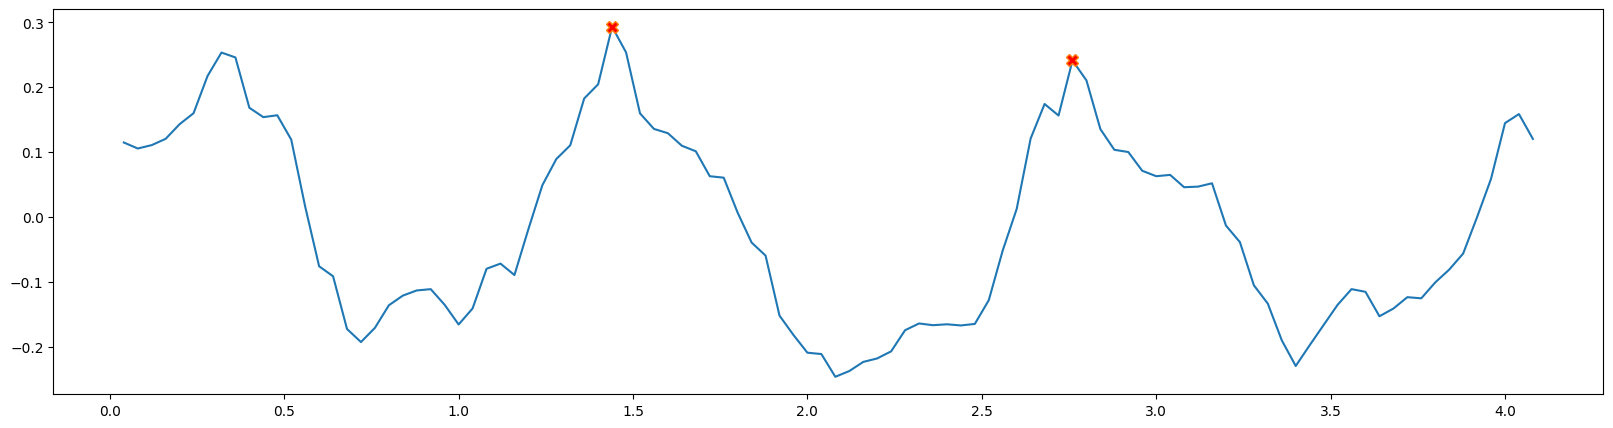

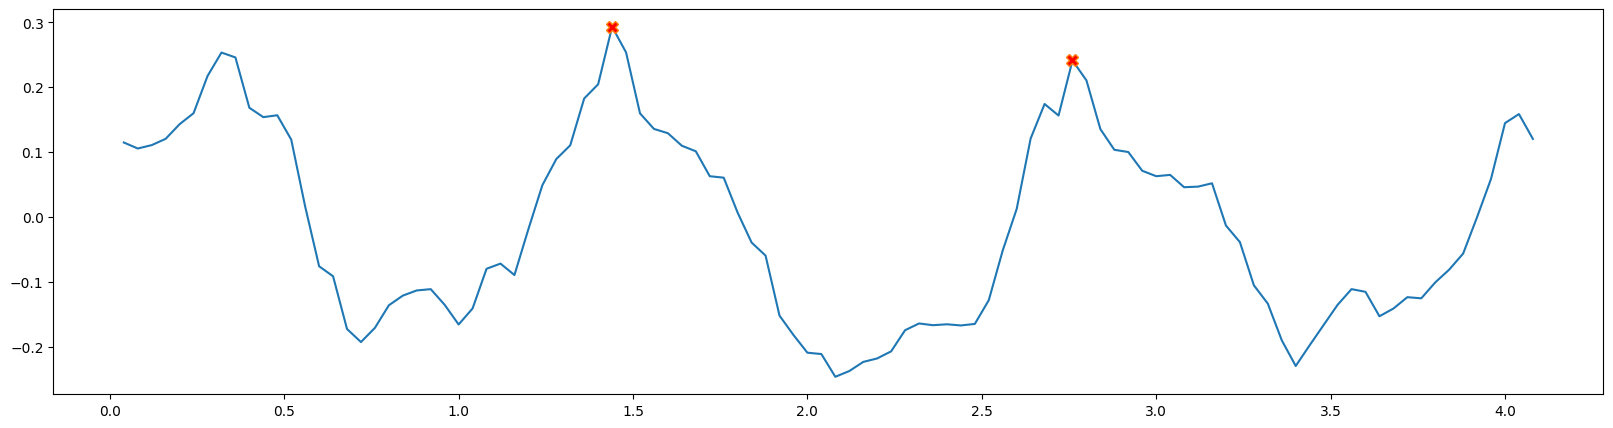

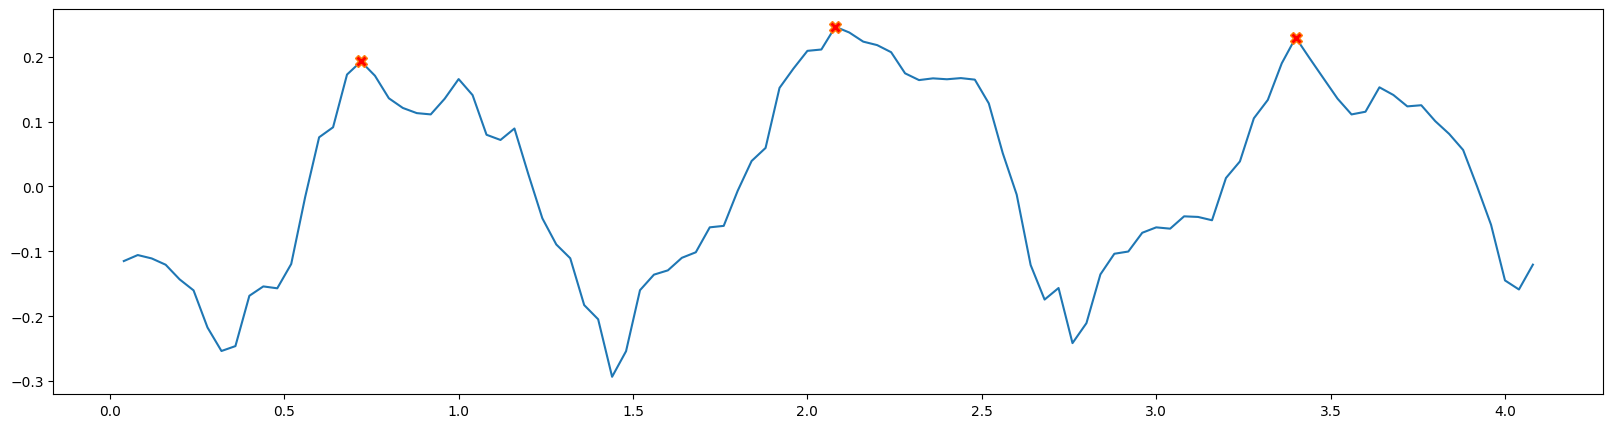

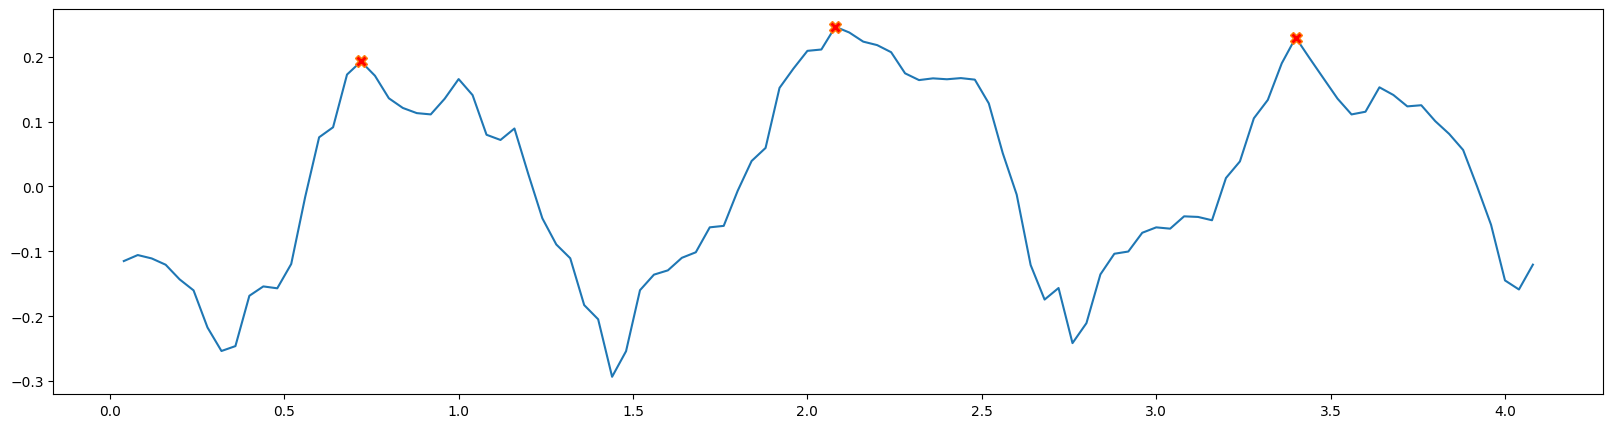

t1 1.44
results [1.3084936332839388]
t1 1.44
results [0.3568645749804946]
t1 1.44
results [0.18361979388560243]
t1 1.44
results [0.5226035362527967]
t1 1.44
results [0.514078770897147]
t1 1.44
results [0.4265439320167024]
t1 1.44
results [0.463449211520559]
t1 1.44
results [1.0501074820897542]
t1 1.44
results [1.094427150664707]
t1 1.44
results [0.6691744946221494]
t1 1.44
results [0.6428944664768688]
t1 1.44
results [0.66559916680707]
t1 1.44
results [0.66559916680707]
t1 1.44
results [0.1168477431724126]
t1 1.44
results [0.035451604805545225]
t1 1.44
results [0.021856692241807526]
t1 1.44
results [0.05390965761573161]
t1 1.44
results [0.9284598915683059] 1.44
t1 1.44
results [0.9997271098018553] 1.44
t1 1.44
results [0.9992518081785114] 1.44
t1 1.44
results [0.9916344420821188] 1.44
t1 1.44
results [0.9872028780206956] 1.44
t1 1.44
results [0.8800453857692688] 1.44
t1 1.44
results [0.8269056525324592] 1.44
t1 1.44
results [0.5930663049753241] 1.44
t1 1.44
results [0.5105625754120547]

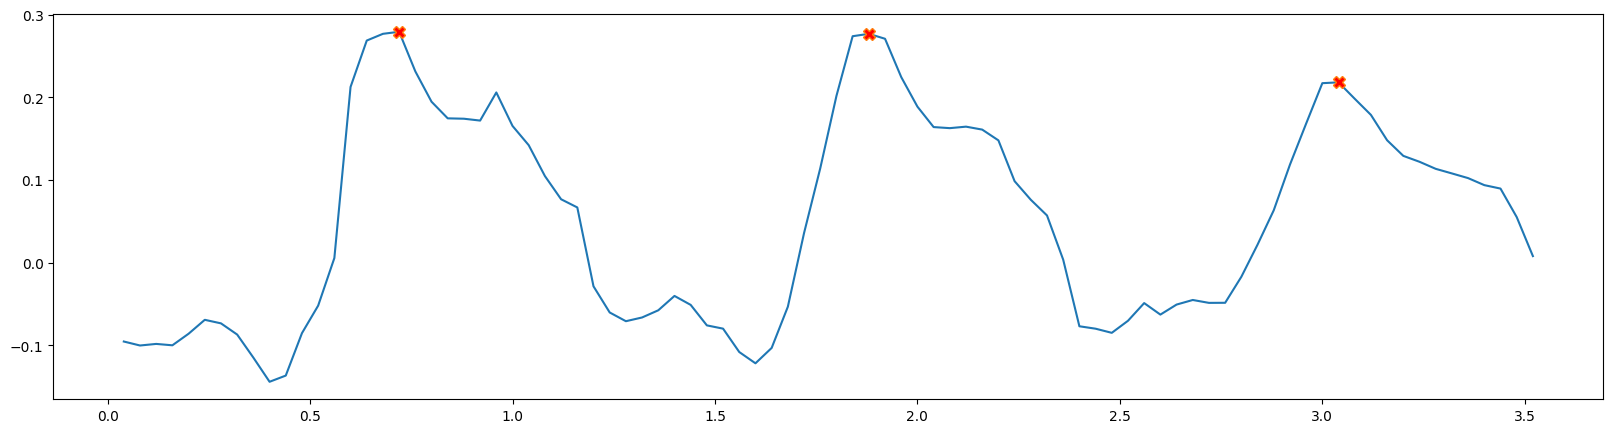

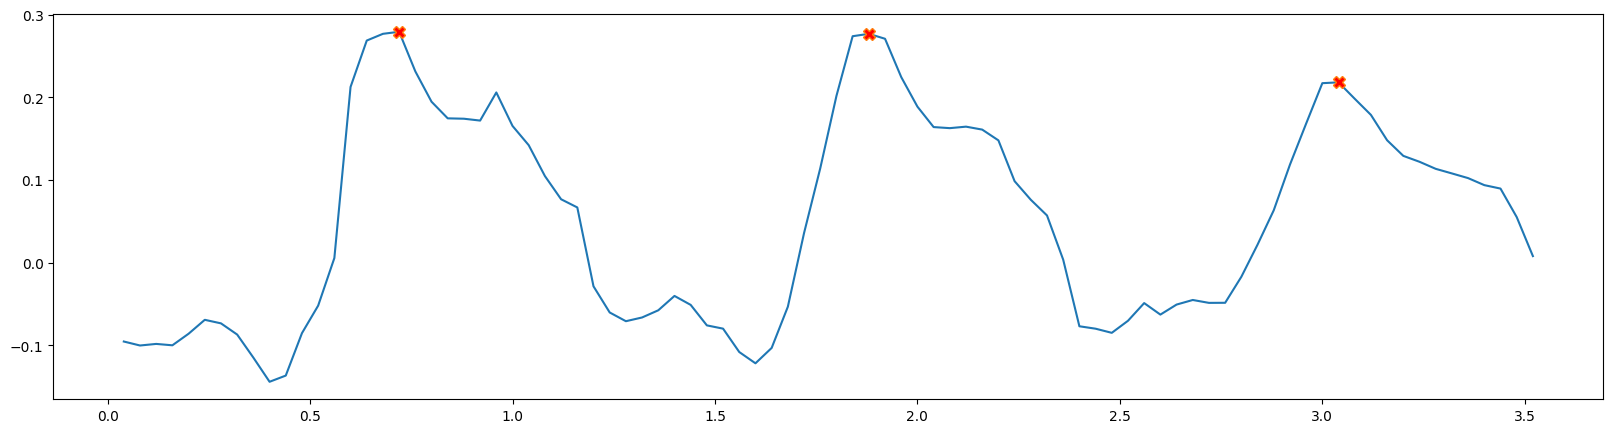

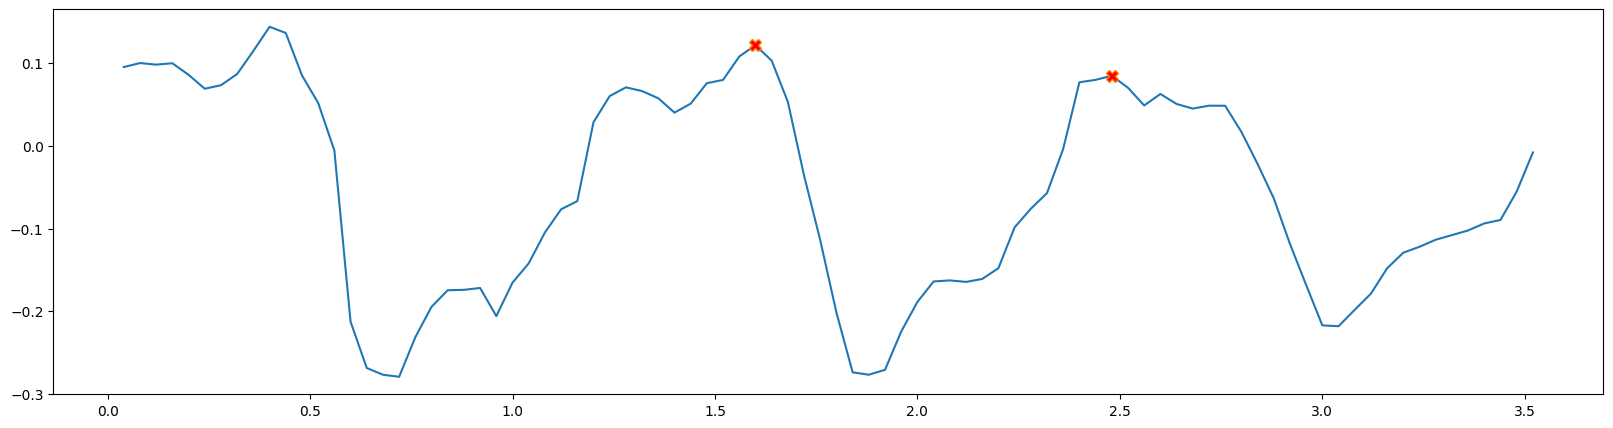

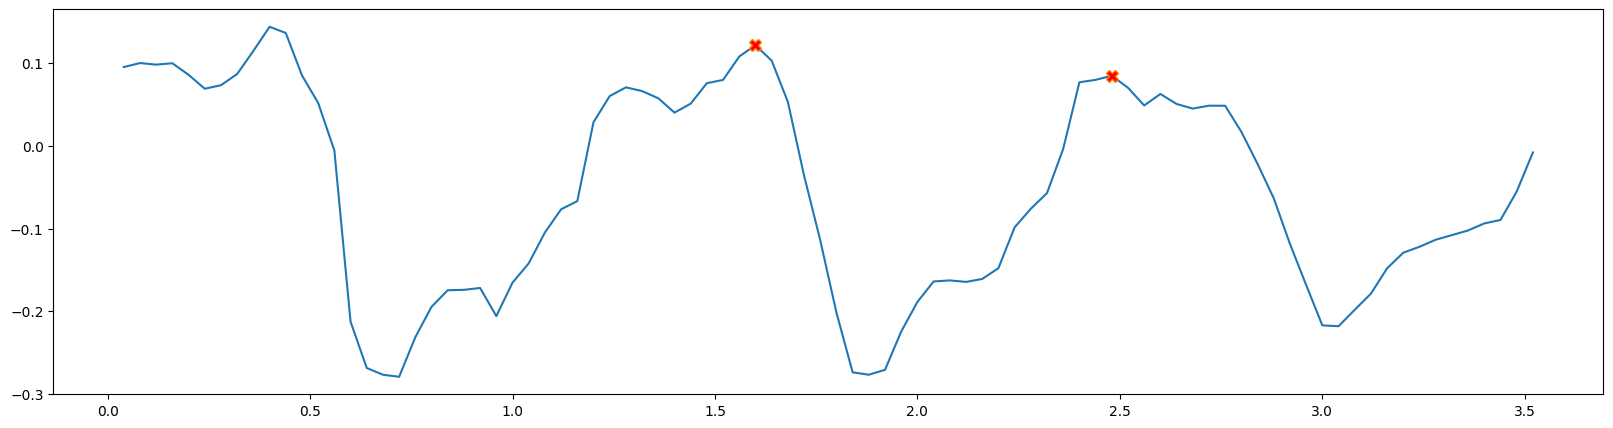

t1 0.72
t1 1.88
results [1.34618281487892, 1.3664613720617795]
t1 0.72
t1 1.88
results [0.3739361431058851, 0.3808175154086431]
t1 0.72
t1 1.88
results [0.19372173423290417, 0.19430159262034166]
t1 0.72
t1 1.88
results [0.502856978564367, 0.5328553702117497]
t1 0.72
t1 1.88
results [0.5154970530632029, 0.529252441512735]
t1 0.72
t1 1.88
results [0.4102243958828341, 0.41957780081993123]
t1 0.72
t1 1.88
results [0.41434892053558914, 0.40785129630652356]
t1 0.72
t1 1.88
results [1.023984927454476, 1.0659772396365719]
t1 0.72
t1 1.88
results [1.0465274536732445, 1.0472076637613155]
t1 0.72
t1 1.88
results [0.6230560109179297, 0.6266694449489794]
t1 0.72
t1 1.88
results [0.6384467930003836, 0.6586178222132005]
t1 0.72
t1 1.88
results [0.7077360218785368, 0.7078435498485794]
t1 0.72
t1 1.88
results [0.7077360218785368, 0.7078435498485794]
t1 0.72
t1 1.88
results [0.11625792384784085, 0.12125217385729999]
t1 0.72
t1 1.88
results [0.036082035259923956, 0.03512873030555161]
t1 0.72
t1 1.88
resu

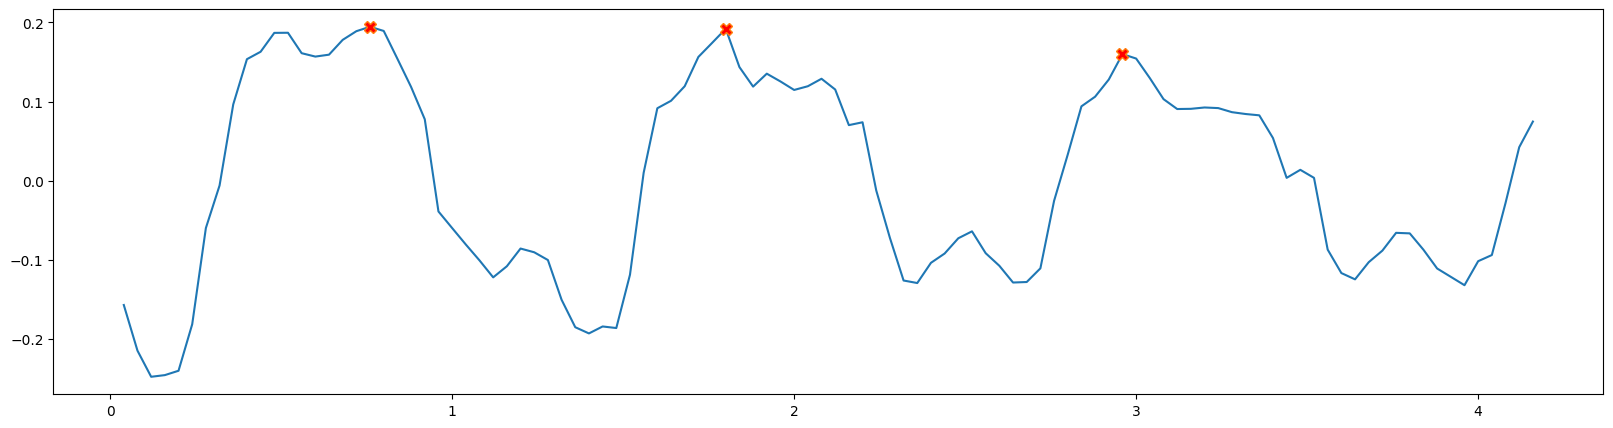

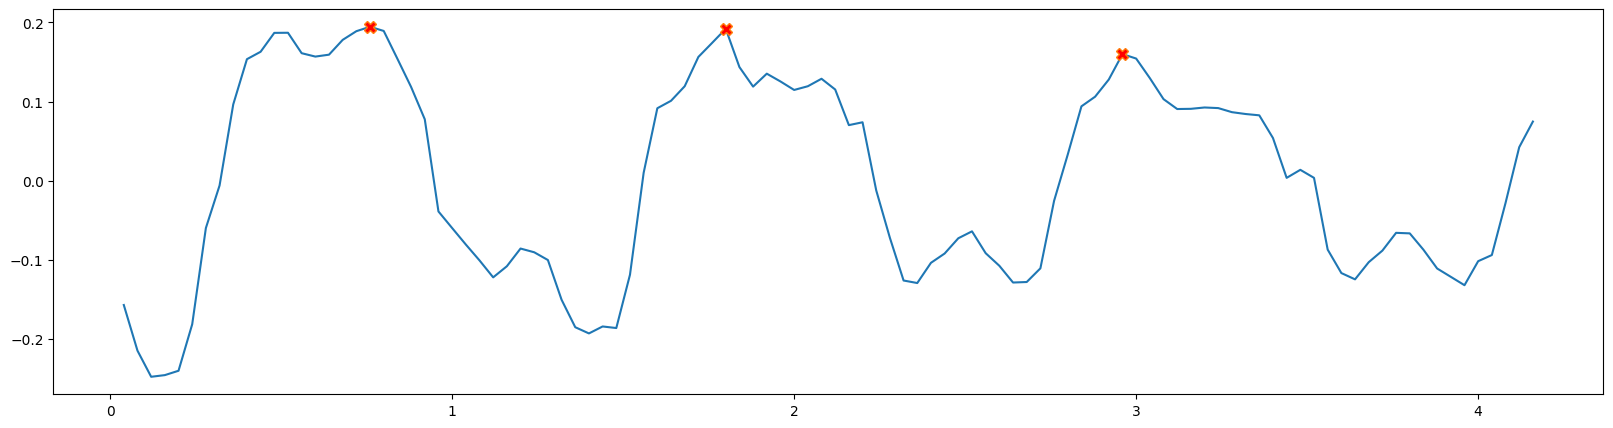

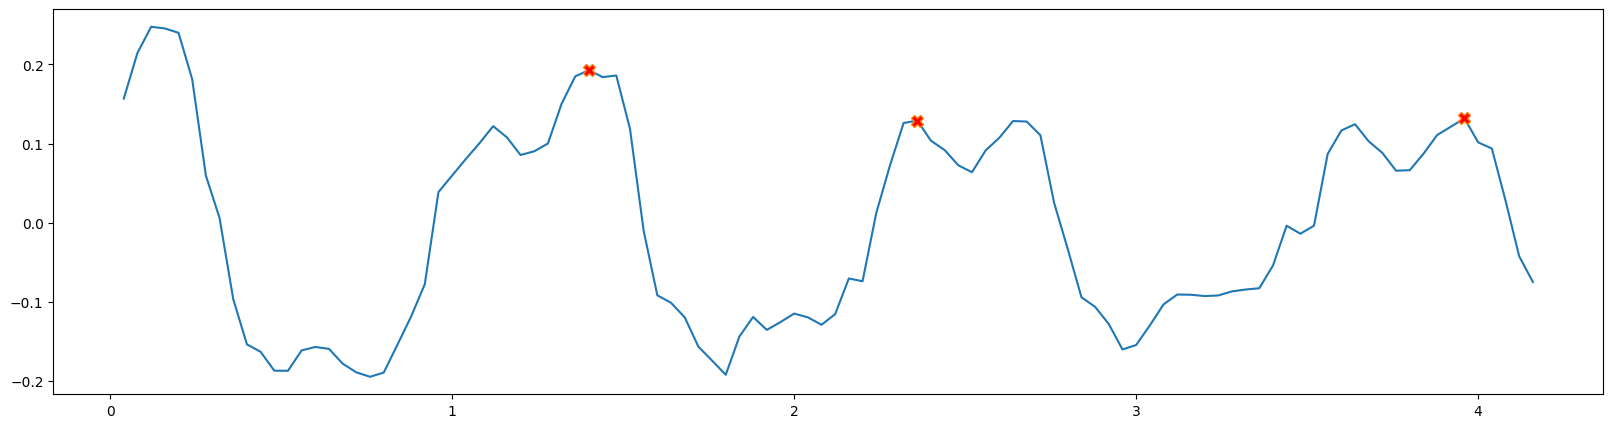

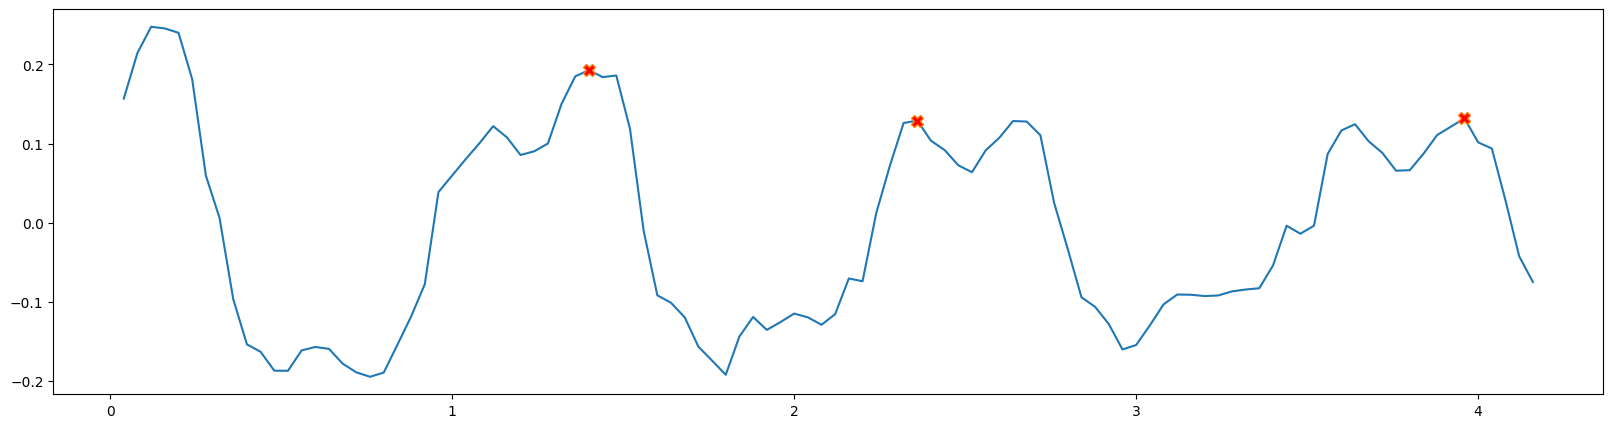

t1 0.76
t1 1.8
results [1.523056334040228, 1.5446513795082943]
t1 0.76
t1 1.8
results [0.3699406696181016, 0.3777756882268565]
t1 0.76
t1 1.8
results [0.20626094142396004, 0.21360076386090535]
t1 0.76
t1 1.8
results [0.5482724540171975, 0.5439142955551273]
t1 0.76
t1 1.8
results [0.566476135876253, 0.5747777755102987]
t1 0.76
t1 1.8
results [0.46935109383382084, 0.4816717984084861]
t1 0.76
t1 1.8
results [0.45194800585872413, 0.4544409282309292]
t1 0.76
t1 1.8
results [1.13867892021084, 1.1465797858004387]
t1 0.76
t1 1.8
results [1.142975773559105, 1.1614889790516538]
t1 0.76
t1 1.8
results [0.77280931906055, 0.7800978326655224]
t1 0.76
t1 1.8
results [0.7558931310449137, 0.7686433504263891]
t1 0.76
t1 1.8
results [0.7671632029953145, 0.7760080290819048]
t1 0.76
t1 1.8
results [0.7671632029953145, 0.7760080290819048]
t1 0.76
t1 1.8
results [0.10479445435044489, 0.09944279154667629]
t1 0.76
t1 1.8
results [0.03261170215475254, 0.03160321197434346]
t1 0.76
t1 1.8
results [0.0214039386462

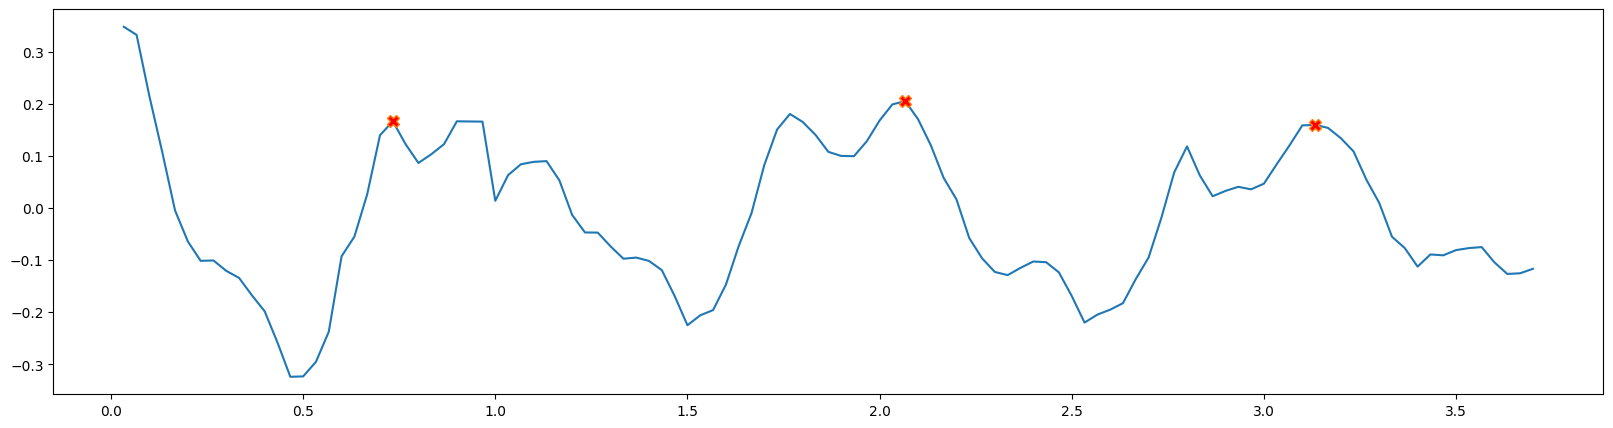

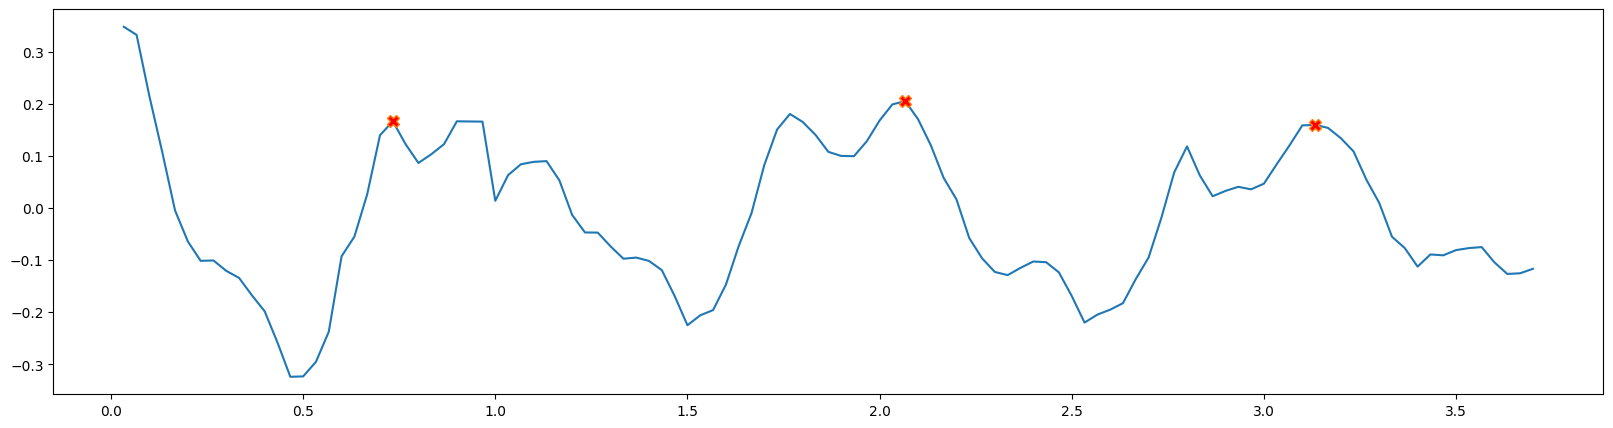

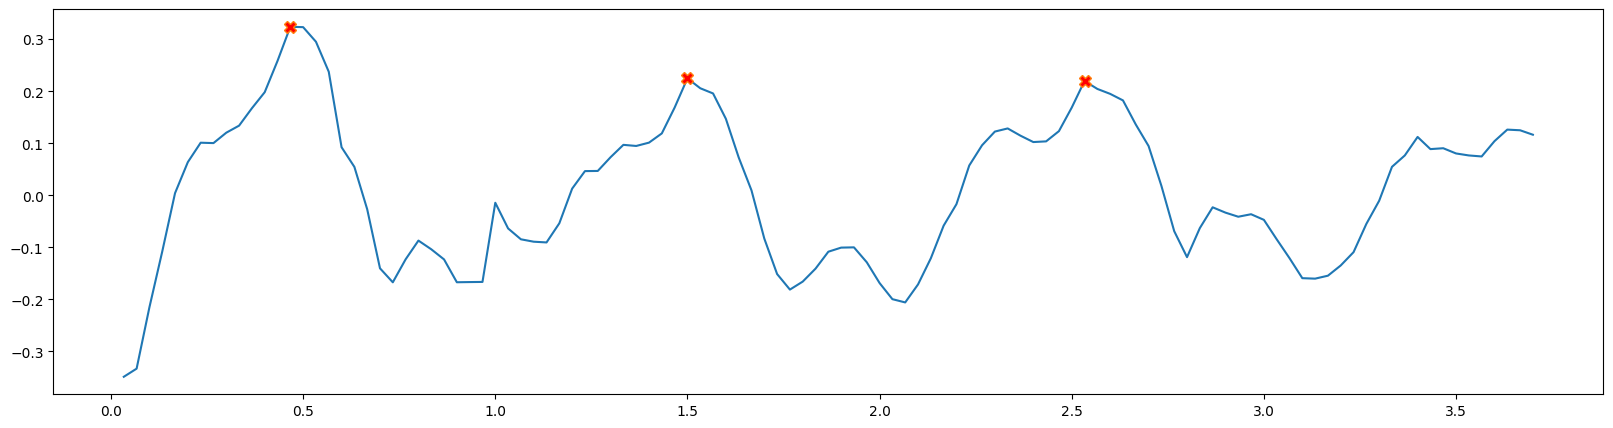

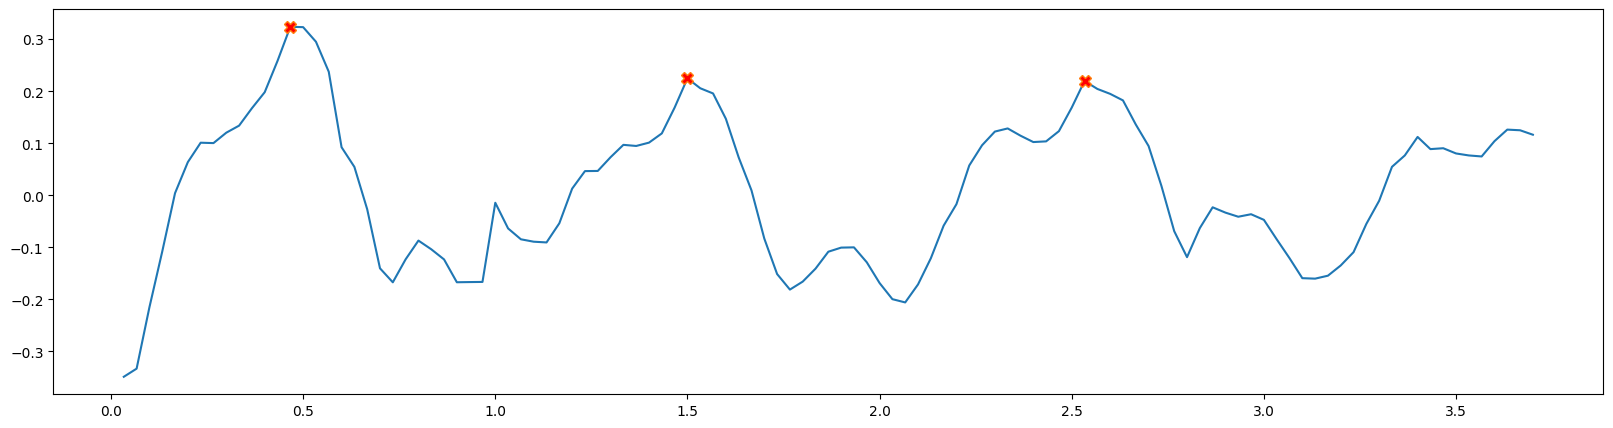

t1 0.7333333333333333
t1 2.066666666666667
results [1.510204791148614, 1.4704308181282644]
t1 0.7333333333333333
t1 2.066666666666667
results [0.38142790687466827, 0.3747833797212449]
t1 0.7333333333333333
t1 2.066666666666667
results [0.20925266198706868, 0.20836381135832333]
t1 0.7333333333333333
t1 2.066666666666667
results [0.5277023385047848, 0.5322204645659762]
t1 0.7333333333333333
t1 2.066666666666667
results [0.5480775586201613, 0.5363910891367643]
t1 0.7333333333333333
t1 2.066666666666667
results [0.4319115093224014, 0.43740311623641376]
t1 0.7333333333333333
t1 2.066666666666667
results [0.40260864887234393, 0.35557035663751063]
t1 0.7333333333333333
t1 2.066666666666667
results [1.0783084182516893, 1.0923587771270178]
t1 0.7333333333333333
t1 2.066666666666667
results [1.07522197014321, 1.0100532290144317]
t1 0.7333333333333333
t1 2.066666666666667
results [0.7120455520072553, 0.7307814509349128]
t1 0.7333333333333333
t1 2.066666666666667
results [0.7465104307816423, 0.726

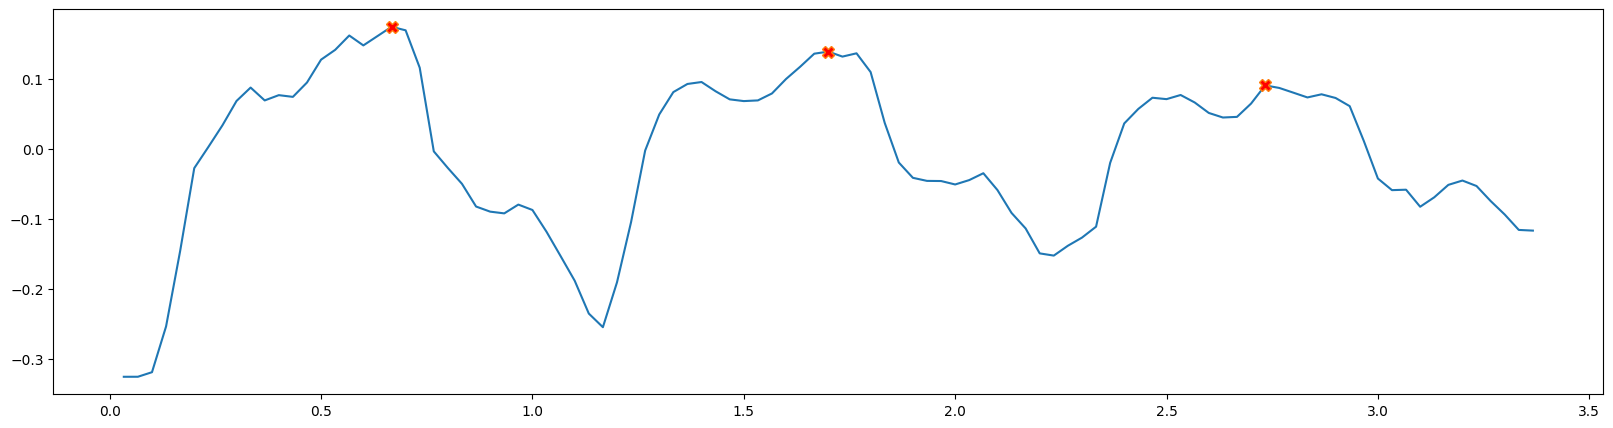

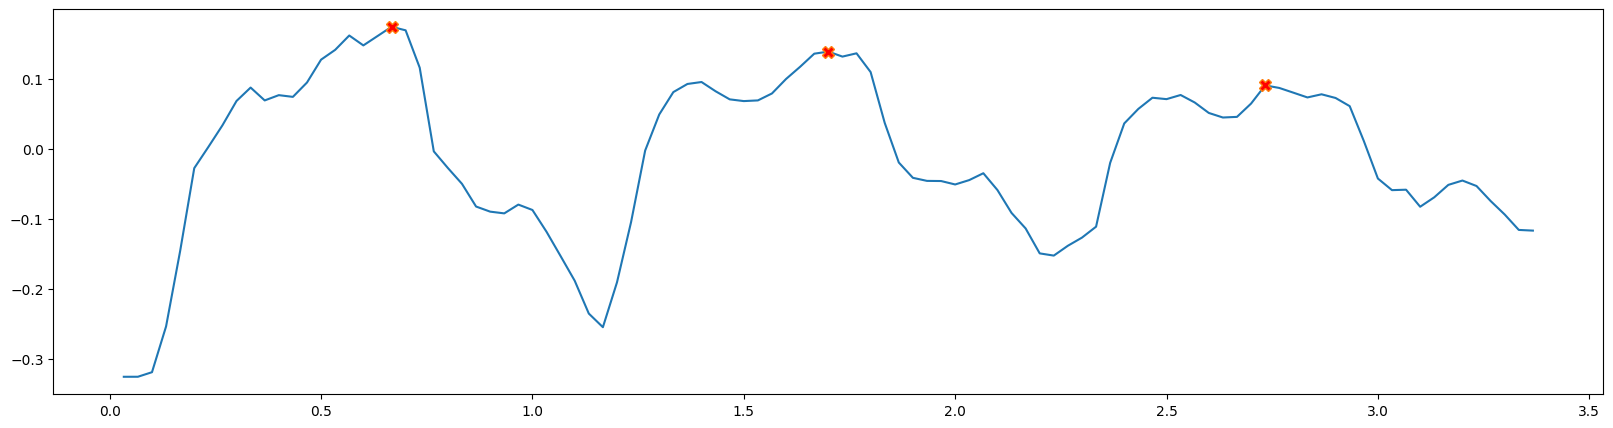

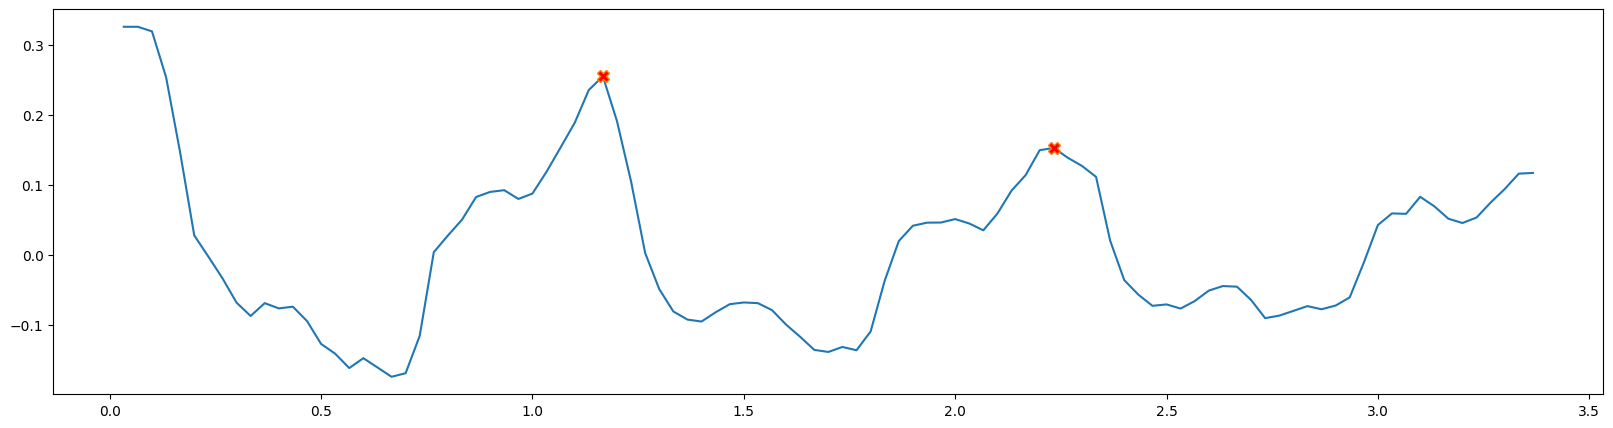

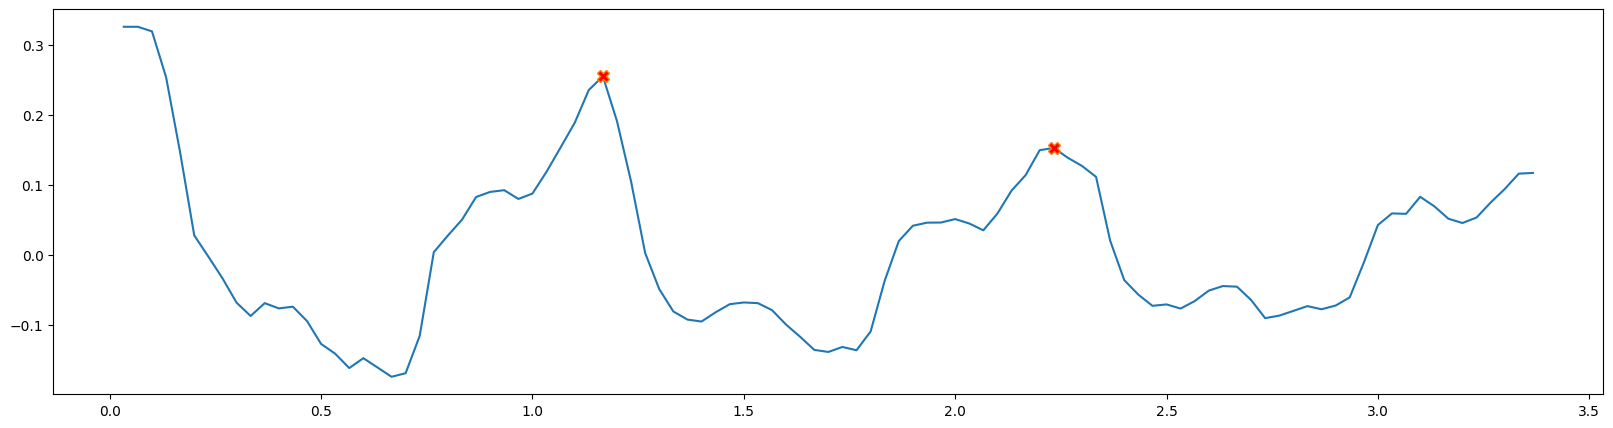

t1 0.6666666666666666
t1 1.7
results [1.2682615031133508, 1.307152328367501]
t1 0.6666666666666666
t1 1.7
results [0.32567372900311514, 0.3417913601264635]
t1 0.6666666666666666
t1 1.7
results [0.18641740549740013, 0.19677264156648094]
t1 0.6666666666666666
t1 1.7
results [0.5109816827657201, 0.5283159165486344]
t1 0.6666666666666666
t1 1.7
results [0.5223835992158746, 0.5136678215067587]
t1 0.6666666666666666
t1 1.7
results [0.4158142254387228, 0.4033124815100829]
t1 0.6666666666666666
t1 1.7
results [0.4189381099699299, 0.4335855372439792]
t1 0.6666666666666666
t1 1.7
results [1.0422744730237459, 1.0401062803340833]
t1 0.6666666666666666
t1 1.7
results [1.072352874093014, 1.0773719412071139]
t1 0.6666666666666666
t1 1.7
results [0.6086505167465388, 0.6362302639383552]
t1 0.6666666666666666
t1 1.7
results [0.6113741025963155, 0.6438750092612391]
t1 0.6666666666666666
t1 1.7
results [0.6568874005170354, 0.663277319106262]
t1 0.6666666666666666
t1 1.7
results [0.6568874005170354, 0.6632

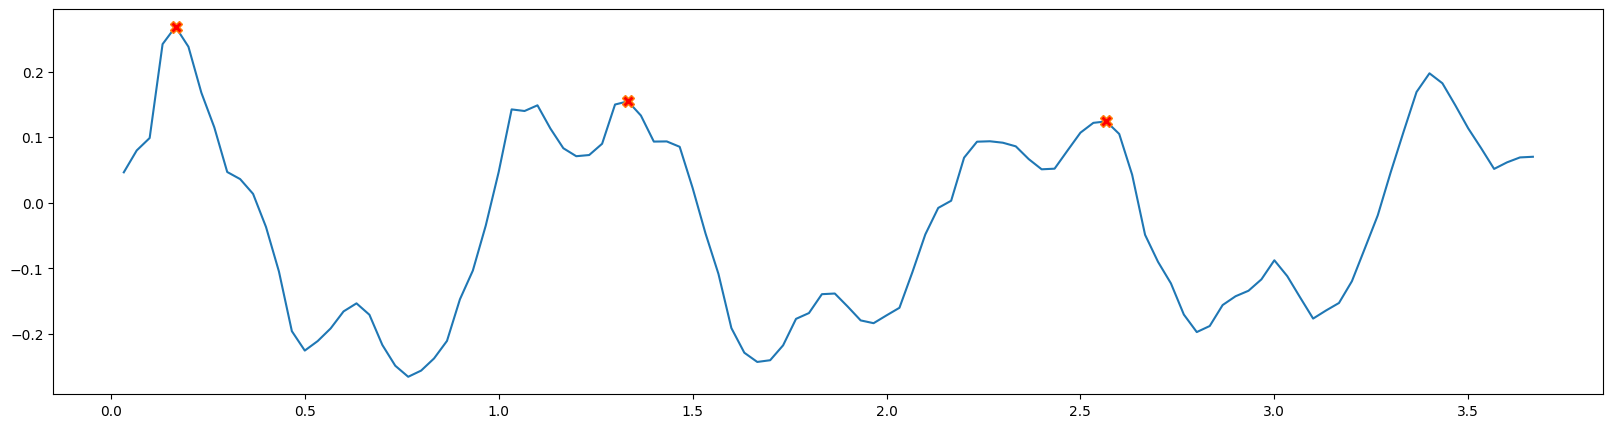

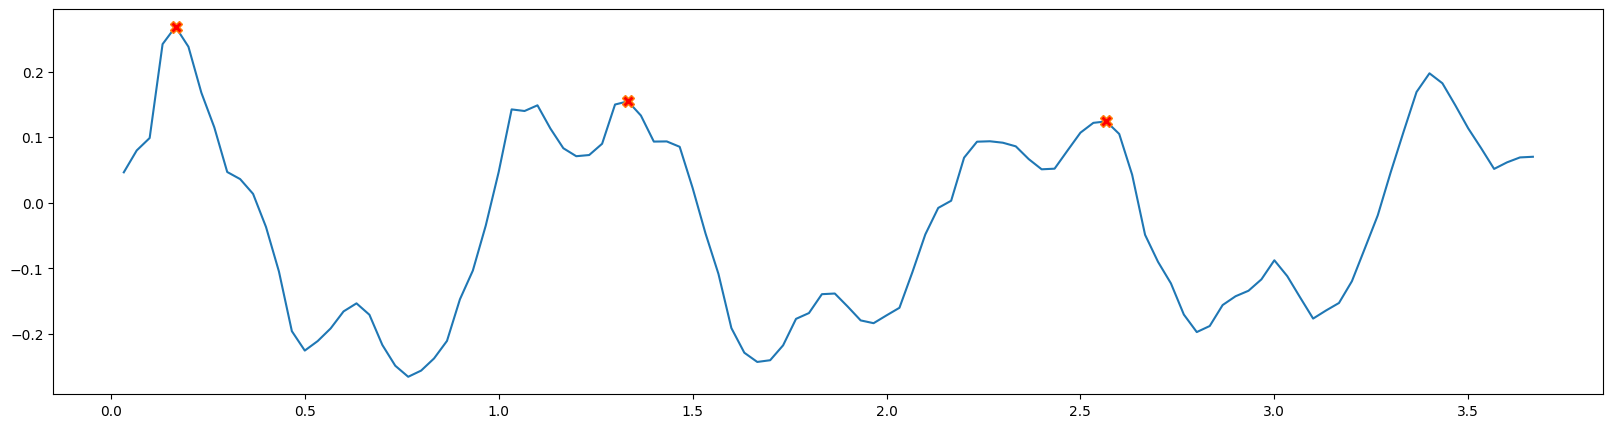

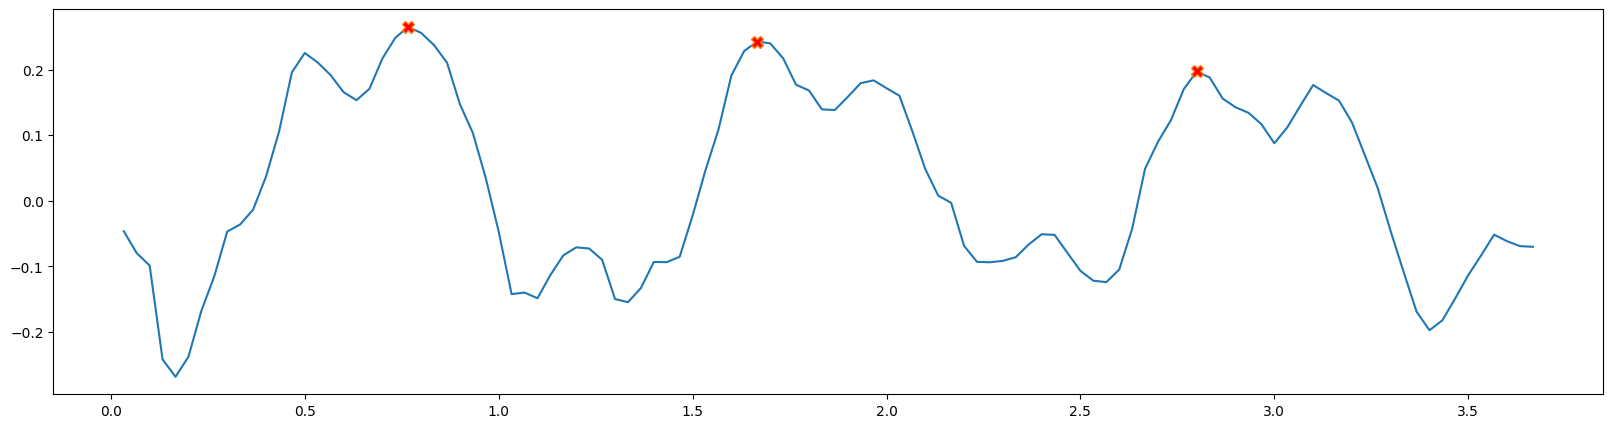

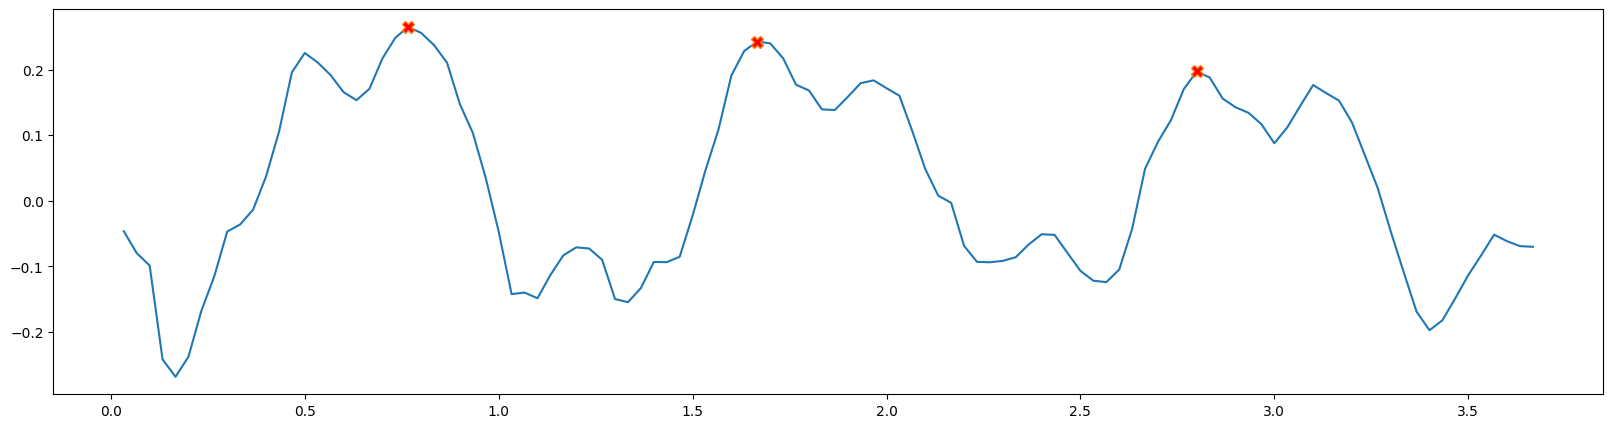

t1 0.16666666666666666
t1 1.3333333333333333
results [1.3667435332532334, 1.4130806263585873]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.3612580612815693, 0.3555269343437374]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.19547296401942169, 0.19644221425041528]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.540548903910391, 0.5410993051235765]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.5404119115593837, 0.5445683361945666]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.45728140343586776, 0.4241897081836727]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.4933532324695661, 0.519290241481856]
t1 0.16666666666666666
t1 1.3333333333333333
results [1.1074491194324765, 1.0735339061232083]
t1 0.16666666666666666
t1 1.3333333333333333
results [1.1628976083180107, 1.1973413527378671]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.7056169235421206, 0.7226486463054506]
t1 0.16666666666666666
t1 1.3333333333333333
results [0.665

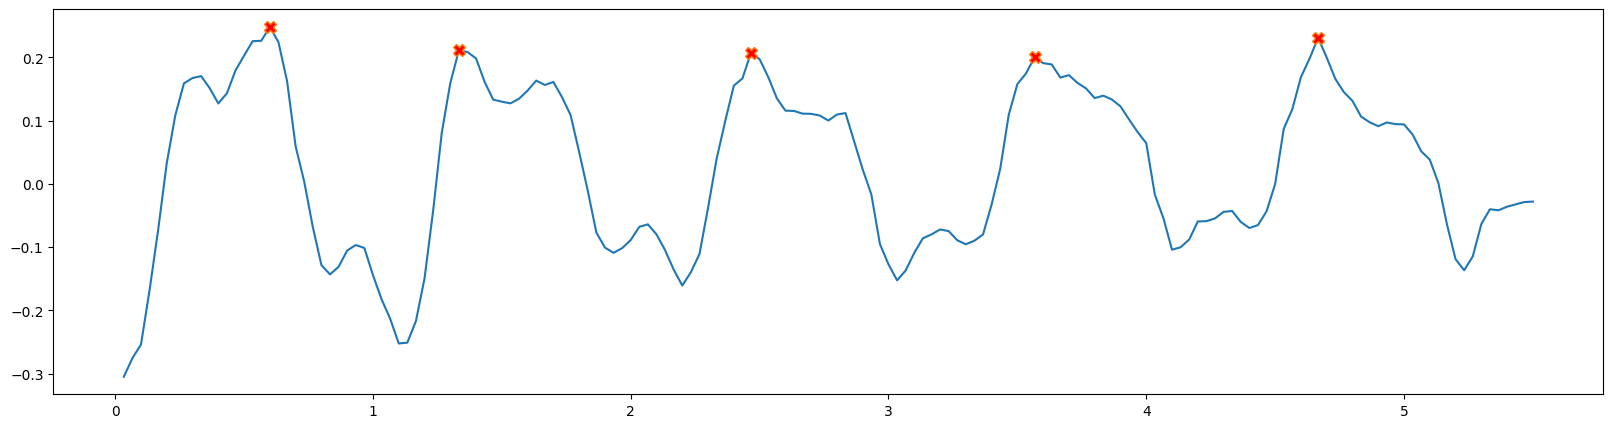

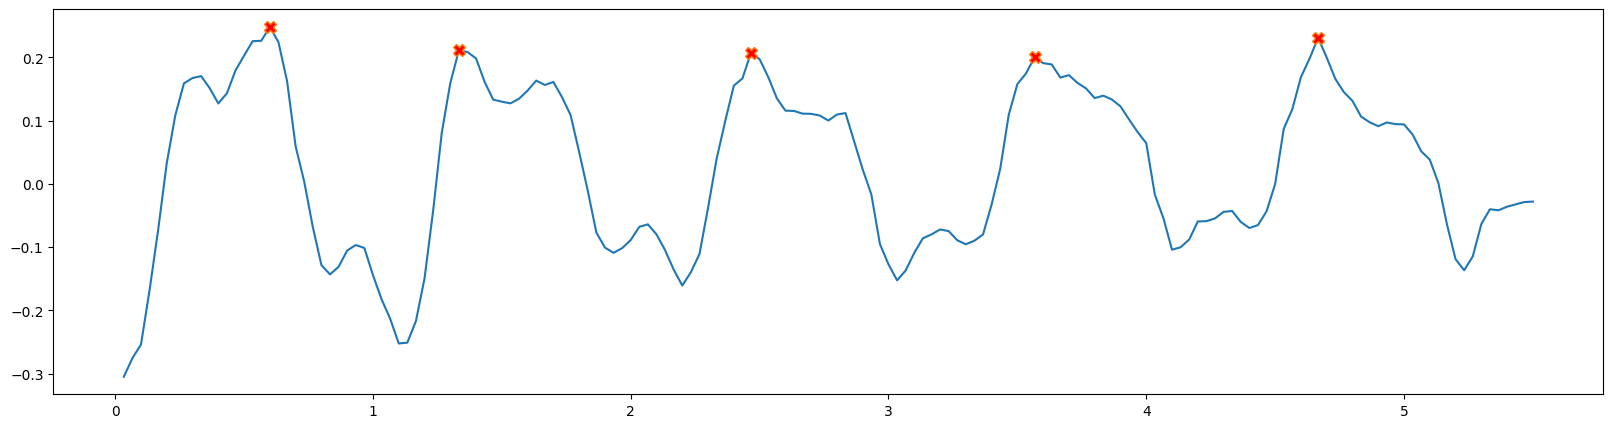

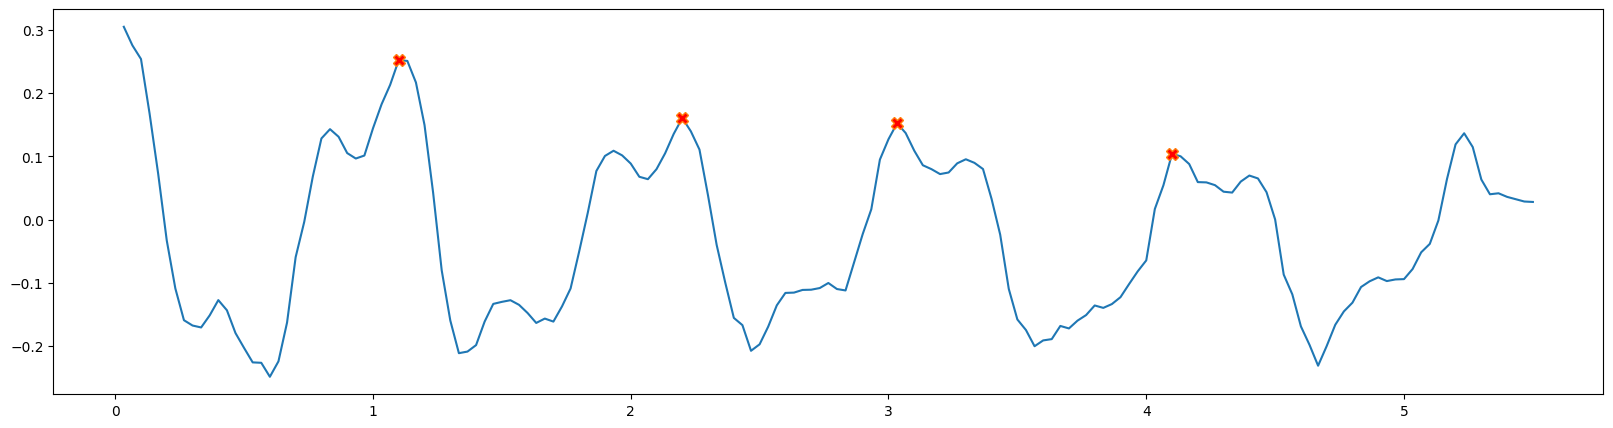

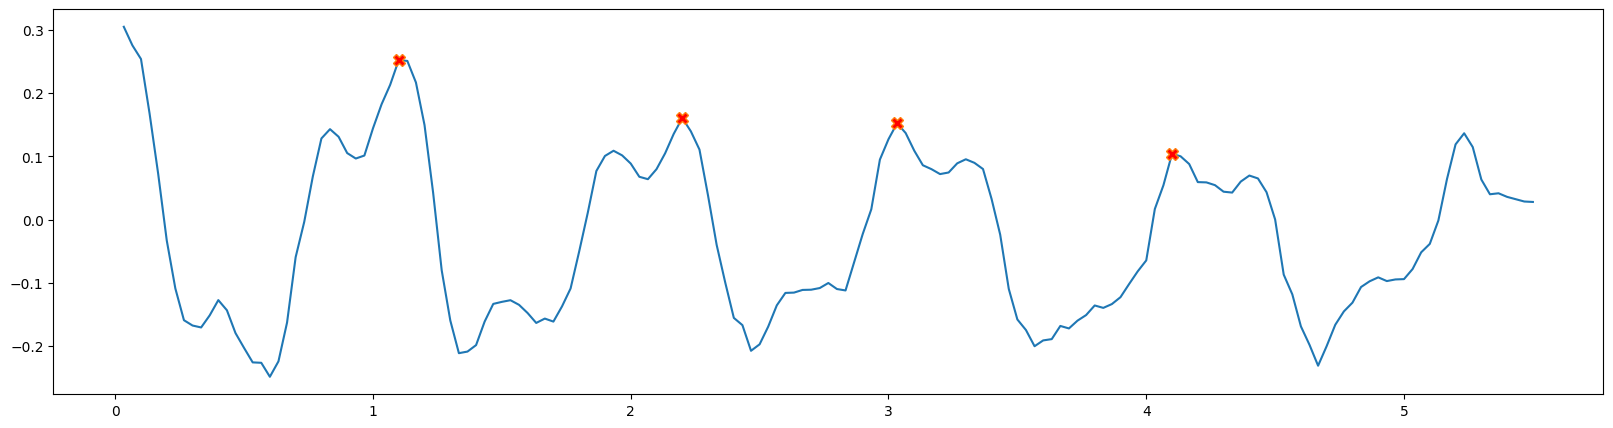

t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [1.4239938657809077, 1.44083502794384, 1.4257899885375407, 1.4606809658689097]
t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [0.36942539115797124, 0.3792119254368459, 0.37916817030131006, 0.37465641079752826]
t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [0.20704464927945604, 0.201952362474706, 0.2009518958093055, 0.20034845159177014]
t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [0.5539505381271851, 0.550578502766337, 0.5325694664590971, 0.5351185944087814]
t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [0.5591774550349498, 0.532872010736154, 0.5276929811494767, 0.5335045227037967]
t1 0.6
t1 1.3333333333333333
t1 2.466666666666667
t1 3.566666666666667
results [0.4017648550906421, 0.4399730116738719, 0.4452147676455747, 0.4437008611274372]
t1 0.6
t1 1.3333333333333333
t1 2.466666

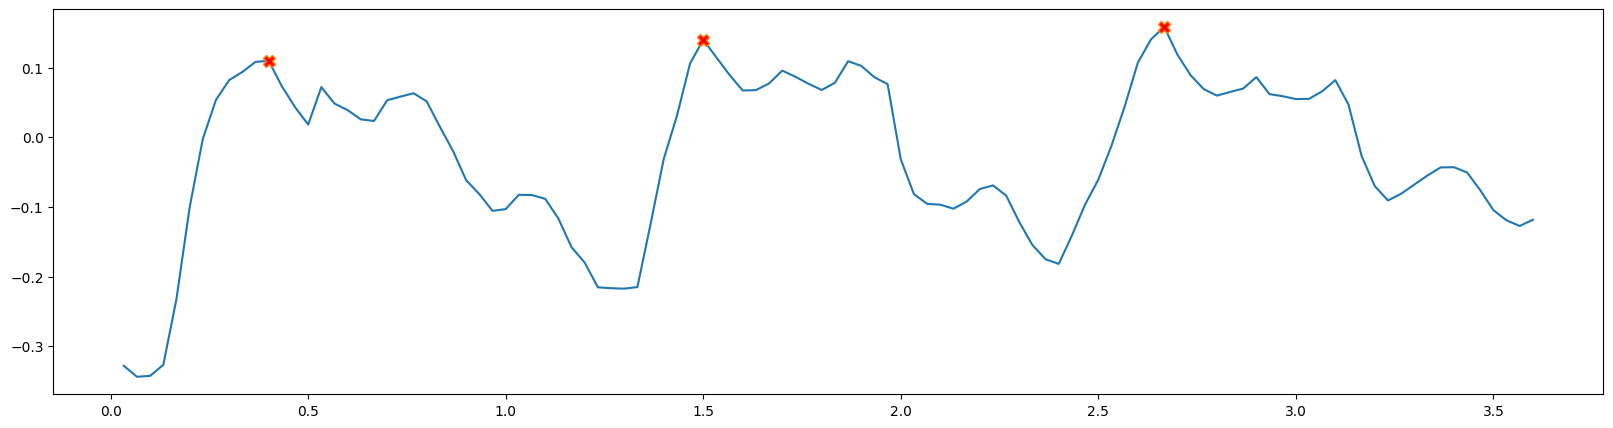

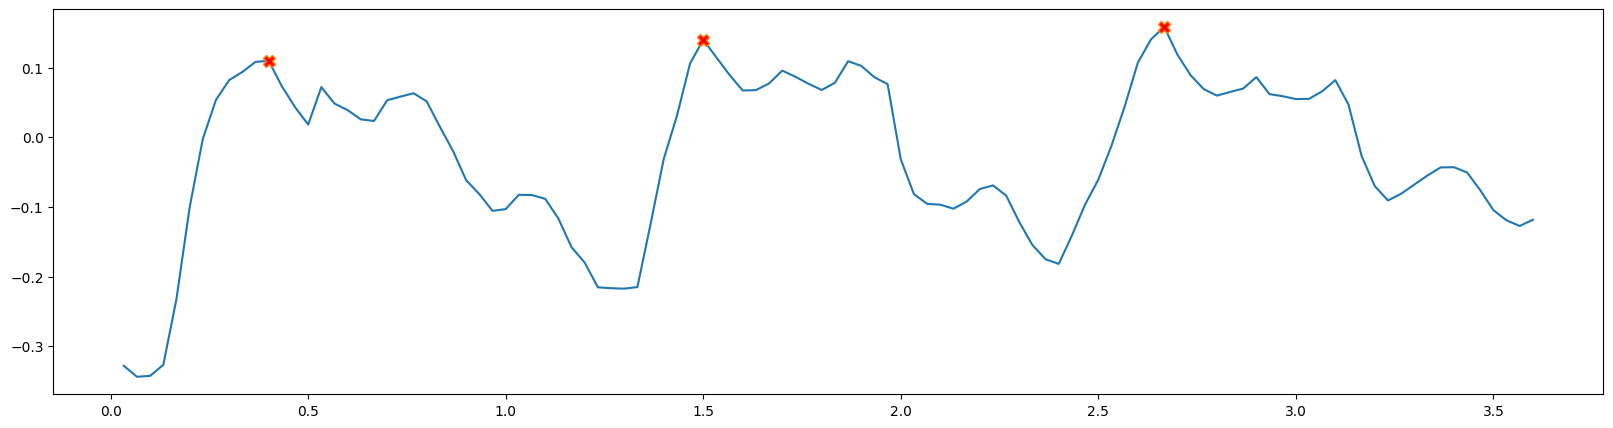

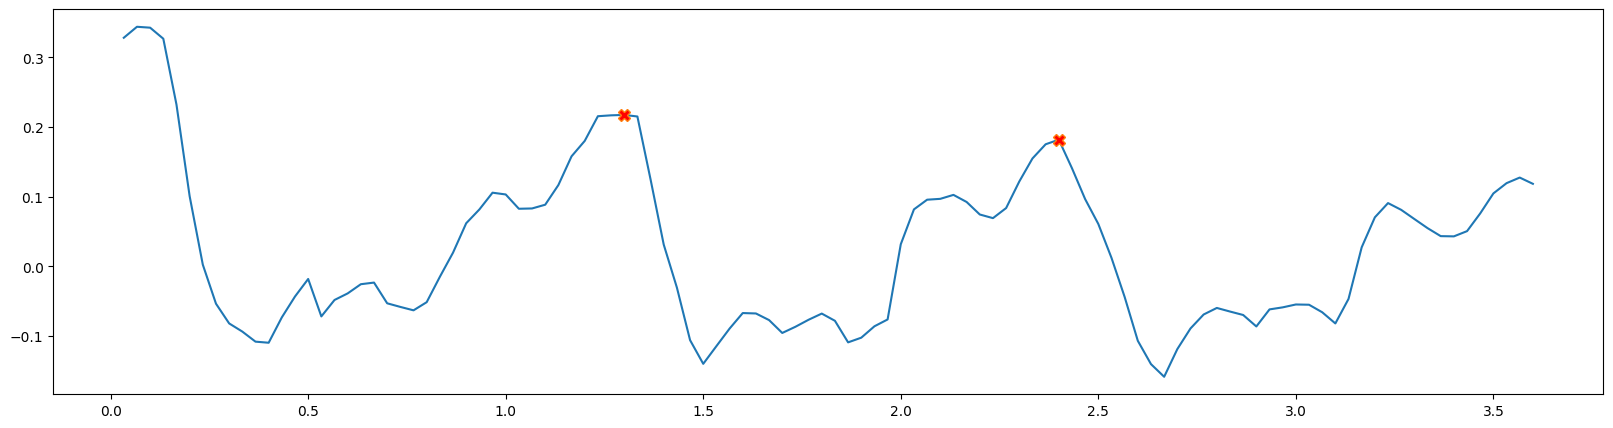

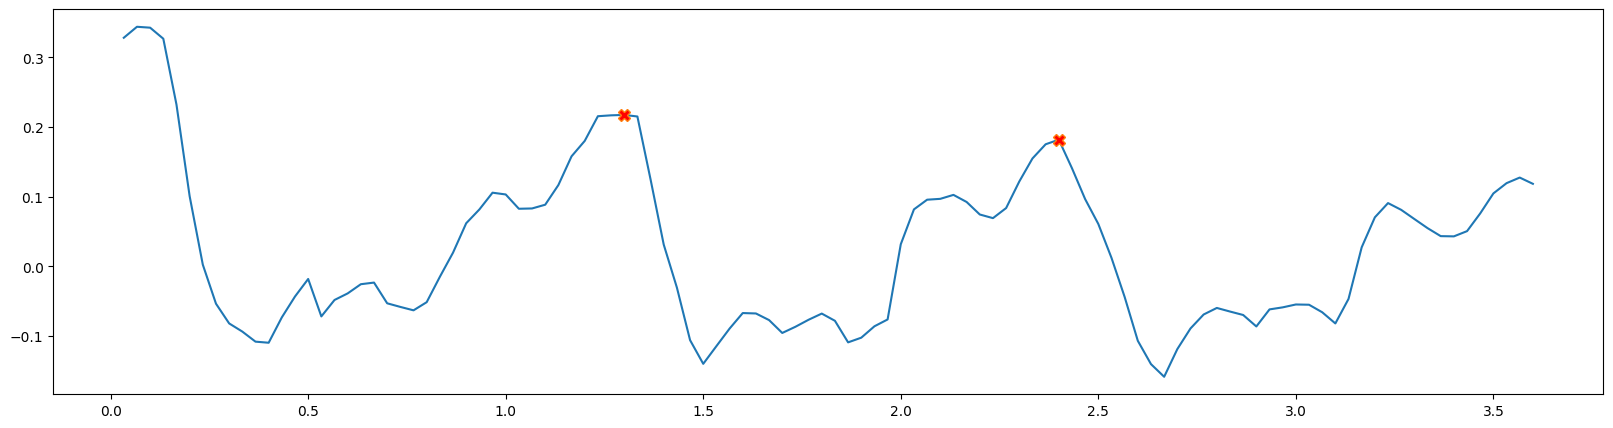

t1 0.4
t1 1.5
results [1.3458129502899048, 1.4028712063759918]
t1 0.4
t1 1.5
results [0.36513368974815325, 0.3772955996657177]
t1 0.4
t1 1.5
results [0.19964062653361658, 0.20246632875450288]
t1 0.4
t1 1.5
results [0.5402862535895188, 0.5658403462260504]
t1 0.4
t1 1.5
results [0.5469277766240367, 0.5520580988484548]
t1 0.4
t1 1.5
results [0.4206608630321563, 0.4315401632613949]
t1 0.4
t1 1.5
results [0.45693778925572964, 0.43043236350304753]
t1 0.4
t1 1.5
results [1.0757756543893484, 1.1152171499143329]
t1 0.4
t1 1.5
results [1.1304510318357688, 1.116364132549799]
t1 0.4
t1 1.5
results [0.6624358412003764, 0.6693484693844848]
t1 0.4
t1 1.5
results [0.6471790925976608, 0.683638858591838]
t1 0.4
t1 1.5
results [0.6986338576922438, 0.7192323477841535]
t1 0.4
t1 1.5
results [0.6986338576922438, 0.7192323477841535]
t1 0.4
t1 1.5
results [0.11339831955020316, 0.11939848853541922]
t1 0.4
t1 1.5
results [0.03628785550591293, 0.03607891316709516]
t1 0.4
t1 1.5
results [0.023570024188689, 0.0250

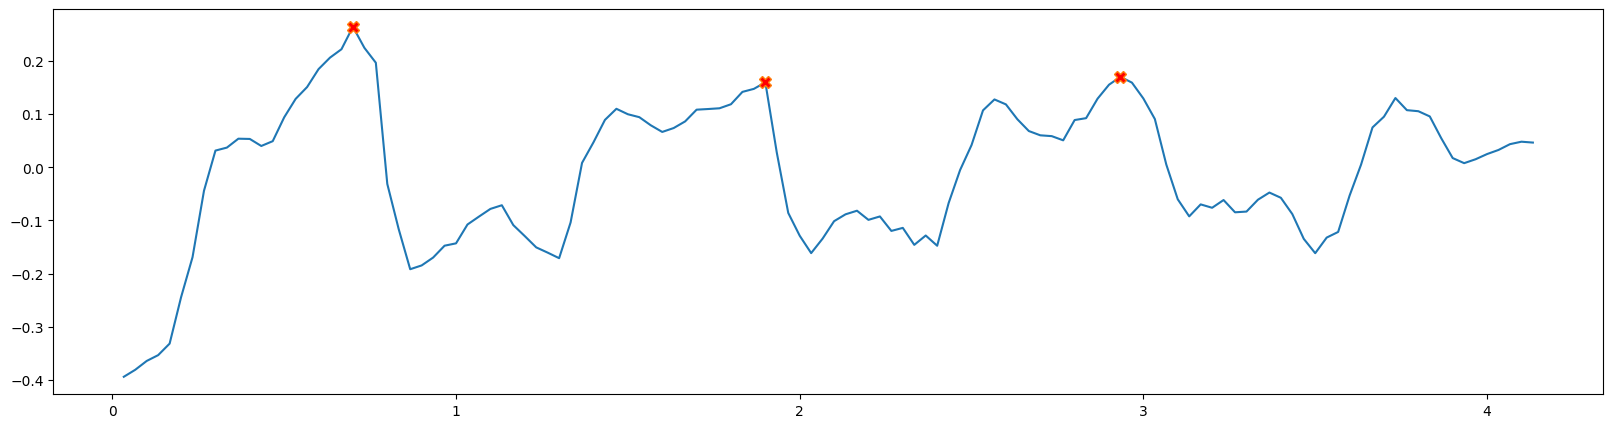

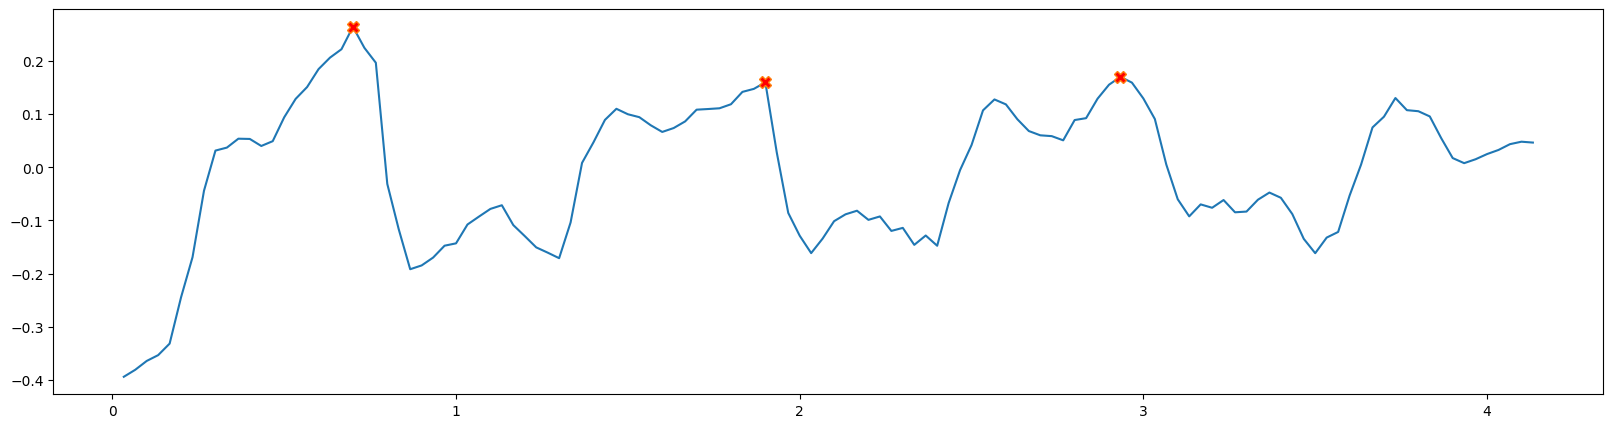

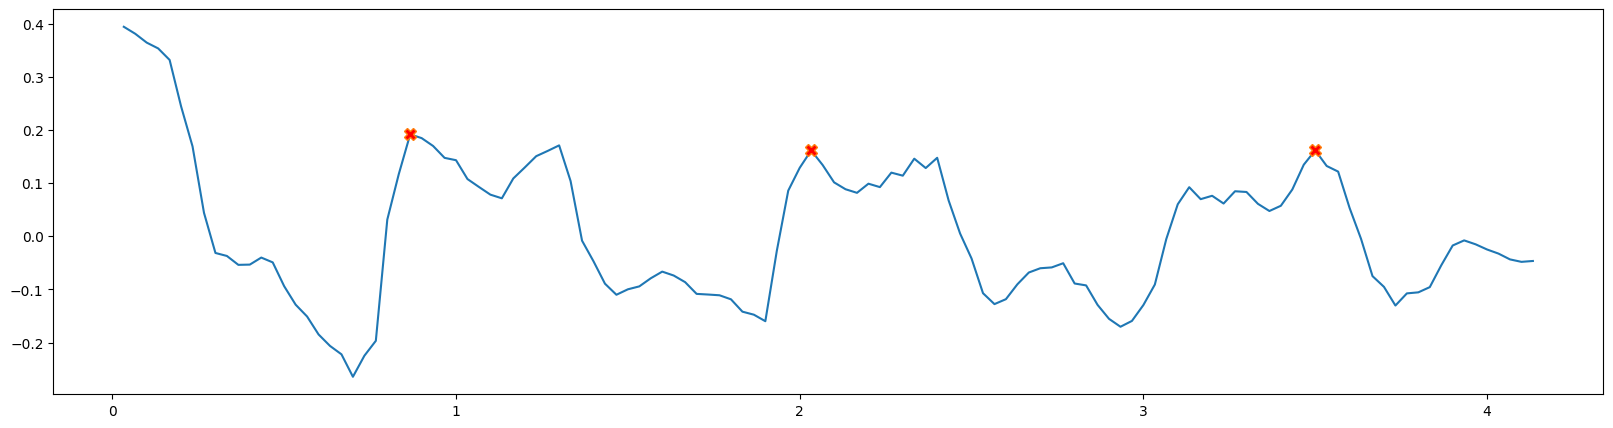

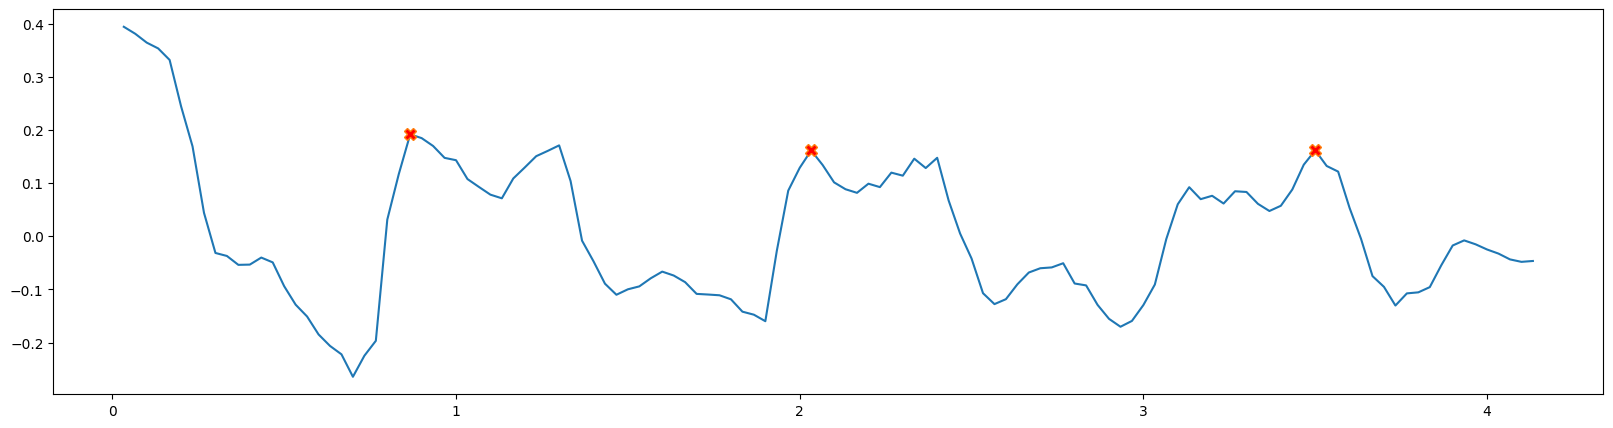

t1 0.7
t1 1.9
results [1.3043340124950442, 1.260904534601341]
t1 0.7
t1 1.9
results [0.3795418268405113, 0.3745400387492255]
t1 0.7
t1 1.9
results [0.202583155645821, 0.20143788933862544]
t1 0.7
t1 1.9
results [0.5461911666679354, 0.5347035830597482]
t1 0.7
t1 1.9
results [0.5299152523826226, 0.5315165481894057]
t1 0.7
t1 1.9
results [0.49750917463505623, 0.4835627088085822]
t1 0.7
t1 1.9
results [0.491029976276237, 0.4854976007005891]
t1 0.7
t1 1.9
results [1.1717660623972788, 1.1480805381545938]
t1 0.7
t1 1.9
results [1.1545257574122219, 1.1513072449126154]
t1 0.7
t1 1.9
results [0.6454598064458144, 0.6270686601655167]
t1 0.7
t1 1.9
results [0.6567003393976151, 0.6360312583694752]
t1 0.7
t1 1.9
results [0.6476336730974293, 0.6248732762318658]
t1 0.7
t1 1.9
results [0.6476336730974293, 0.6248732762318658]
t1 0.7
t1 1.9
results [0.1266126029631378, 0.12358360030396373]
t1 0.7
t1 1.9
results [0.04090662257644343, 0.03952259887842446]
t1 0.7
t1 1.9
results [0.024634869938830038, 0.025309

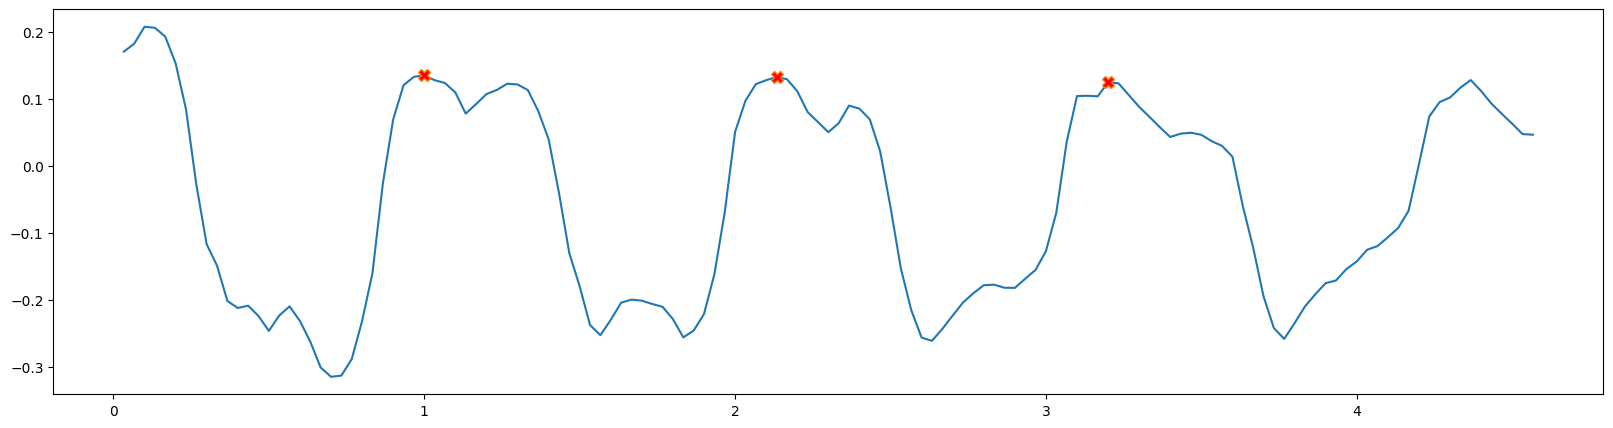

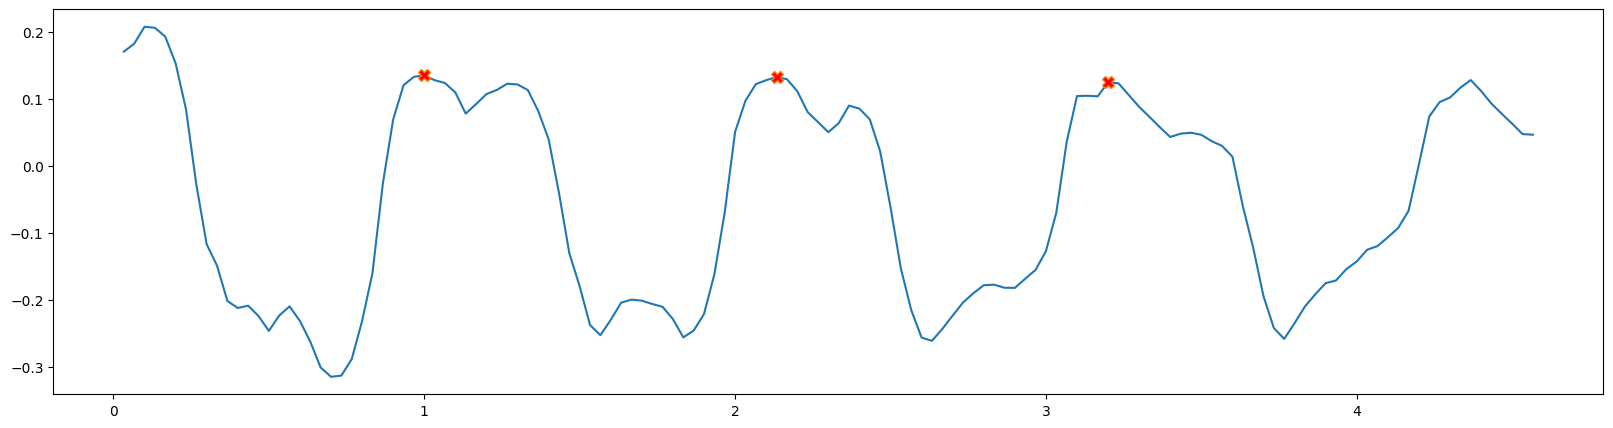

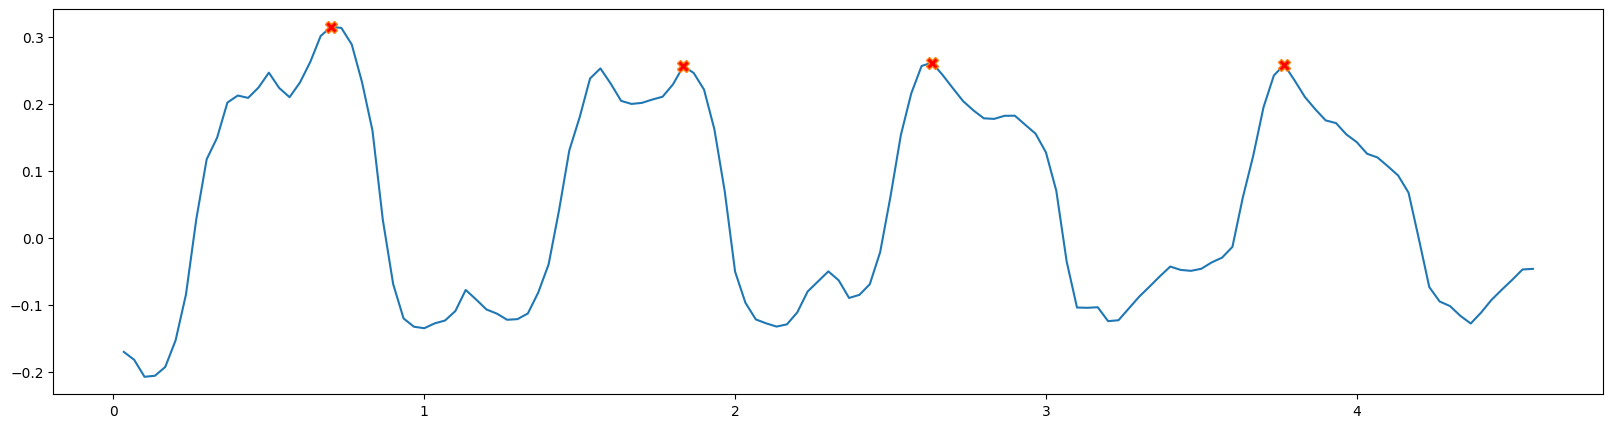

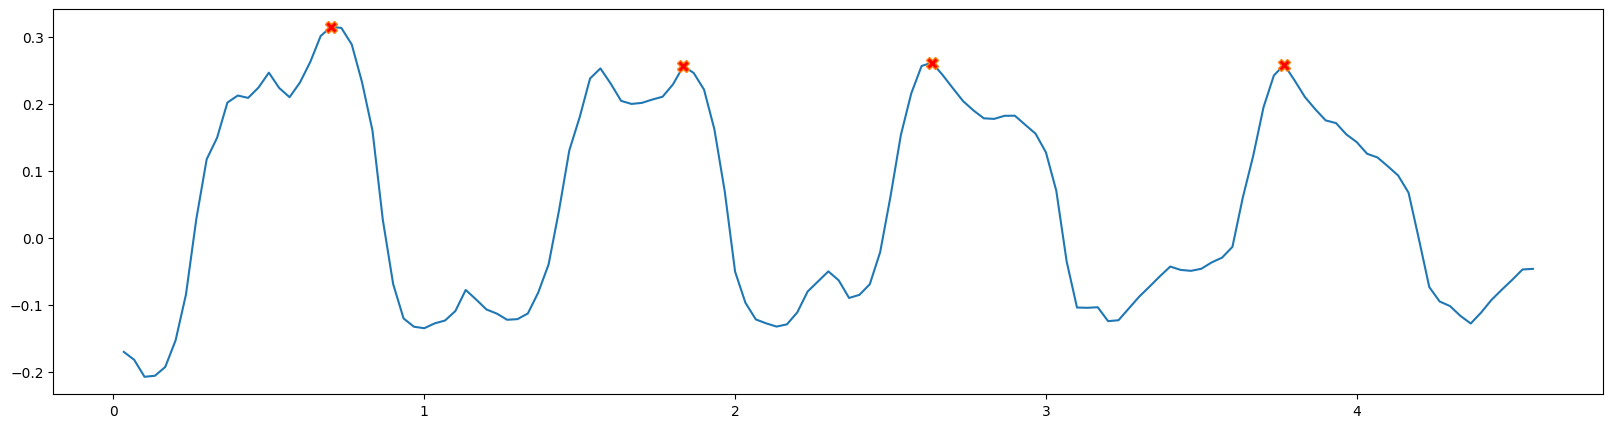

t1 1.0
t1 2.1333333333333333
results [1.3423928116908135, 1.341441066198916]
t1 1.0
t1 2.1333333333333333
results [0.35917877352515415, 0.34655426727791455]
t1 1.0
t1 2.1333333333333333
results [0.19519755204625053, 0.1927673374251082]
t1 1.0
t1 2.1333333333333333
results [0.5235284395266466, 0.5119426434355197]
t1 1.0
t1 2.1333333333333333
results [0.5176659866591526, 0.5200592409842301]
t1 1.0
t1 2.1333333333333333
results [0.4156098796624232, 0.42214224238078546]
t1 1.0
t1 2.1333333333333333
results [0.4298096419219689, 0.4265072416488458]
t1 1.0
t1 2.1333333333333333
results [1.0503257174636063, 1.052283852786108]
t1 1.0
t1 2.1333333333333333
results [1.0671077741940305, 1.0660349355002119]
t1 1.0
t1 2.1333333333333333
results [0.6615877685585038, 0.6661503021529462]
t1 1.0
t1 2.1333333333333333
results [0.6474086453857805, 0.6628218696706659]
t1 1.0
t1 2.1333333333333333
results [0.6949841663050332, 0.6786191965282502]
t1 1.0
t1 2.1333333333333333
results [0.6949841663050332, 0.67

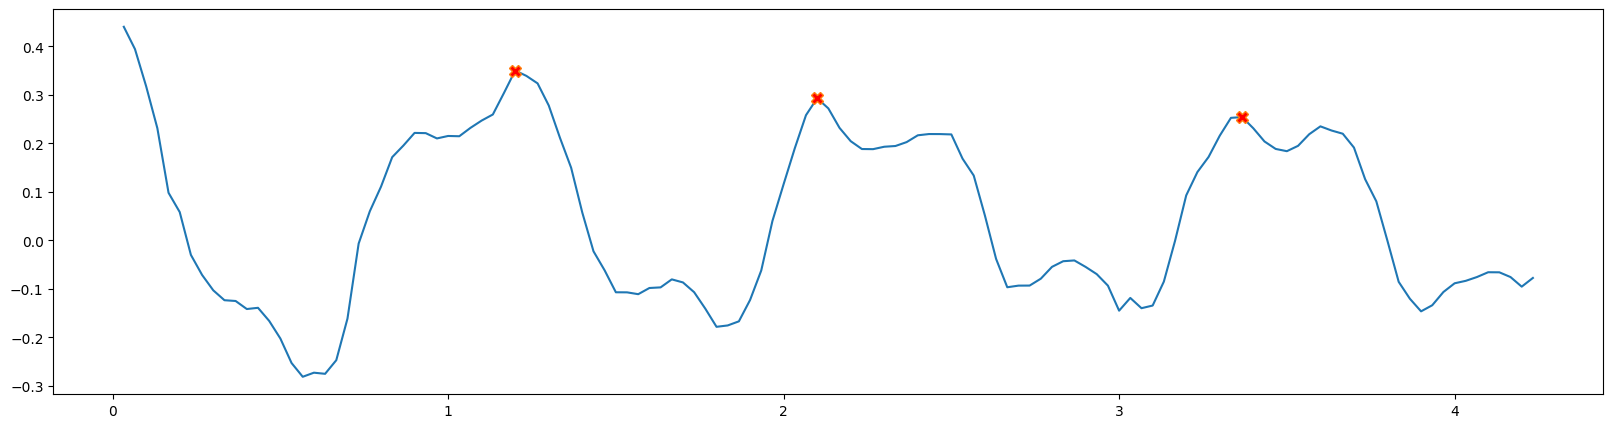

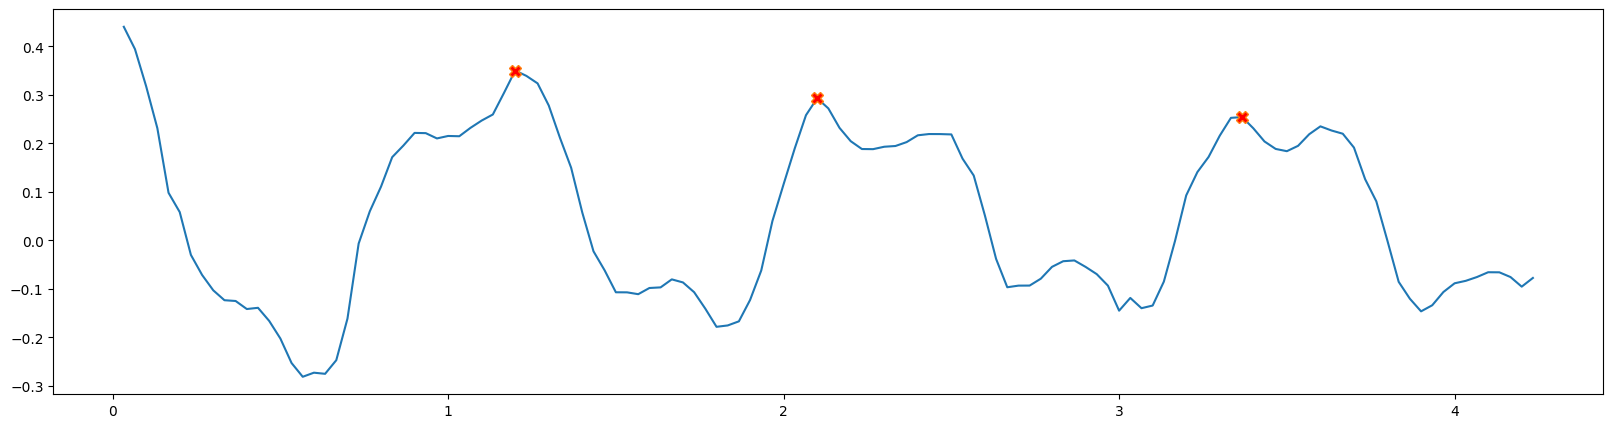

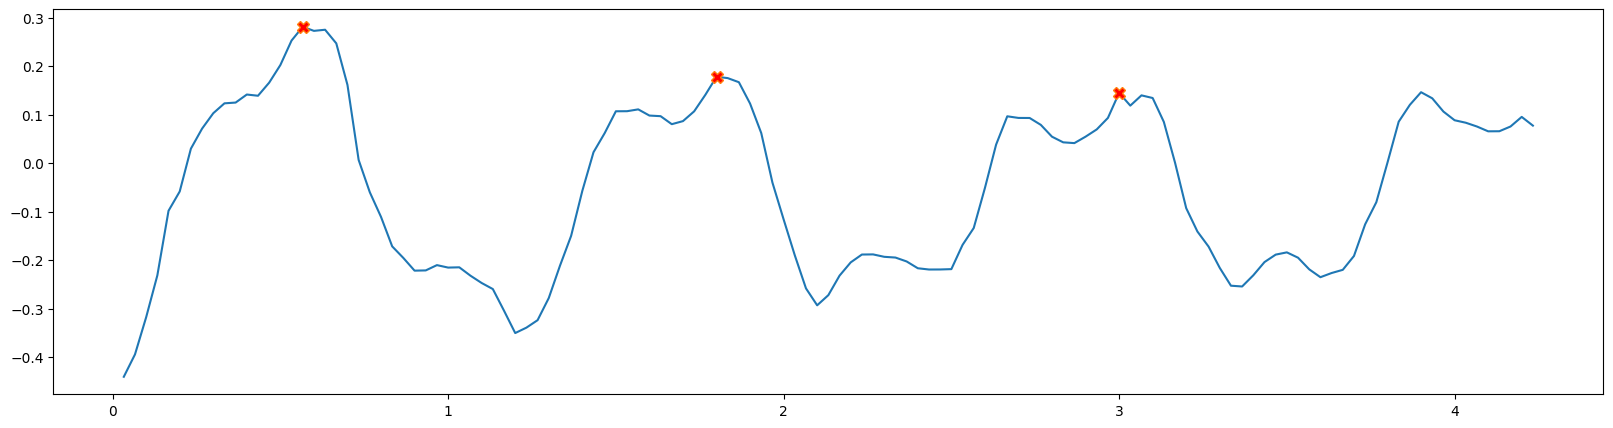

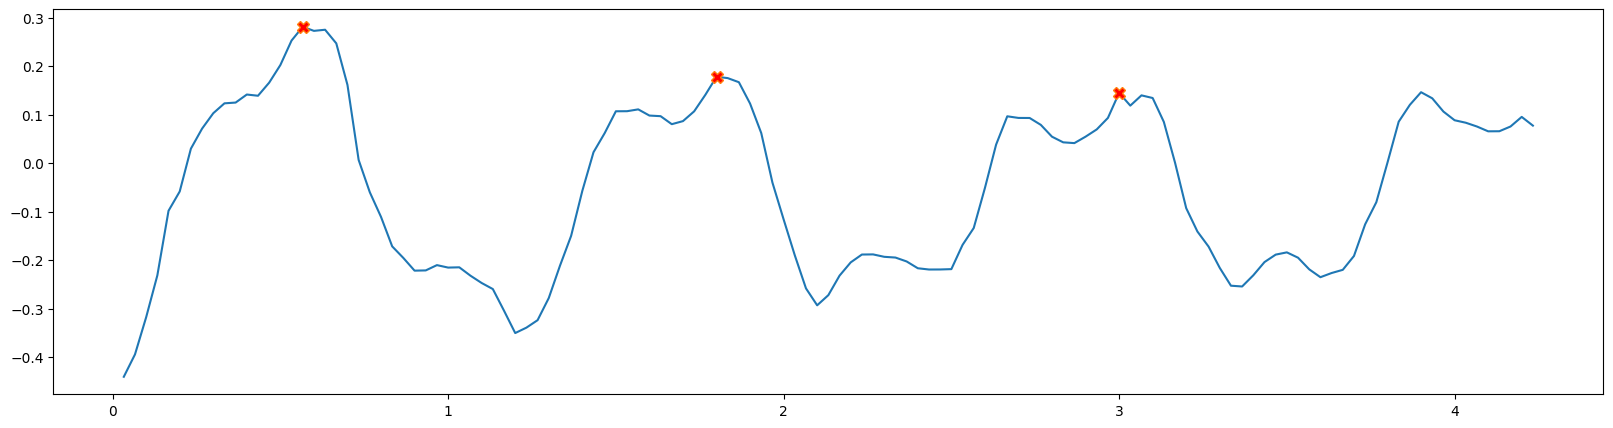

t1 1.2
t1 2.1
results [1.4159245429599505, 1.4171566154625221]
t1 1.2
t1 2.1
results [0.3742733601184323, 0.3635518492757414]
t1 1.2
t1 2.1
results [0.1924321735539131, 0.18752684794296387]
t1 1.2
t1 2.1
results [0.5525267204216666, 0.5460703375035412]
t1 1.2
t1 2.1
results [0.5645192013604985, 0.5672755837799172]
t1 1.2
t1 2.1
results [0.4827914091716269, 0.4950151361432463]
t1 1.2
t1 2.1
results [0.5178069896137971, 0.515851928883429]
t1 1.2
t1 2.1
results [1.1473861684566127, 1.1634454086741342]
t1 1.2
t1 2.1
results [1.2149689968958726, 1.2161434688237738]
t1 1.2
t1 2.1
results [0.697363490086767, 0.6752196508940999]
t1 1.2
t1 2.1
results [0.7026582936102214, 0.7059720825800586]
t1 1.2
t1 2.1
results [0.7132662493497292, 0.7111845328824636]
t1 1.2
t1 2.1
results [0.7132662493497292, 0.7111845328824636]
t1 1.2
t1 2.1
results [0.12119064954565373, 0.12259935852536052]
t1 1.2
t1 2.1
results [0.035689223292179675, 0.0341413135326492]
t1 1.2
t1 2.1
results [0.024389815766443227, 0.02281

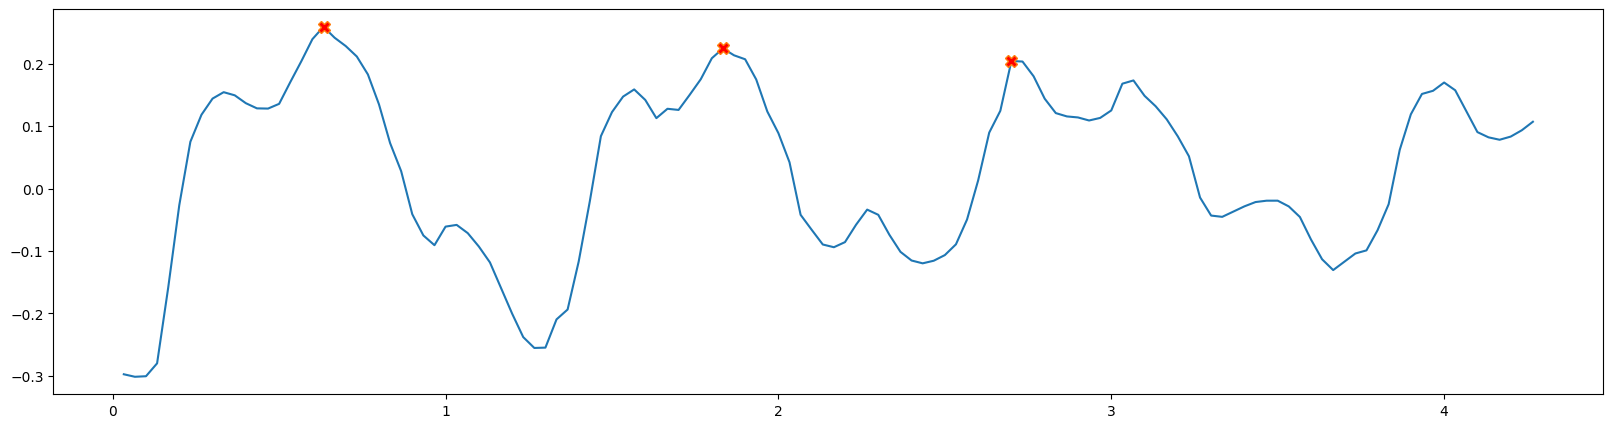

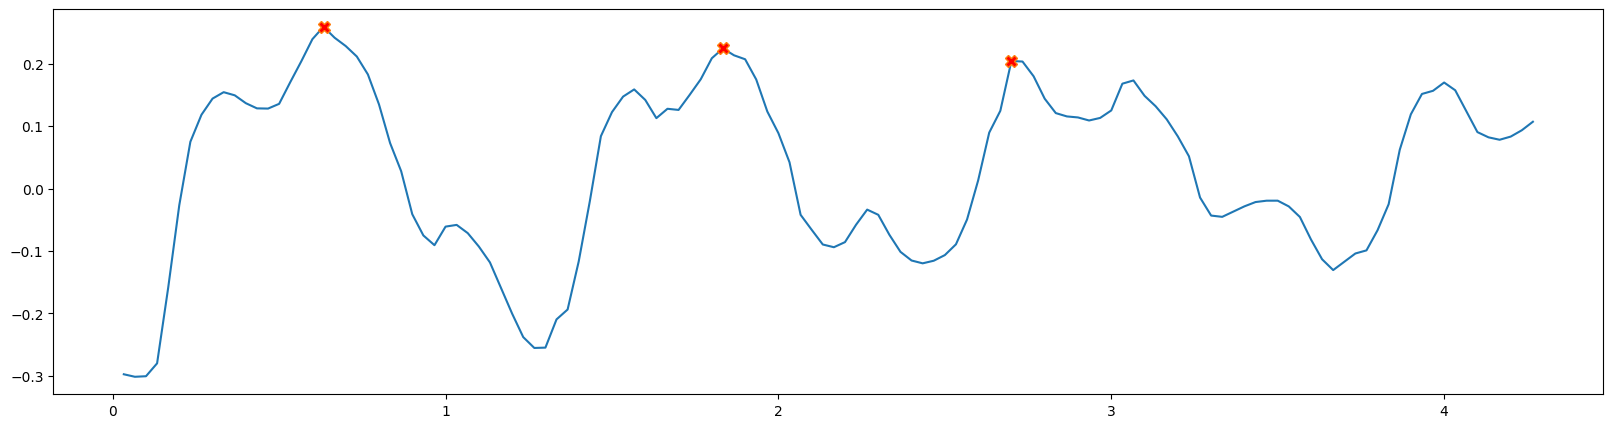

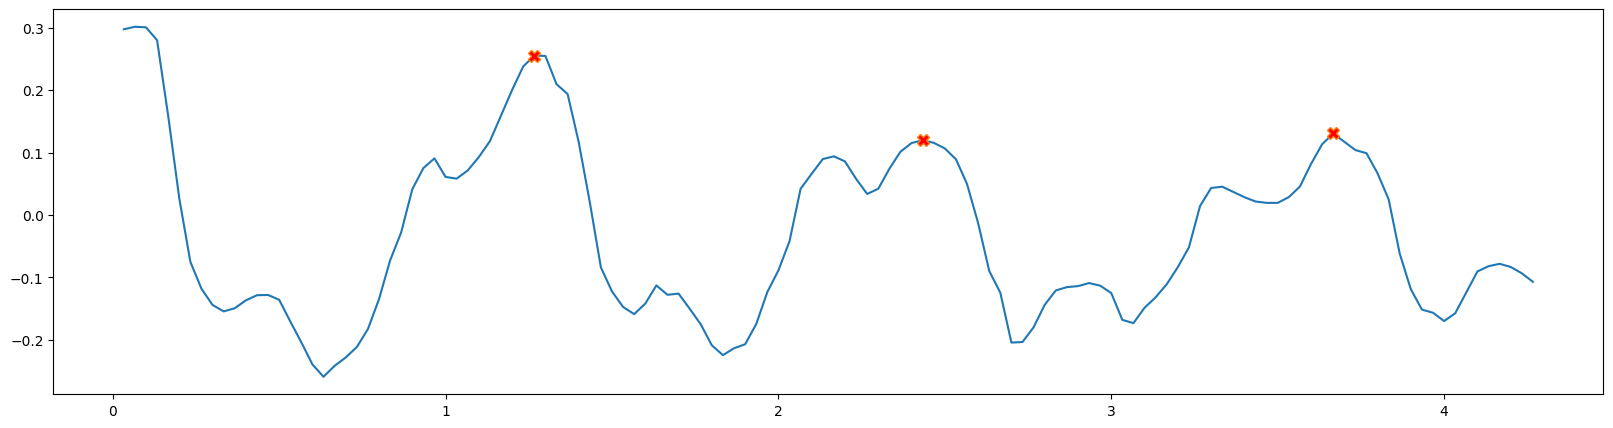

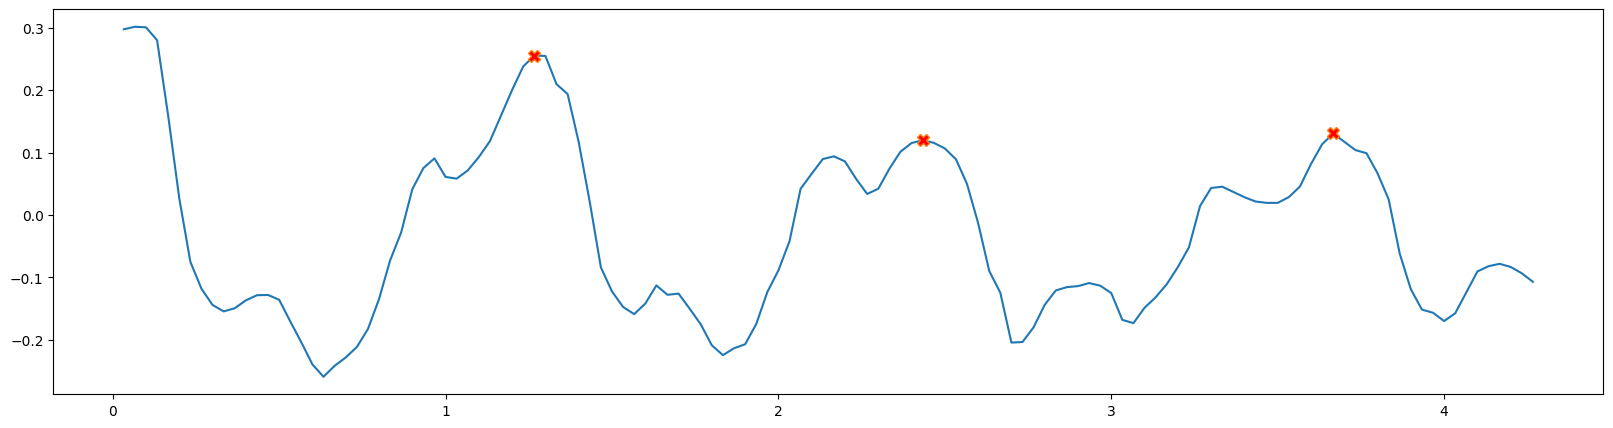

t1 0.6333333333333333
t1 1.8333333333333333
results [1.4764151055305033, 1.4685449504977086]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.35789942553548343, 0.355363176576983]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.20279989952699232, 0.19672530080085643]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.56237719217436, 0.558103763611143]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.5926048687155788, 0.6006629456008281]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.5196567906719924, 0.5064054948908477]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.4799026842645306, 0.49450463726451654]
t1 0.6333333333333333
t1 1.8333333333333333
results [1.2019823485071255, 1.179690514162471]
t1 0.6333333333333333
t1 1.8333333333333333
results [1.2072979144101523, 1.226324353826408]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.7310524899930895, 0.7316901079977834]
t1 0.6333333333333333
t1 1.8333333333333333
results [0.7403567943704367,

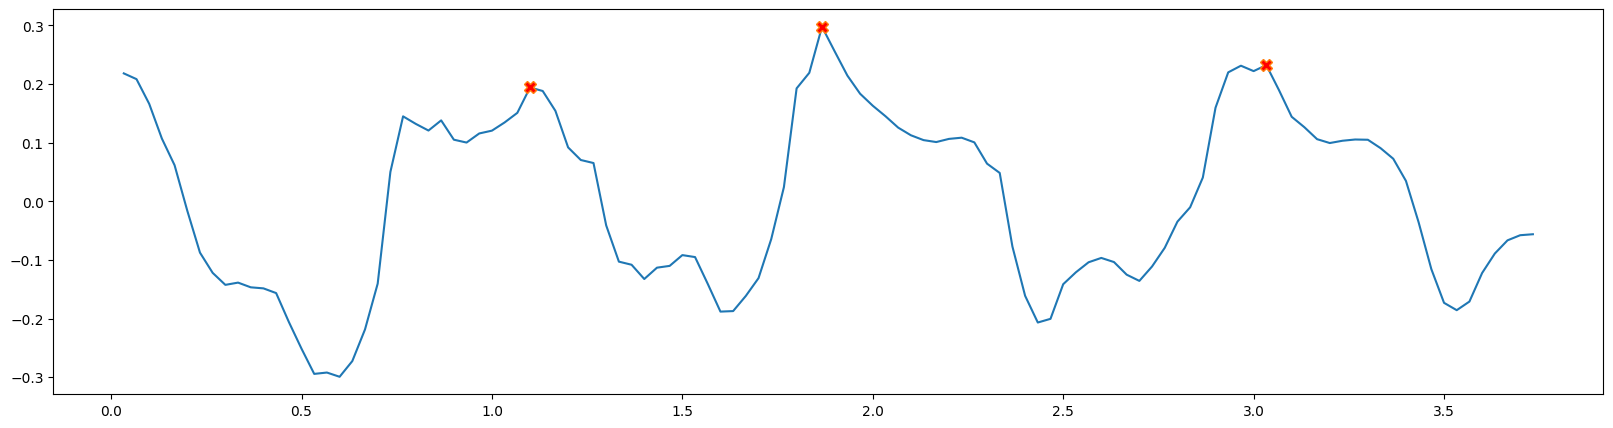

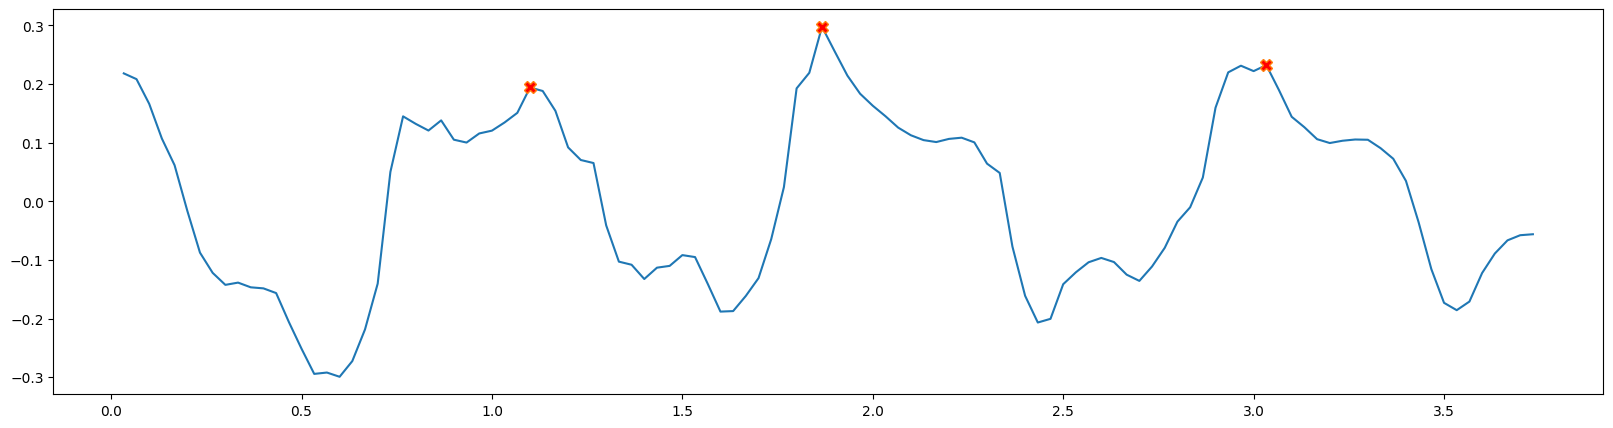

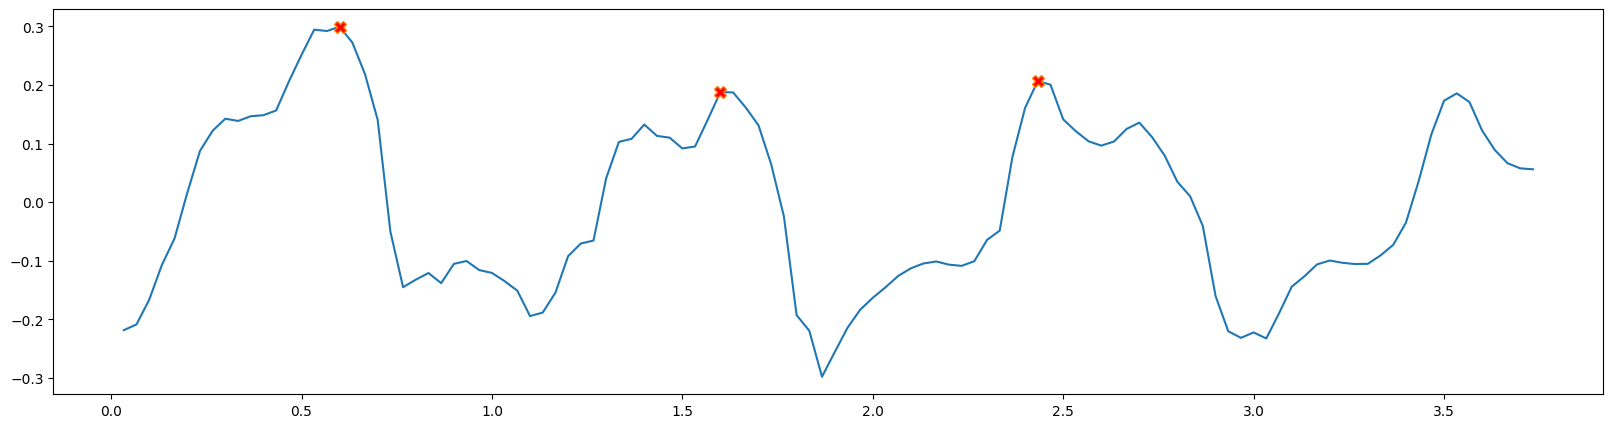

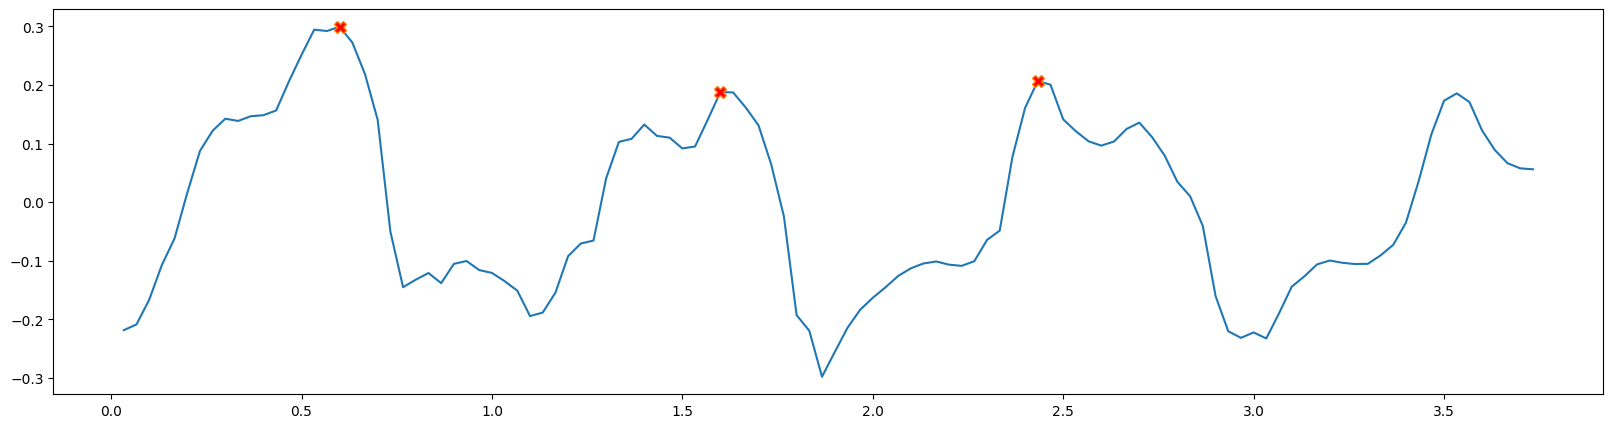

t1 1.1
t1 1.8666666666666667
results [1.3654966080279218, 1.3625915576283263]
t1 1.1
t1 1.8666666666666667
results [0.37218690405330834, 0.3773750643395545]
t1 1.1
t1 1.8666666666666667
results [0.20900761761123732, 0.2119532079668082]
t1 1.1
t1 1.8666666666666667
results [0.535989462132751, 0.5235537562548358]
t1 1.1
t1 1.8666666666666667
results [0.5232126770170394, 0.5307371668788619]
t1 1.1
t1 1.8666666666666667
results [0.3939775329447876, 0.4303780996083185]
t1 1.1
t1 1.8666666666666667
results [0.45951830879154315, 0.45650822180144285]
t1 1.1
t1 1.8666666666666667
results [1.03532610832141, 1.068979950026071]
t1 1.1
t1 1.8666666666666667
results [1.1054627132673993, 1.101328724647151]
t1 1.1
t1 1.8666666666666667
results [0.6493406481853289, 0.6330197664388618]
t1 1.1
t1 1.8666666666666667
results [0.6477418048089237, 0.6426092321965808]
t1 1.1
t1 1.8666666666666667
results [0.7177548032189981, 0.7199823254317456]
t1 1.1
t1 1.8666666666666667
results [0.7177548032189981, 0.71998

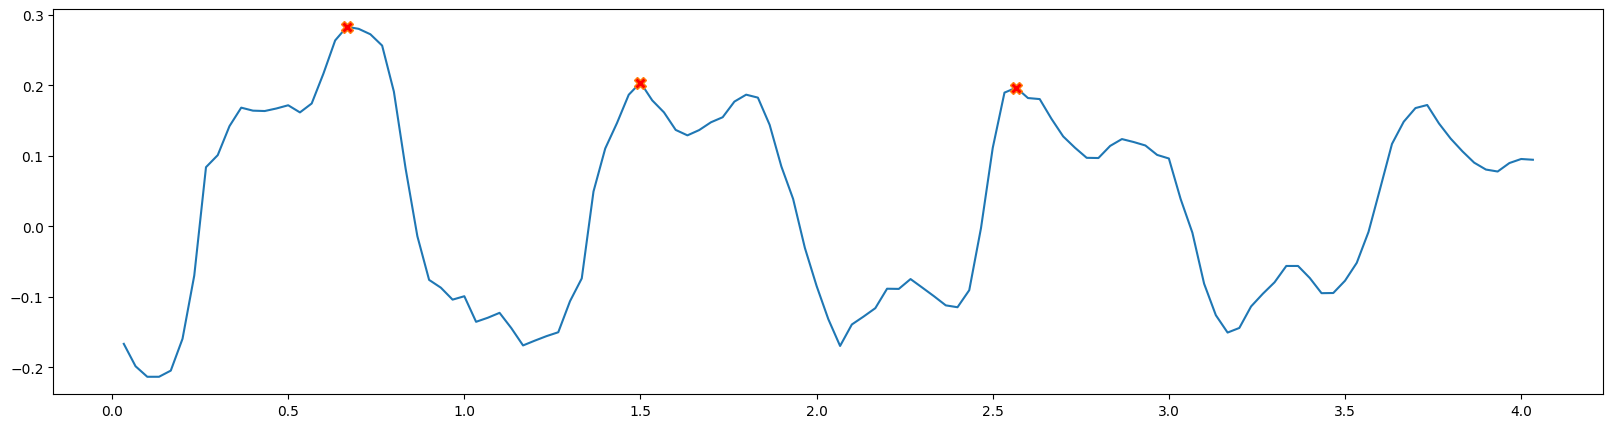

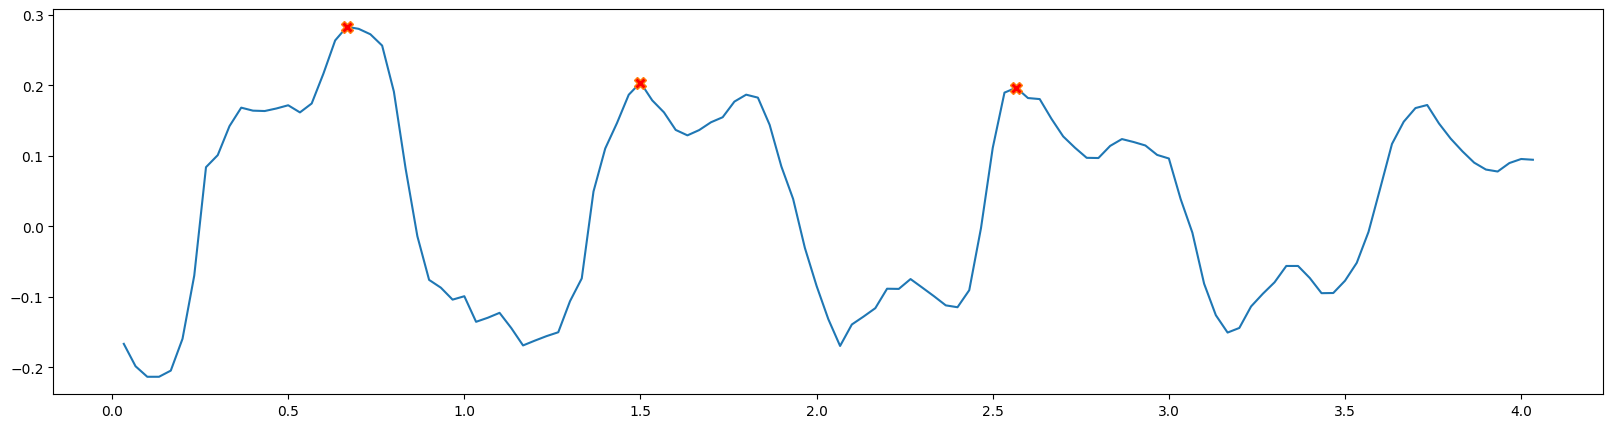

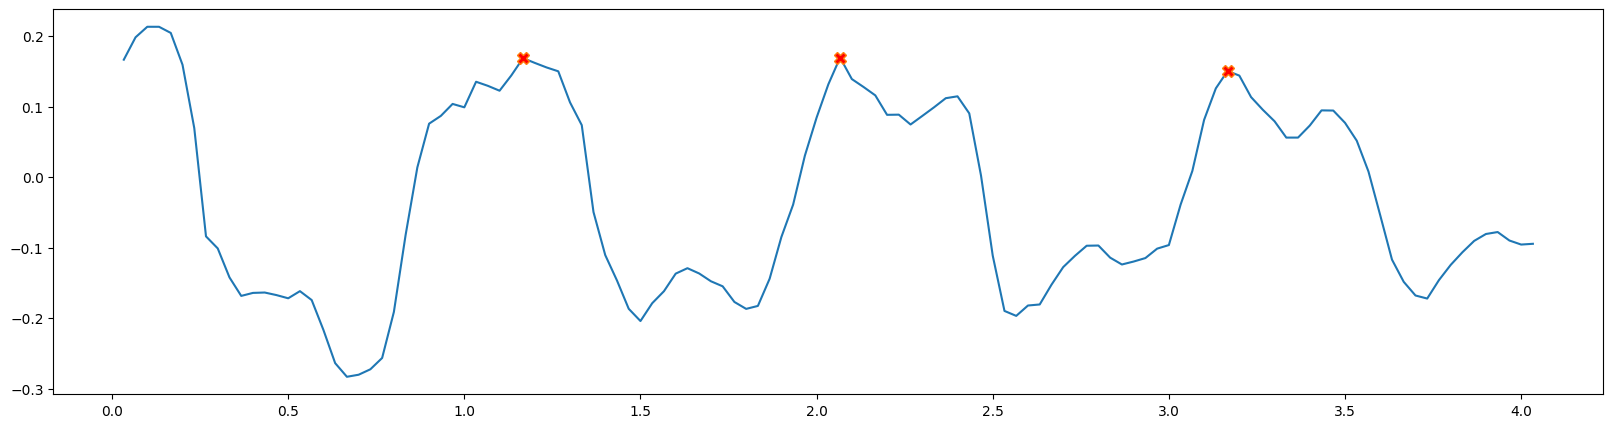

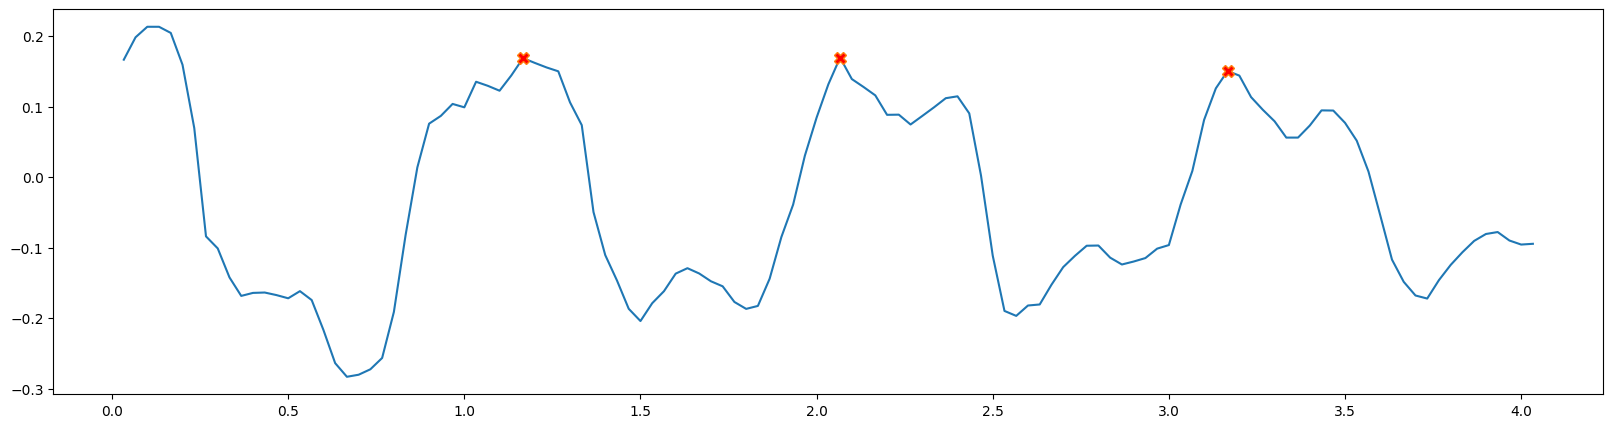

t1 0.6666666666666666
t1 1.5
results [1.4485384666896393, 1.4405742447688008]
t1 0.6666666666666666
t1 1.5
results [0.3702339303793107, 0.3651565113027125]
t1 0.6666666666666666
t1 1.5
results [0.19699638396696514, 0.1998370192950028]
t1 0.6666666666666666
t1 1.5
results [0.5367188895547275, 0.5370130184696394]
t1 0.6666666666666666
t1 1.5
results [0.5180022257201089, 0.5177033340180792]
t1 0.6666666666666666
t1 1.5
results [0.48131089488844, 0.4890079518141629]
t1 0.6666666666666666
t1 1.5
results [0.48398192884049157, 0.4958368265952782]
t1 0.6666666666666666
t1 1.5
results [1.1509496535442751, 1.1641528372921117]
t1 0.6666666666666666
t1 1.5
results [1.1349607614472483, 1.1464771584689852]
t1 0.6666666666666666
t1 1.5
results [0.7157059952342419, 0.7065459221449228]
t1 0.6666666666666666
t1 1.5
results [0.716080955120941, 0.7139250118559165]
t1 0.6666666666666666
t1 1.5
results [0.7324575115686985, 0.7266492329128842]
t1 0.6666666666666666
t1 1.5
results [0.7324575115686985, 0.72664

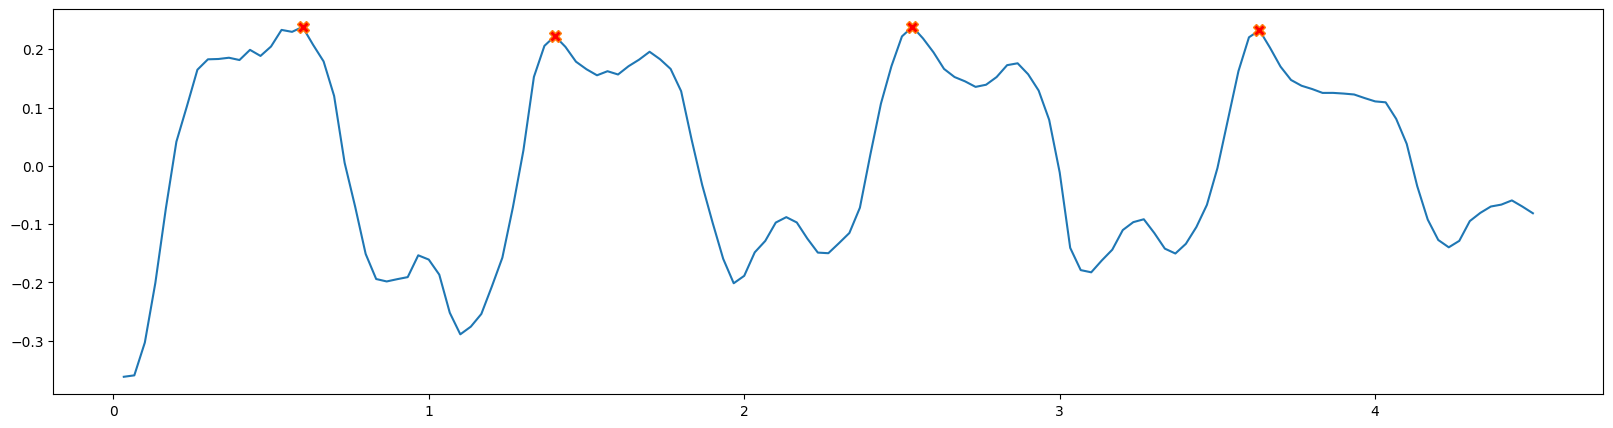

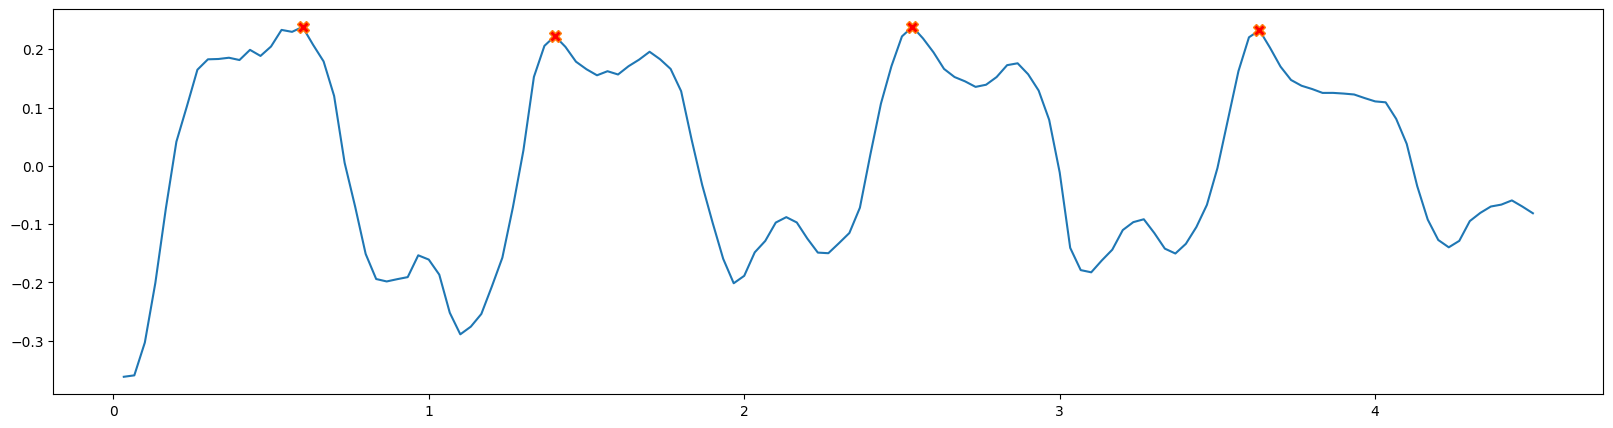

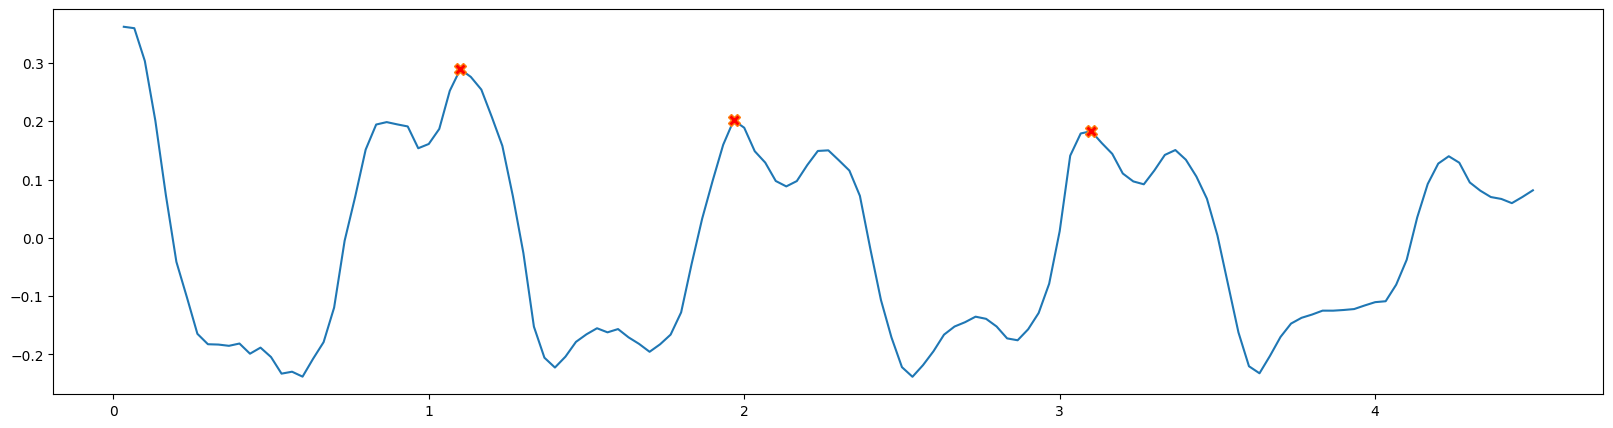

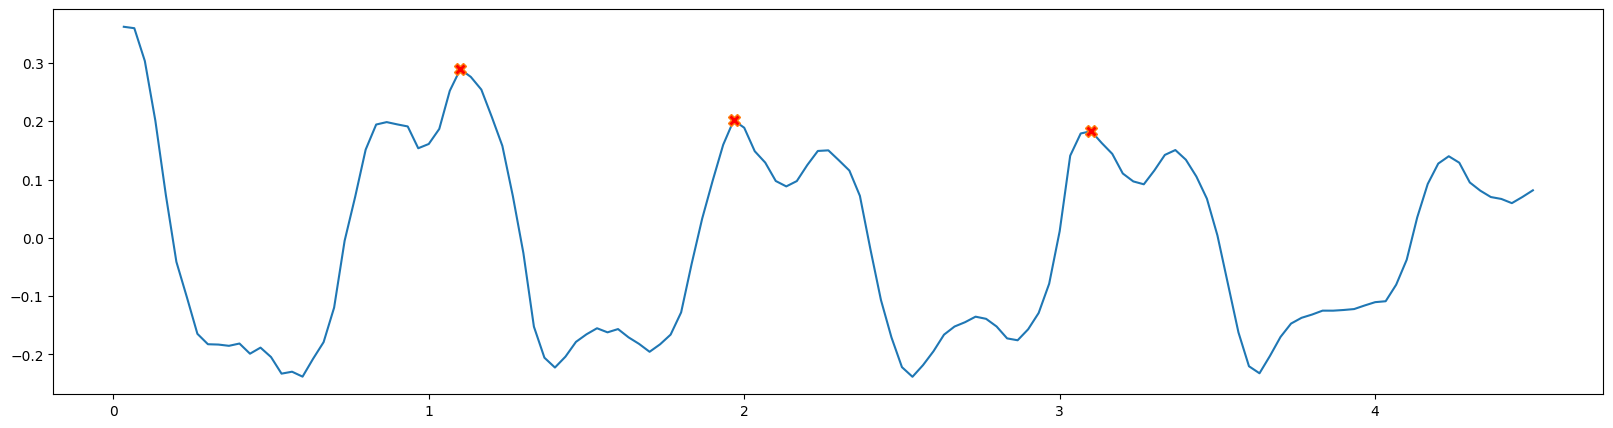

t1 0.6
t1 1.4
t1 2.533333333333333
results [1.3348166870863327, 1.3857702029564263, 1.3810282781162733]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.36887583023128884, 0.3789283616766874, 0.37741375892573403]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.19385456455329994, 0.19995898490688443, 0.2009214645351094]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.5510994422781678, 0.5547639898391836, 0.5494984752971401]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.5355173137655532, 0.5355016253429555, 0.5351558591963652]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.44674895605350345, 0.4553745371651003, 0.4548802218694188]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.4756330349615922, 0.4741304153137542, 0.4868594953413742]
t1 0.6
t1 1.4
t1 2.533333333333333
results [1.098157124713468, 1.1244199792411147, 1.1270550049440615]
t1 0.6
t1 1.4
t1 2.533333333333333
results [1.1350757371195628, 1.1281299032906227, 1.1438578054720114]
t1 0.6
t1 1.4
t1 2.533333333333333
results [0.68491986380909

            t  count        po        sw       flr       fll       stl  \
0    0.033333    1.0  4.501071  0.087741 -0.390836  0.390836  0.982259   
1    0.066667    2.0  4.038171  0.088996 -0.388960  0.388960  1.077143   
2    0.100000    3.0  3.016064  0.086856 -0.363889  0.363889  0.900046   
3    0.133333    4.0  2.563334  0.088130 -0.317556  0.317556  0.928372   
4    0.166667    5.0  0.918885  0.088853 -0.179187  0.179187  0.682826   
..        ...    ...       ...       ...       ...       ...       ...   
127  4.266667  128.0  6.535872  0.104745 -0.050583  0.050583  0.390037   
128  4.300000  129.0  5.586677  0.103312 -0.066672  0.066672  0.513310   
129  4.333333  130.0  5.495518  0.102648 -0.091486  0.091486  0.421987   
130  4.366667  131.0  5.427754  0.102699 -0.118306  0.118306  0.408078   
131  4.400000  132.0  4.518193  0.101596 -0.112665  0.112665  0.309384   

        right      left  
0    0.541033  0.460387  
1    0.541473  0.460848  
2    0.542187  0.462762  
3    0.

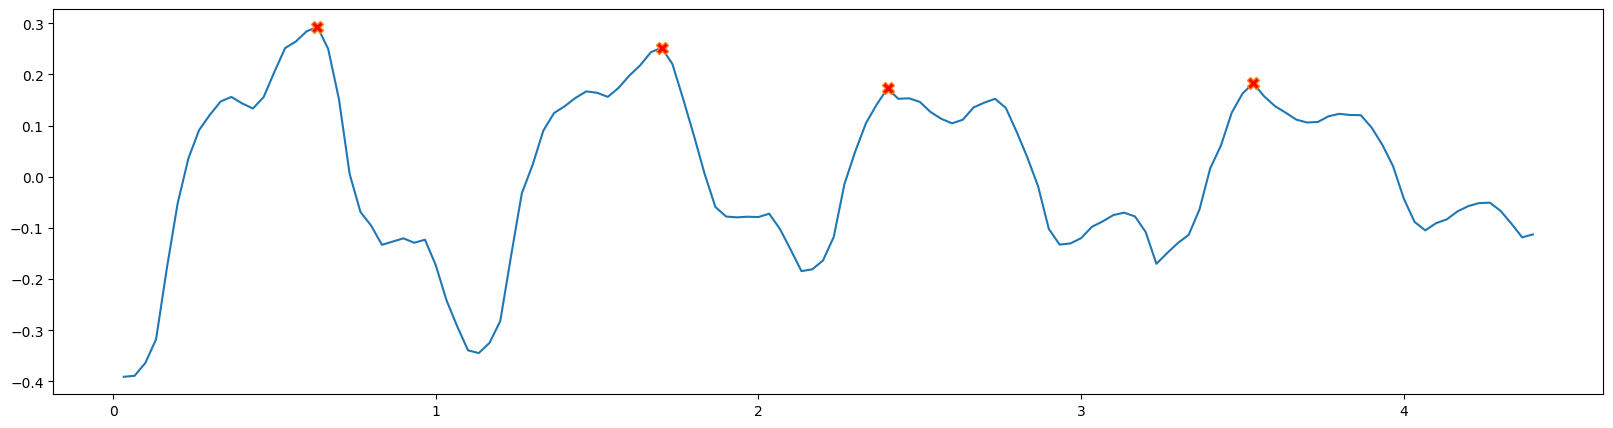

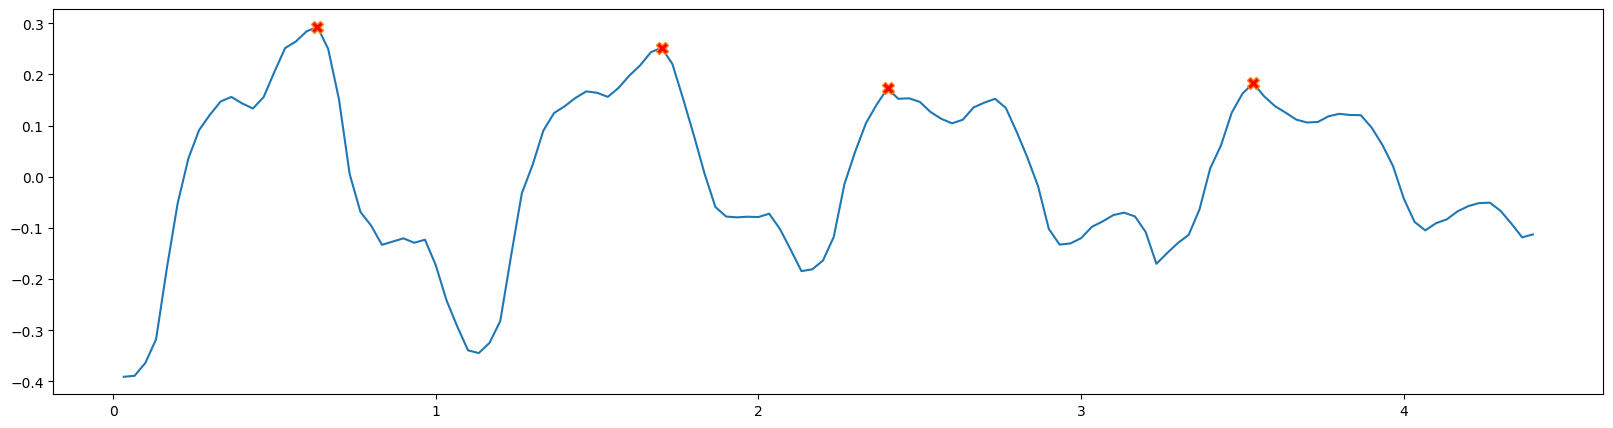

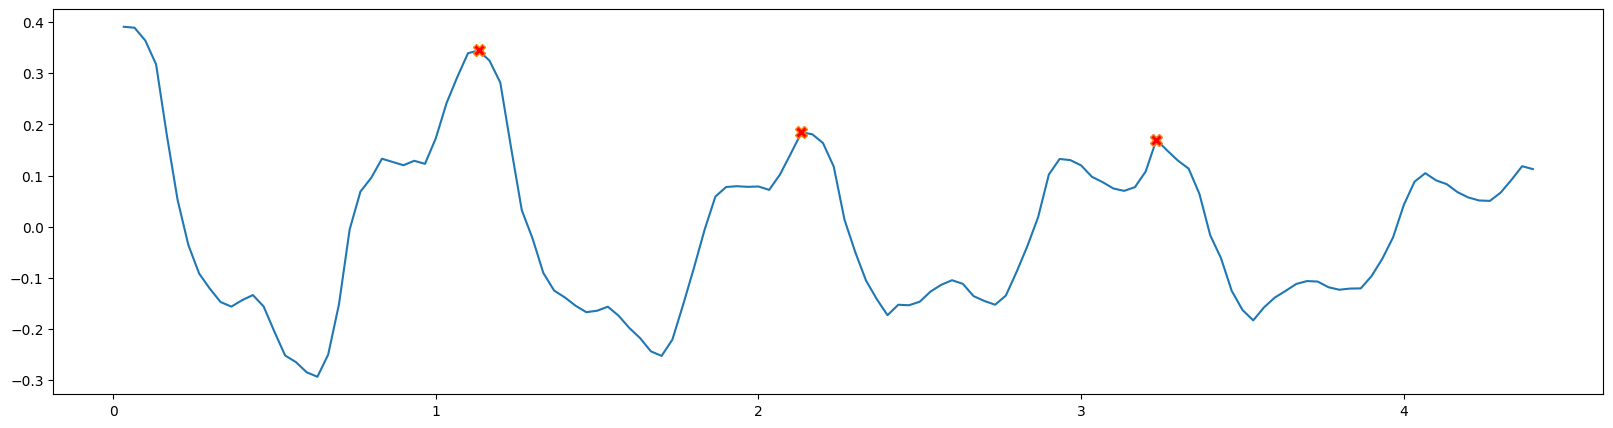

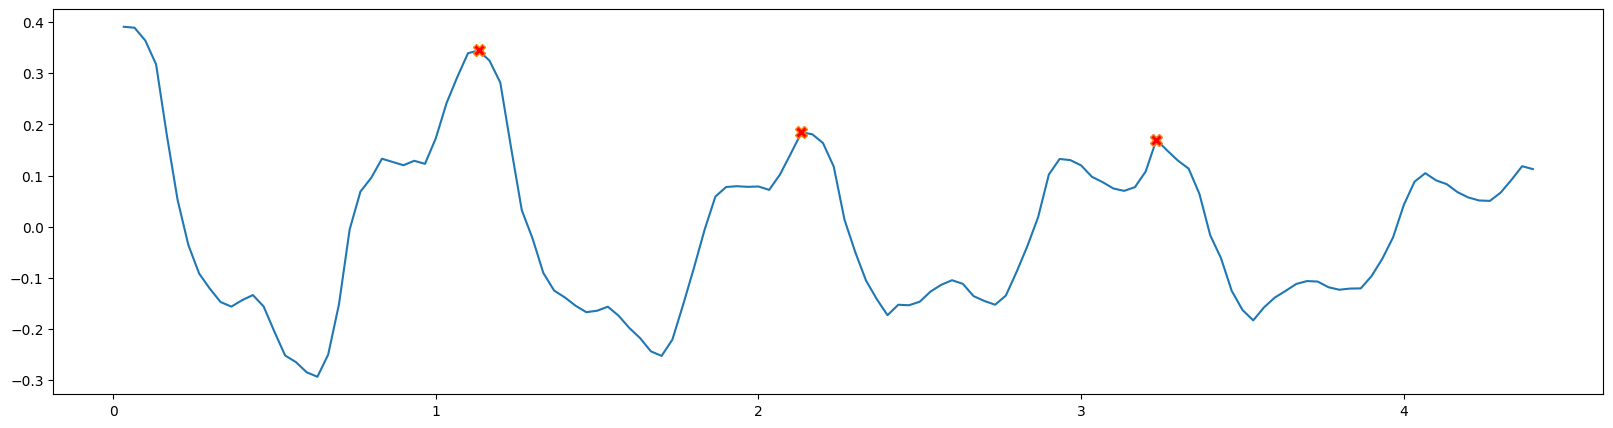

t1 0.6333333333333333
t1 1.7
t1 2.4
results [1.4830469119187824, 1.477271742903361, 1.4684405495325419]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.3654164625961782, 0.3655220116715419, 0.35961180548281746]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.19329364320381323, 0.19439493247216266, 0.1928469016400358]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.5855562850944822, 0.5899742214303108, 0.583506256386134]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.5605183319470637, 0.5657877831388862, 0.557036680106484]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.5004784073106148, 0.5094605080114379, 0.5054115330697774]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.4848765729962698, 0.4913710358508515, 0.45994212954845526]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [1.2031281026870126, 1.2290860548244067, 1.2227109883027274]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [1.1738747706839157, 1.1930360481415507, 1.1465878169053907]
t1 0.6333333333333333
t1 1.7
t1 2.4
results [0.7198045

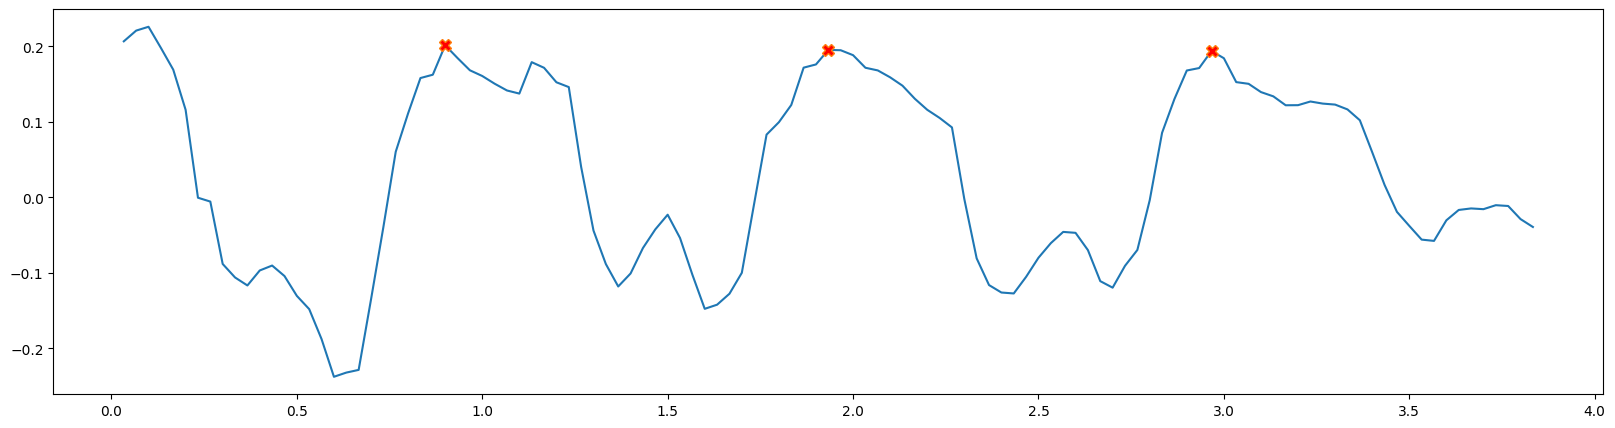

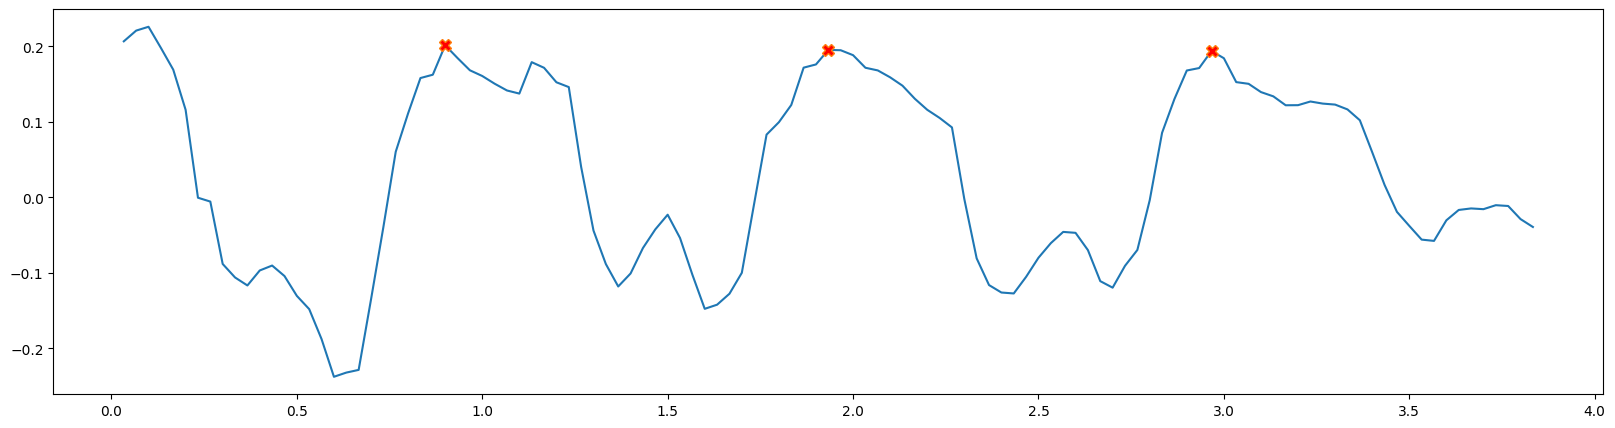

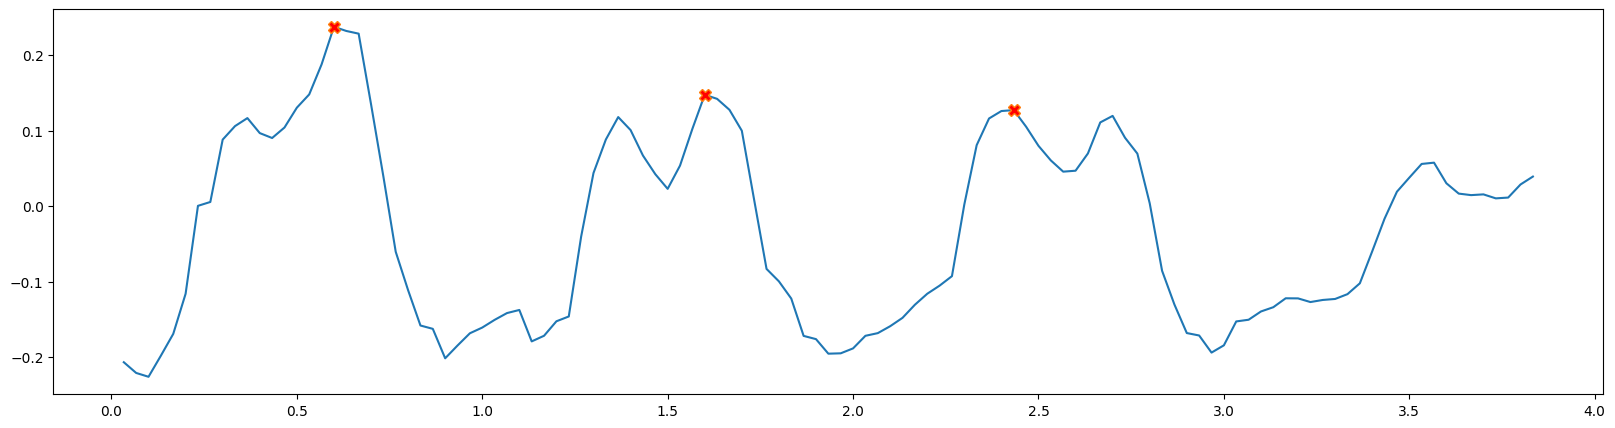

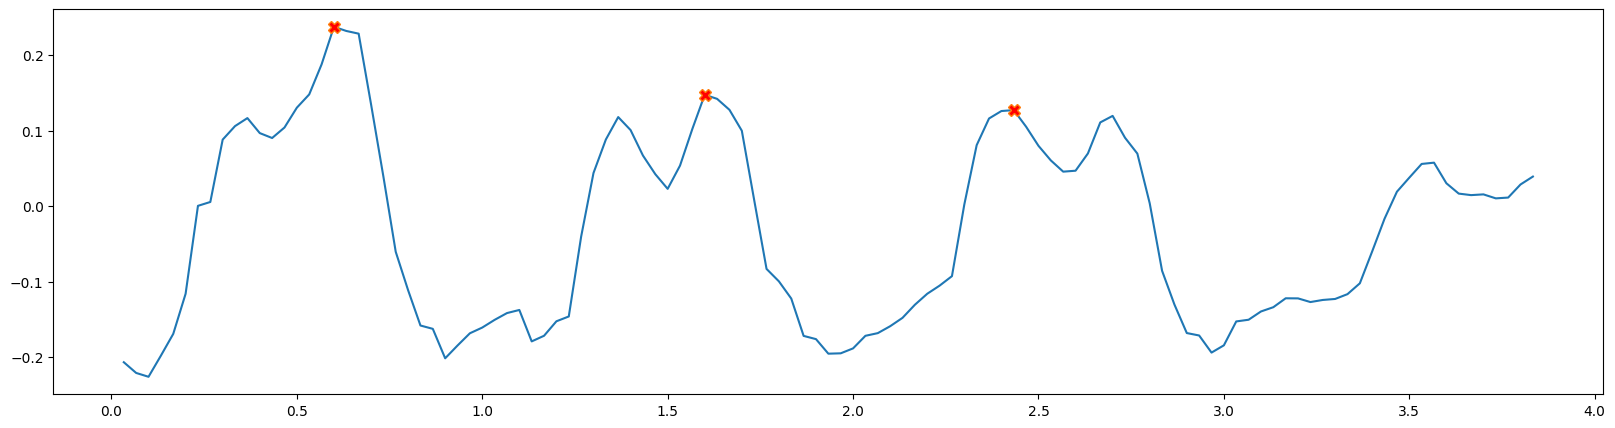

t1 0.9
t1 1.9333333333333333
results [1.3229684875734136, 1.3318739297123252]
t1 0.9
t1 1.9333333333333333
results [0.40321454988338257, 0.40749703252423686]
t1 0.9
t1 1.9333333333333333
results [0.2103726277520871, 0.20836623865006199]
t1 0.9
t1 1.9333333333333333
results [0.5345004584058279, 0.5355010087590136]
t1 0.9
t1 1.9333333333333333
results [0.5225334546465104, 0.5144138598712523]
t1 0.9
t1 1.9333333333333333
results [0.4058836032269031, 0.40476762963911245]
t1 0.9
t1 1.9333333333333333
results [0.4343155025735006, 0.46610660004591736]
t1 0.9
t1 1.9333333333333333
results [1.046203608453947, 1.044035332963936]
t1 0.9
t1 1.9333333333333333
results [1.0834896056420127, 1.1057177083545067]
t1 0.9
t1 1.9333333333333333
results [0.6010526383377959, 0.6092844364590093]
t1 0.9
t1 1.9333333333333333
results [0.6339345600909042, 0.6380245475673488]
t1 0.9
t1 1.9333333333333333
results [0.6890339274825092, 0.6938493821449765]
t1 0.9
t1 1.9333333333333333
results [0.6890339274825092, 0.6

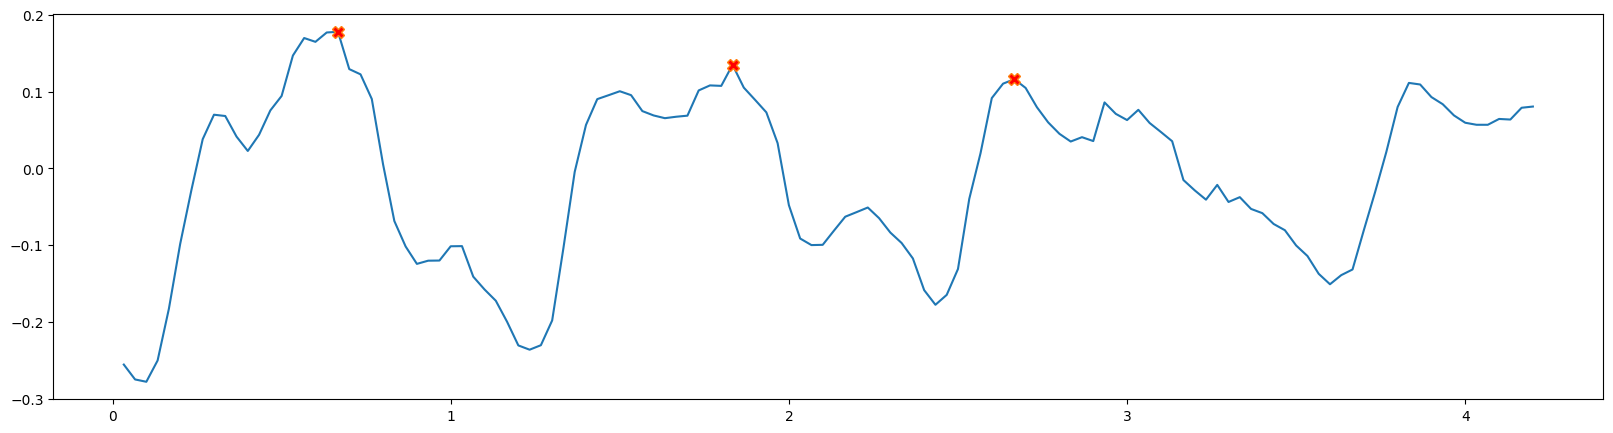

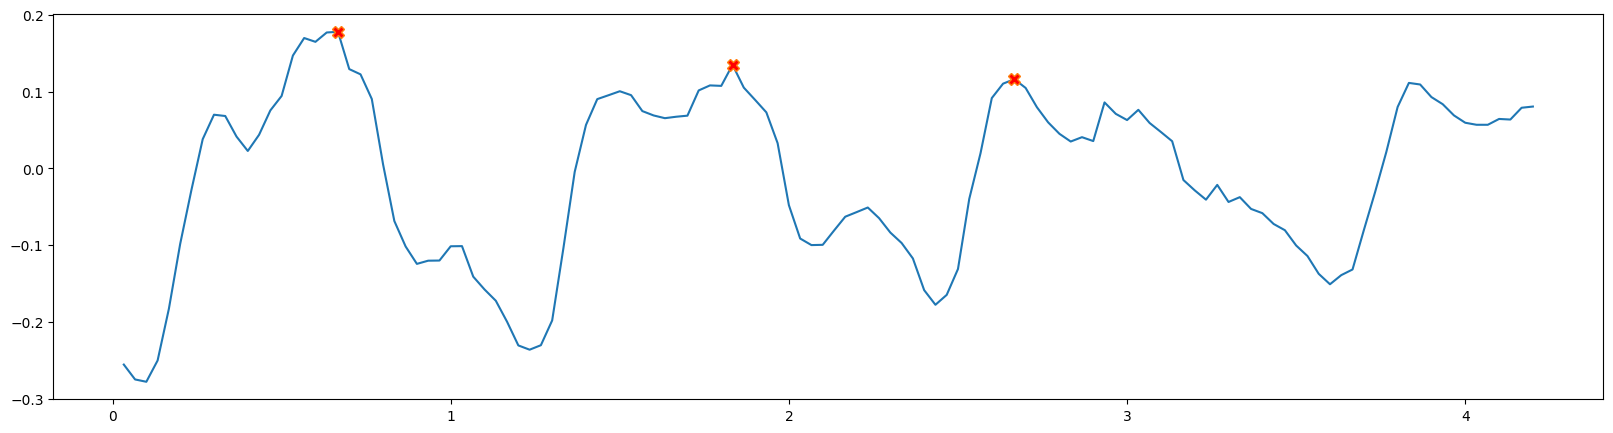

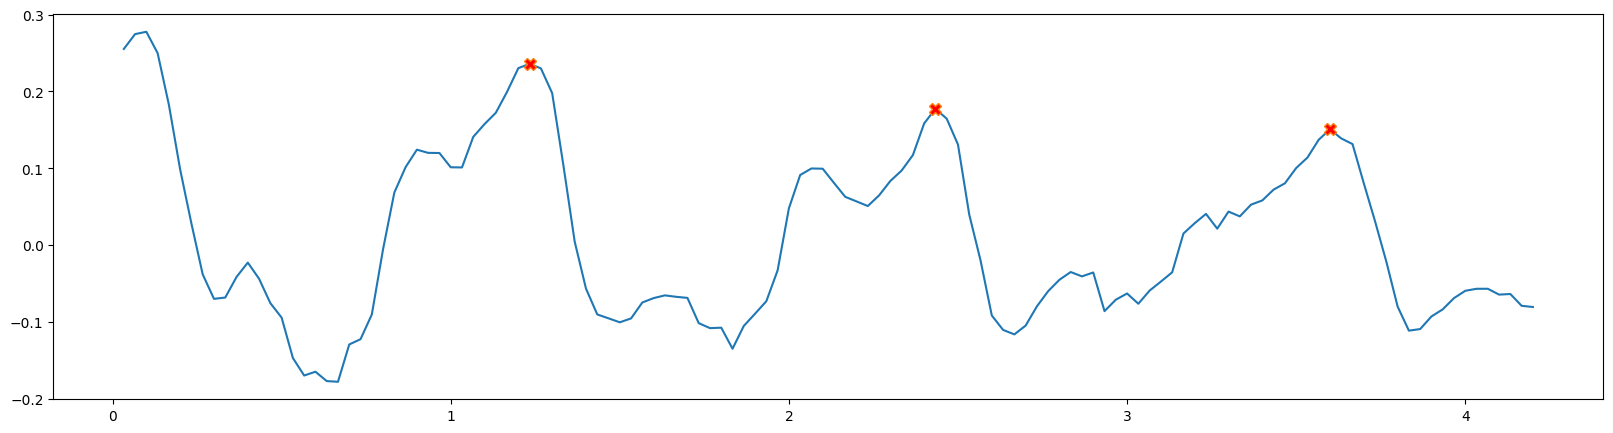

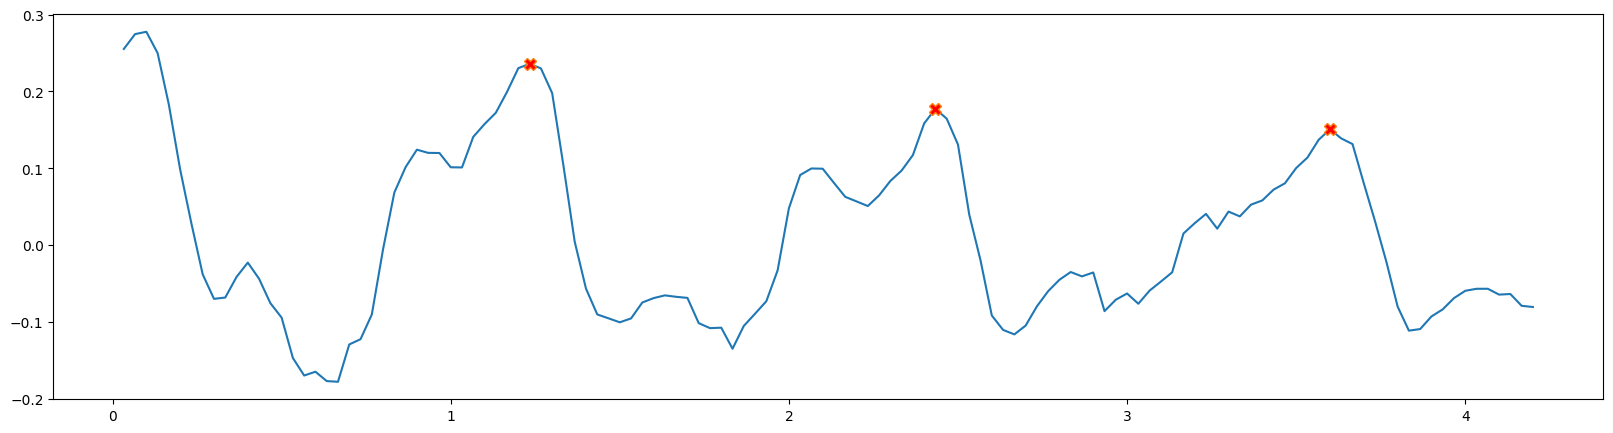

t1 0.6666666666666666
t1 1.8333333333333333
results [1.413773794867999, 1.3986407021471954]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.33295116435293104, 0.33282584409165017]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.1887235946988429, 0.1922739517679489]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.5323825204493949, 0.5247124757712854]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.5423278845472826, 0.528517934026332]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.44340848763494617, 0.43405481253328976]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.45539536443734197, 0.48398516394092356]
t1 0.6666666666666666
t1 1.8333333333333333
results [1.0810266797761343, 1.0721213137246612]
t1 0.6666666666666666
t1 1.8333333333333333
results [1.1333284326152333, 1.146274704501947]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.7143690871103195, 0.702574122547542]
t1 0.6666666666666666
t1 1.8333333333333333
results [0.6989426754365

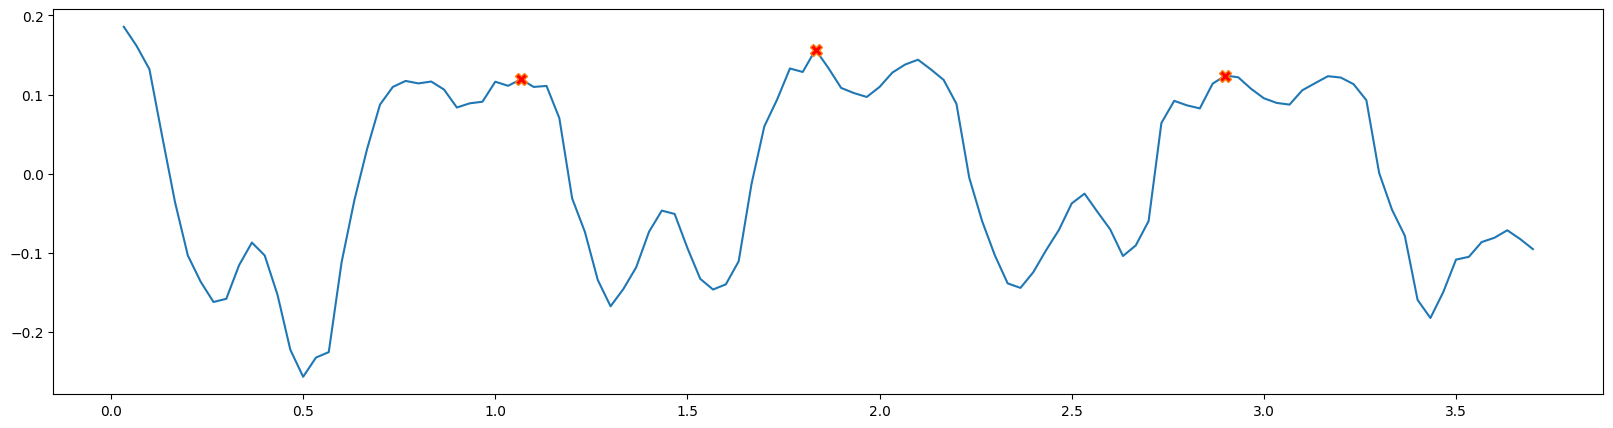

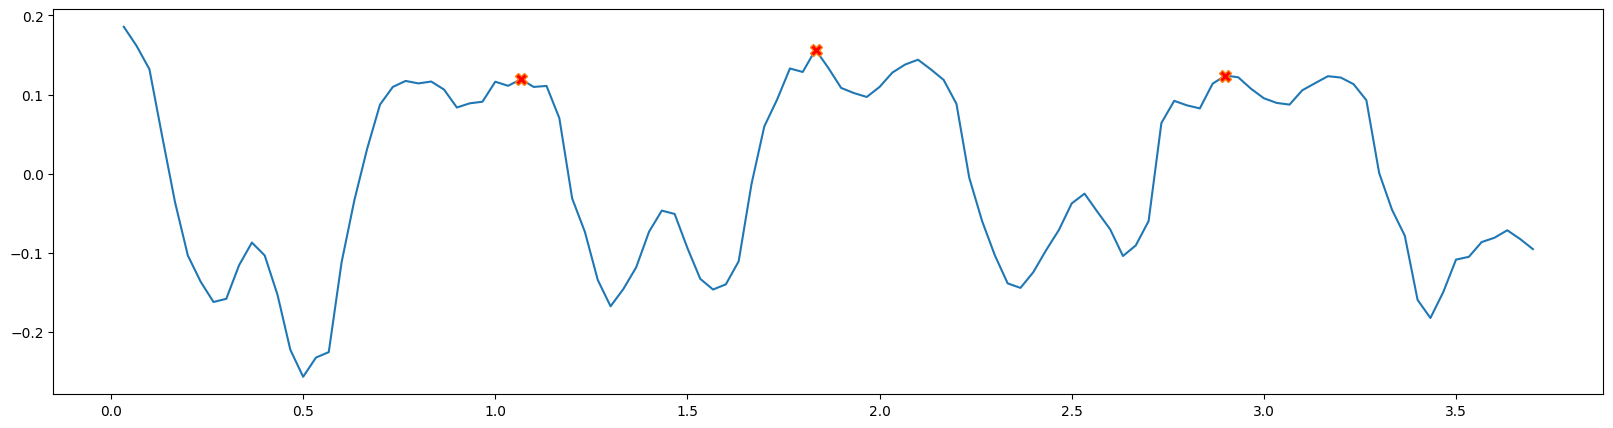

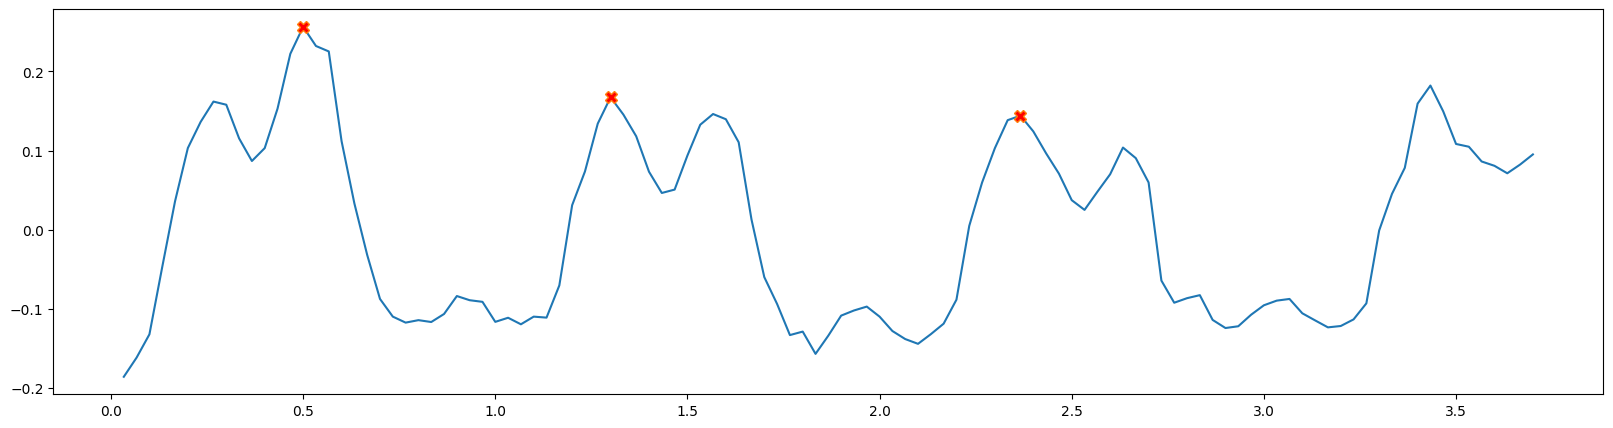

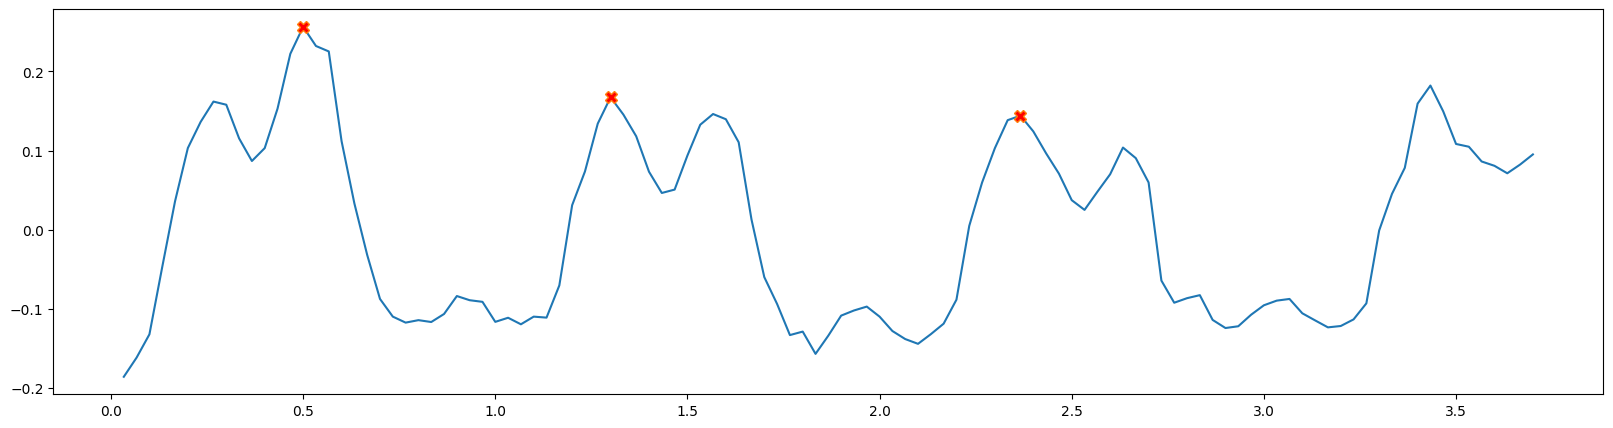

t1 1.0666666666666667
t1 1.8333333333333333
results [1.4020039479072295, 1.433468092904358]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.3640148821919063, 0.3604379502553295]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.19853924103460804, 0.19651871695468576]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.520392970305738, 0.5283137591006817]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.5253095374721439, 0.5232023894115203]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.48423467628913225, 0.5001359162902046]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.4924258936331294, 0.48599092050830406]
t1 1.0666666666666667
t1 1.8333333333333333
results [1.1221049266290521, 1.1556364408633297]
t1 1.0666666666666667
t1 1.8333333333333333
results [1.15522315524222, 1.1450305586968055]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.7023827656523647, 0.7103291862317574]
t1 1.0666666666666667
t1 1.8333333333333333
results [0.694455507219874

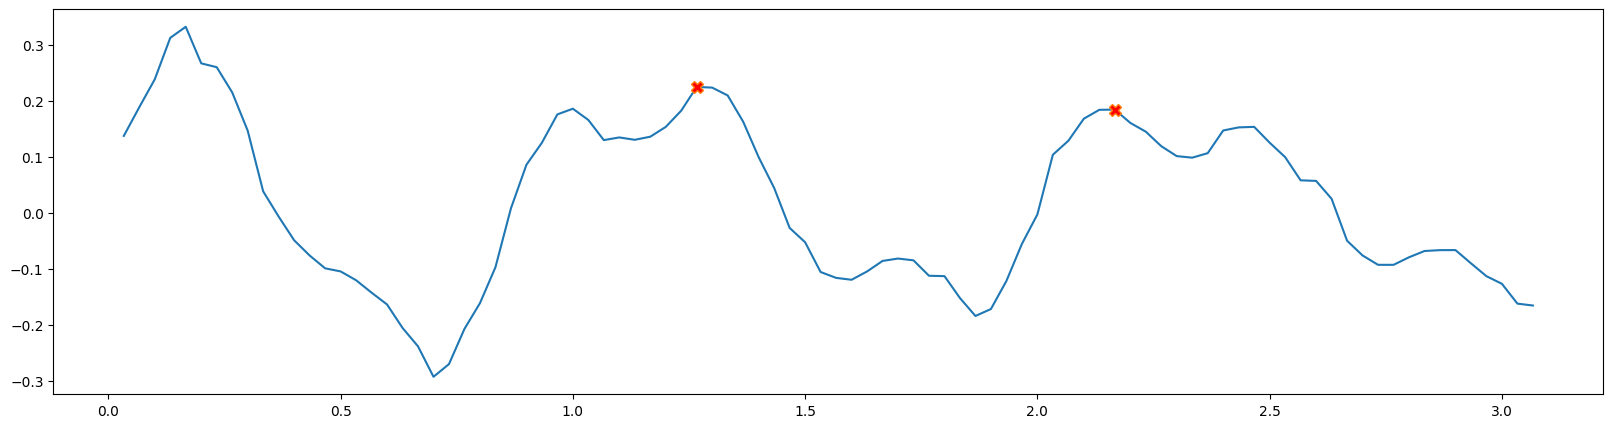

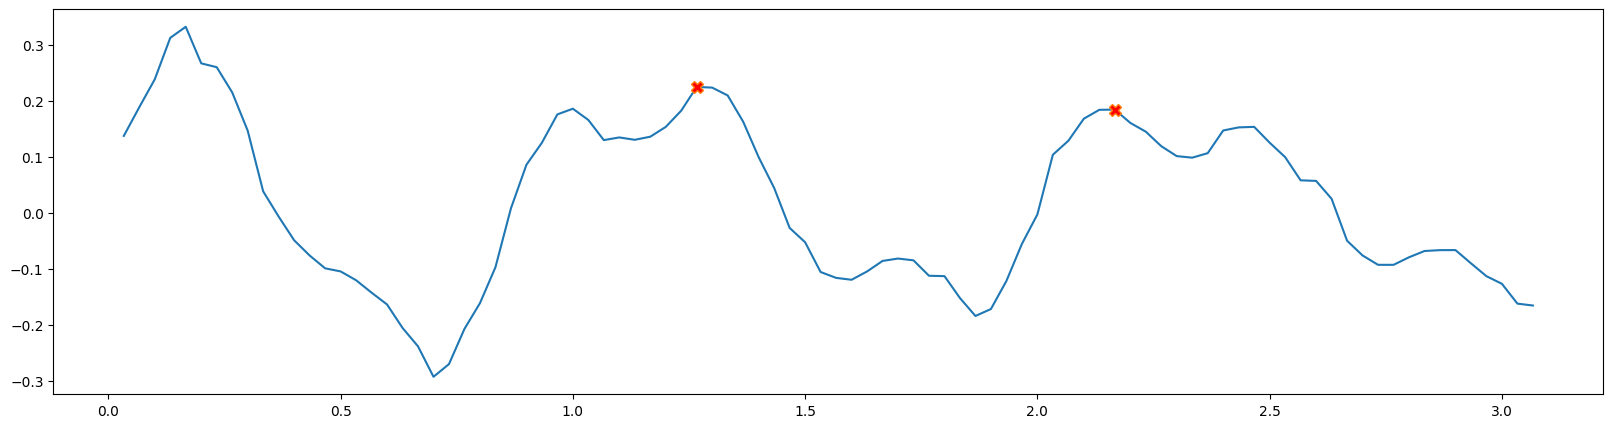

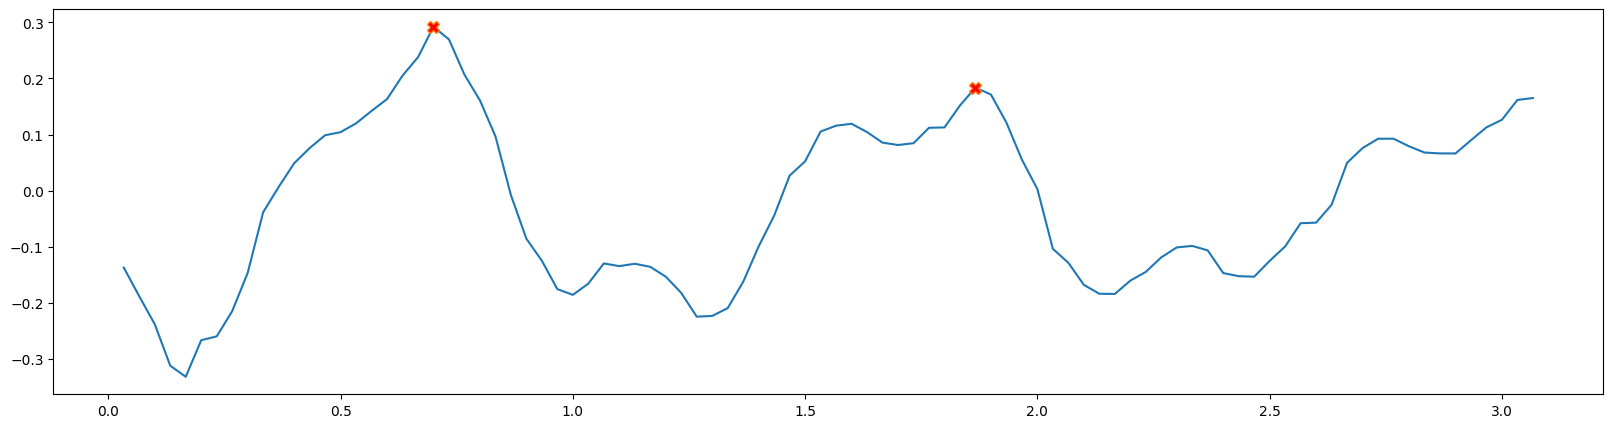

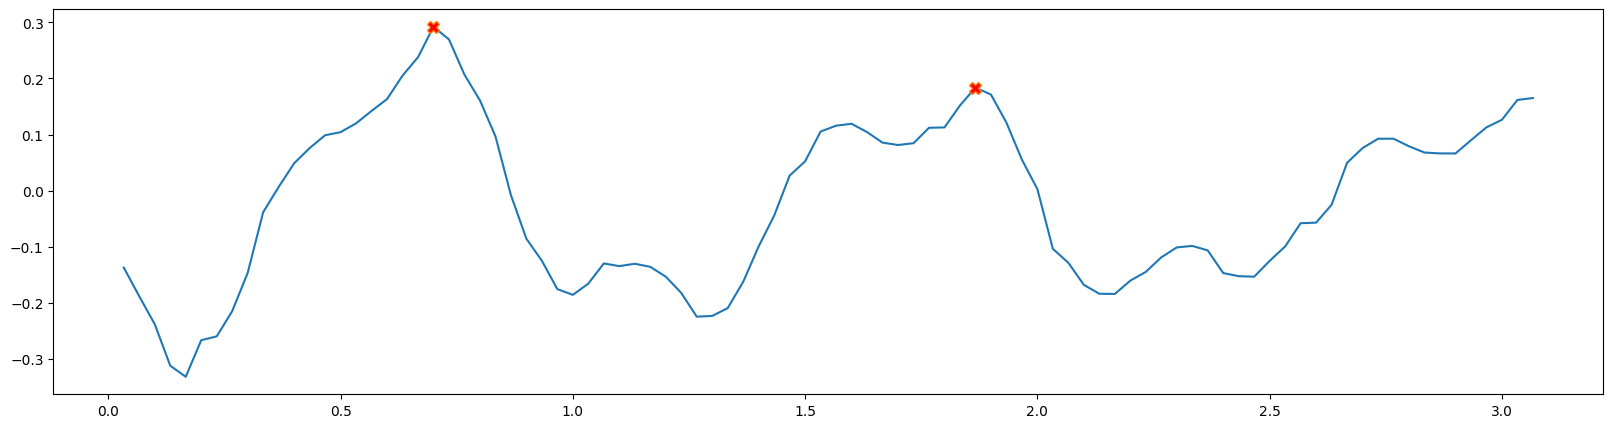

t1 1.2666666666666666
results [1.3183452842218863]
t1 1.2666666666666666
results [0.36592969316669083]
t1 1.2666666666666666
results [0.1924264208102619]
t1 1.2666666666666666
results [0.5469700359235525]
t1 1.2666666666666666
results [0.5133881663351865]
t1 1.2666666666666666
results [0.42603119657166627]
t1 1.2666666666666666
results [0.4556701289561223]
t1 1.2666666666666666
results [1.0834931486861368]
t1 1.2666666666666666
results [1.0939580035511576]
t1 1.2666666666666666
results [0.6337988352940748]
t1 1.2666666666666666
results [0.6310694276571878]
t1 1.2666666666666666
results [0.6872758565646991]
t1 1.2666666666666666
results [0.6872758565646991]
t1 1.2666666666666666
results [0.12439756831942574]
t1 1.2666666666666666
results [0.034019049256197344]
t1 1.2666666666666666
results [0.023833953251223984]
t1 1.2666666666666666
results [0.059434905695455245]
t1 1.2666666666666666
results [0.9772664877185652] 1.2666666666666666
t1 1.2666666666666666
results [0.9997640591284178] 1.2

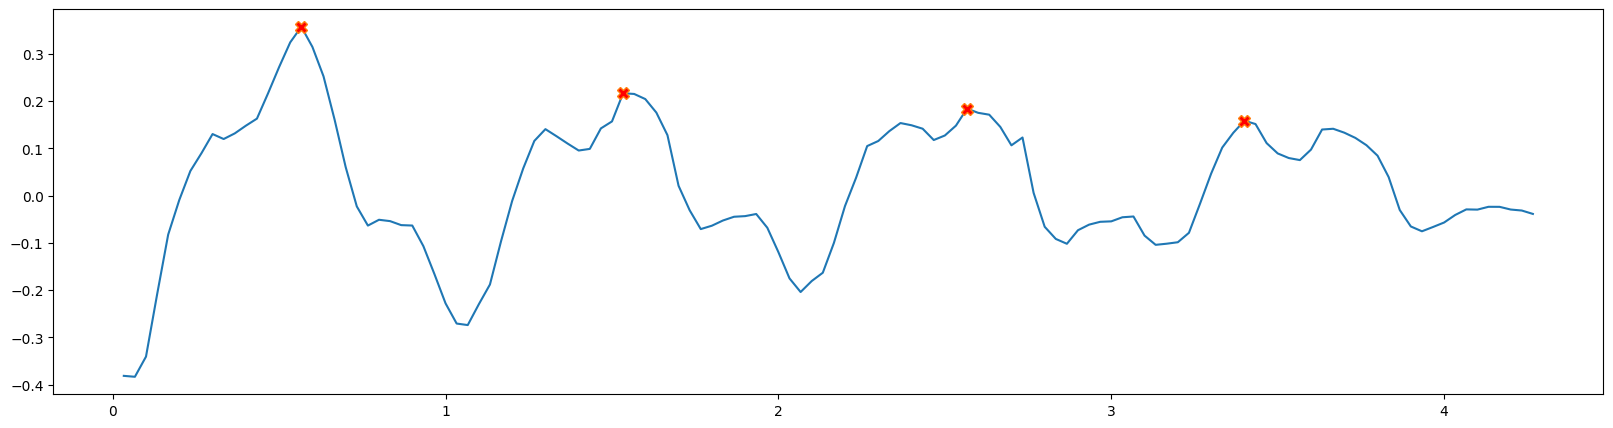

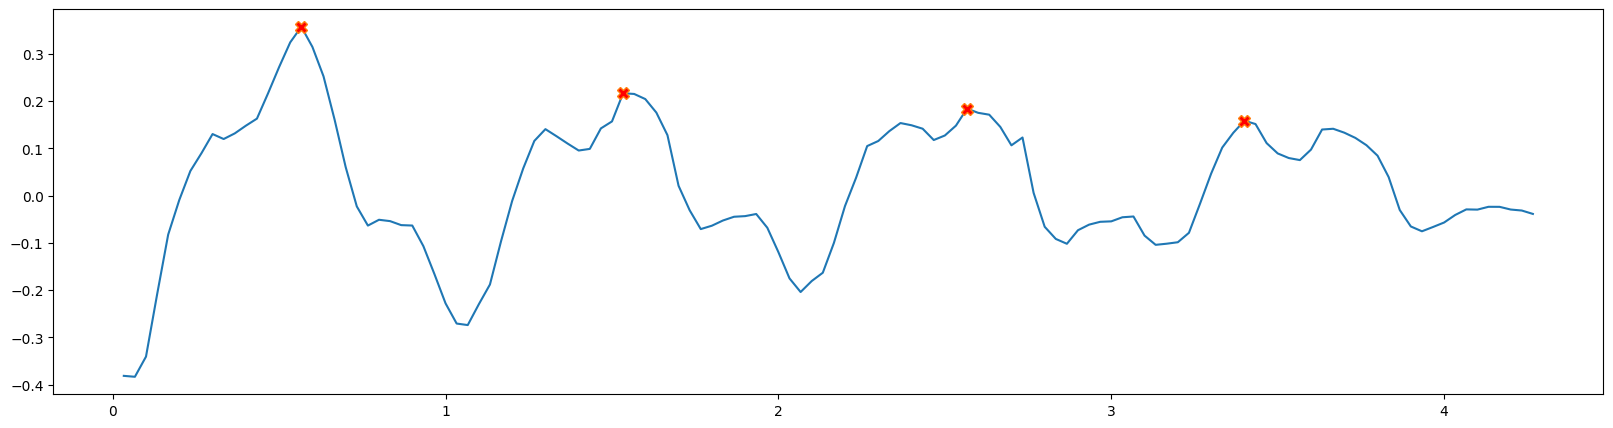

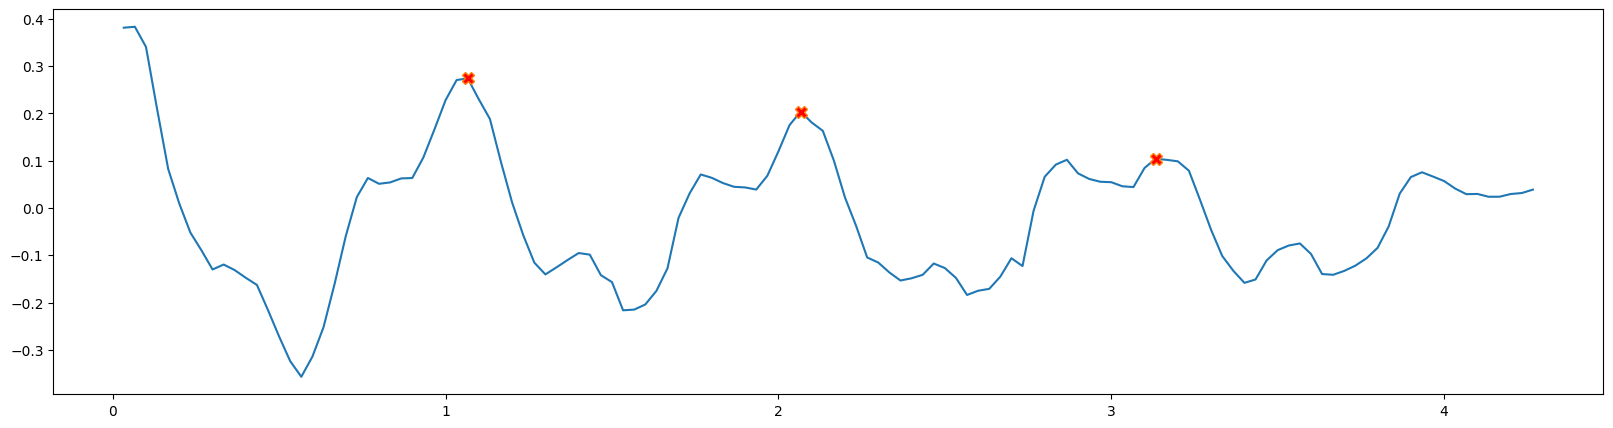

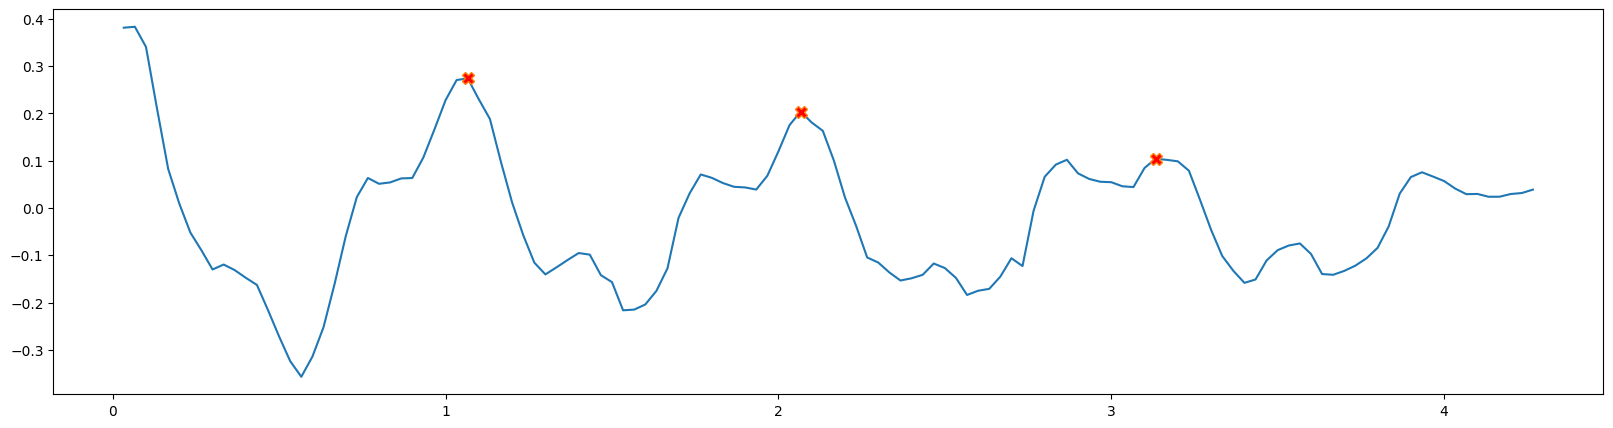

t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [1.4275127198907969, 1.4781583442903257, 1.4974065036209223]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.38337495815158285, 0.38506959101572596, 0.38605565223815536]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.19582064694257237, 0.19745162728021853, 0.1976135947808602]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.5548204806559863, 0.5569757565334229, 0.554320165833555]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.5137254256276337, 0.5151845954724356, 0.5221489716978718]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.4280828739735458, 0.4444379592679167, 0.4282250968913569]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666666666667
results [0.46878968914320535, 0.47281282093906774, 0.47364924163530725]
t1 0.5666666666666667
t1 1.5333333333333334
t1 2.566666

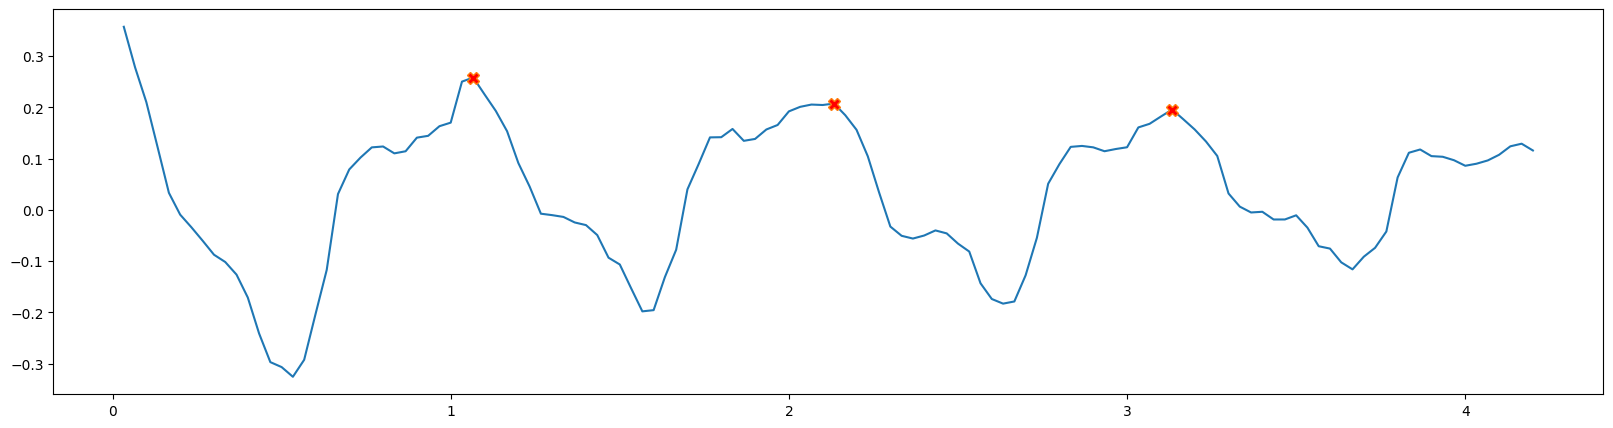

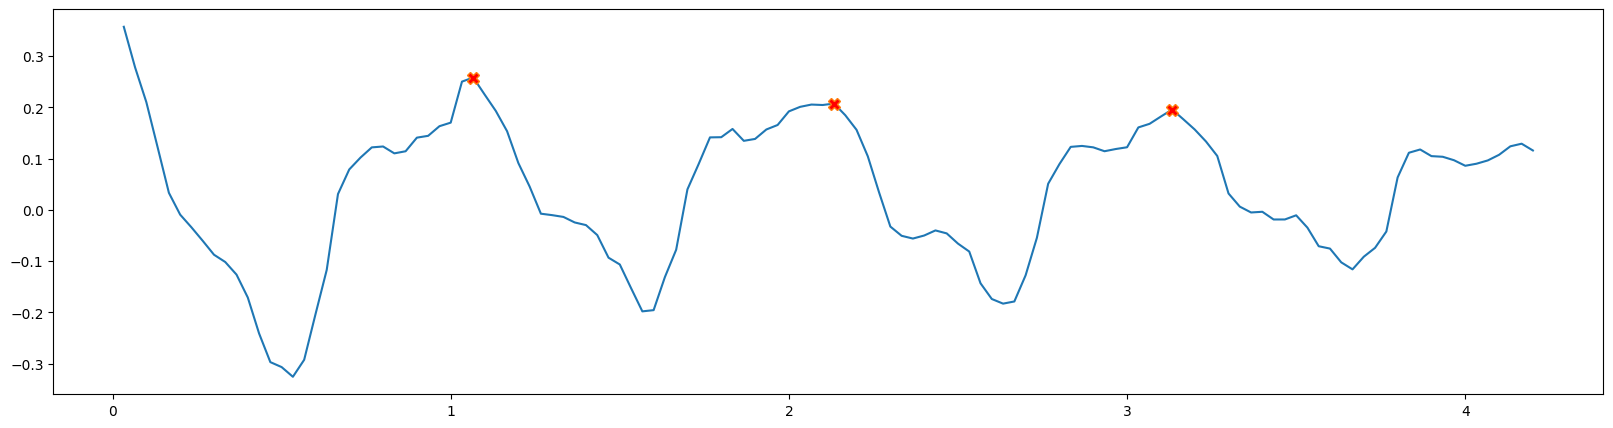

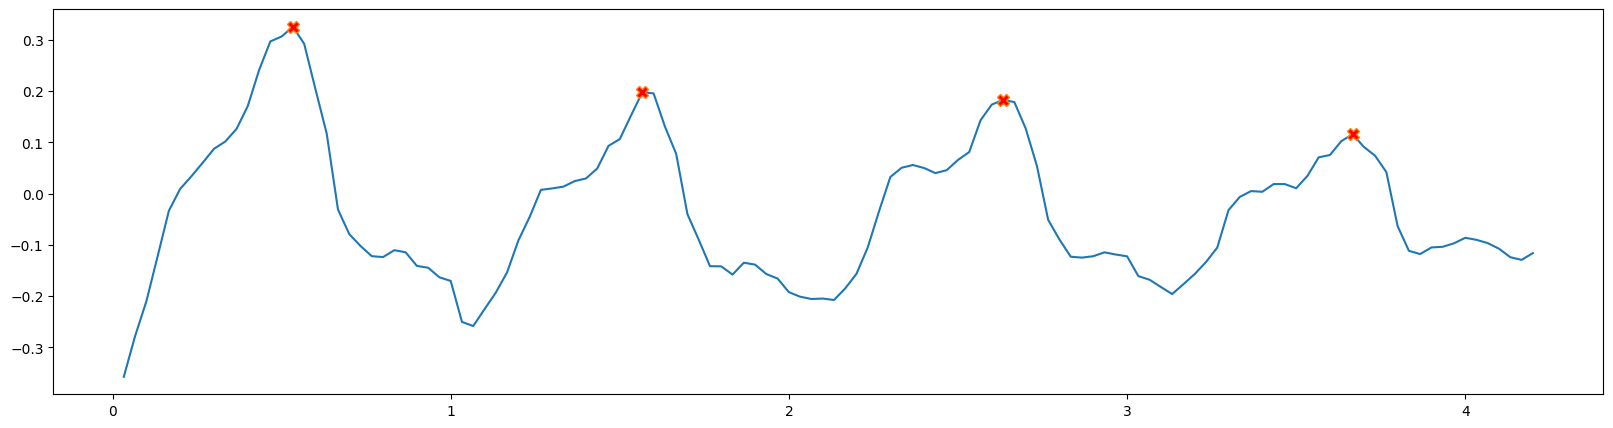

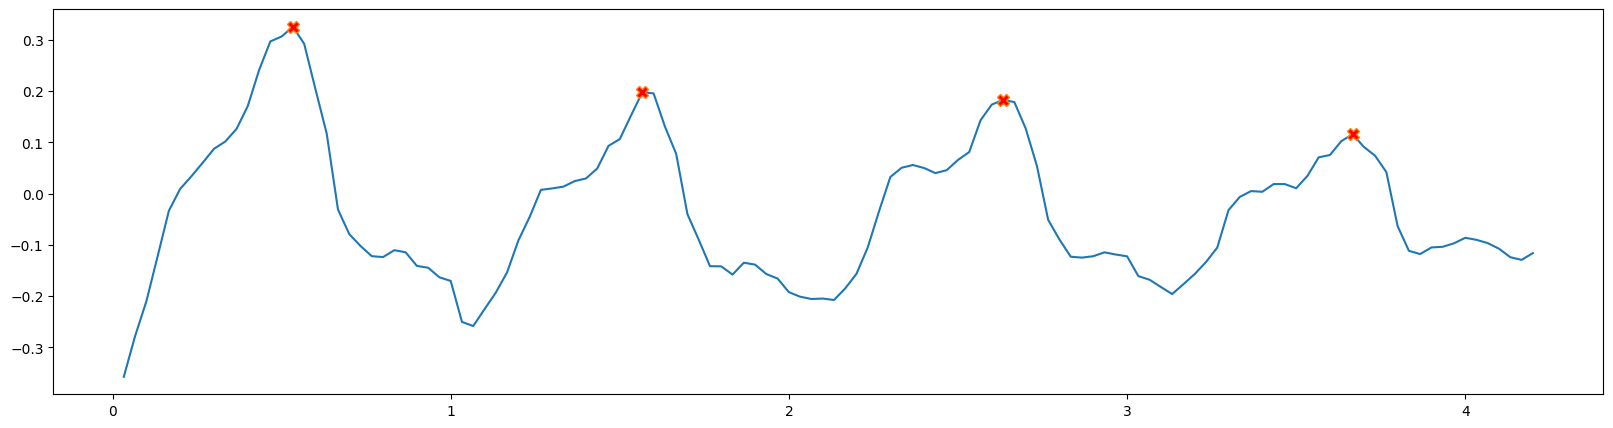

t1 1.0666666666666667
t1 2.1333333333333333
results [1.4952050118521127, 1.4833007149142892]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.36748986586113785, 0.3688387192924702]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.2077679214528019, 0.2107180530968882]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.5403222987210005, 0.5424686160090645]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.5408026156074357, 0.5403717669769115]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.4857298284688351, 0.48076404898402003]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.4871284606696678, 0.4947386175453841]
t1 1.0666666666666667
t1 2.1333333333333333
results [1.1394187823997313, 1.1406964912674413]
t1 1.0666666666666667
t1 2.1333333333333333
results [1.1648652363586953, 1.1685255368159078]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.7204705098086891, 0.7298149600396726]
t1 1.0666666666666667
t1 2.1333333333333333
results [0.7325934228944

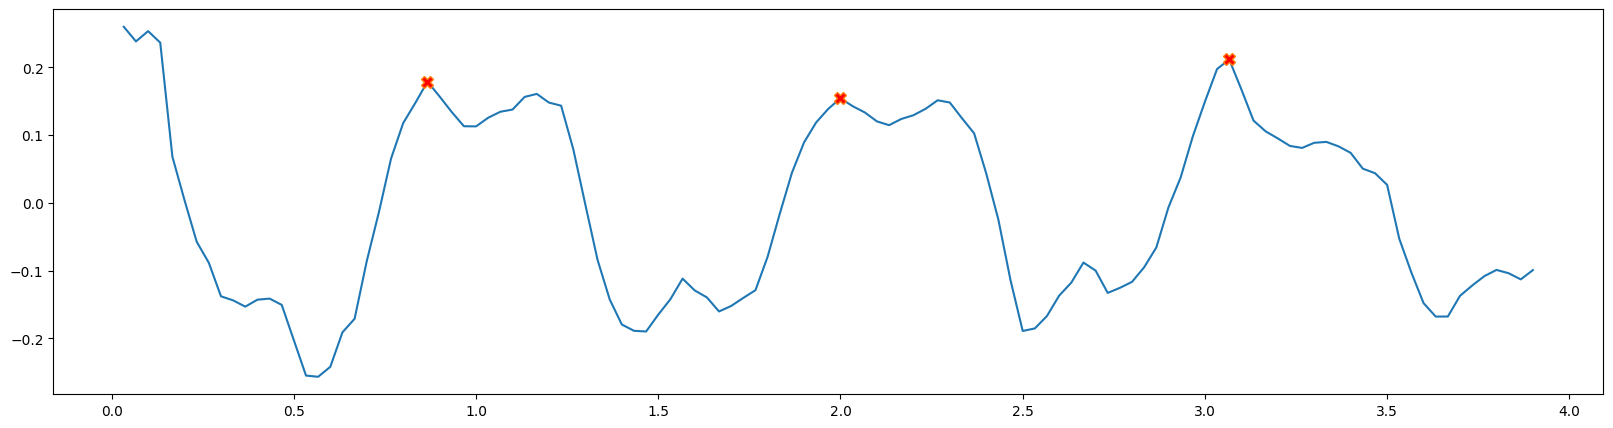

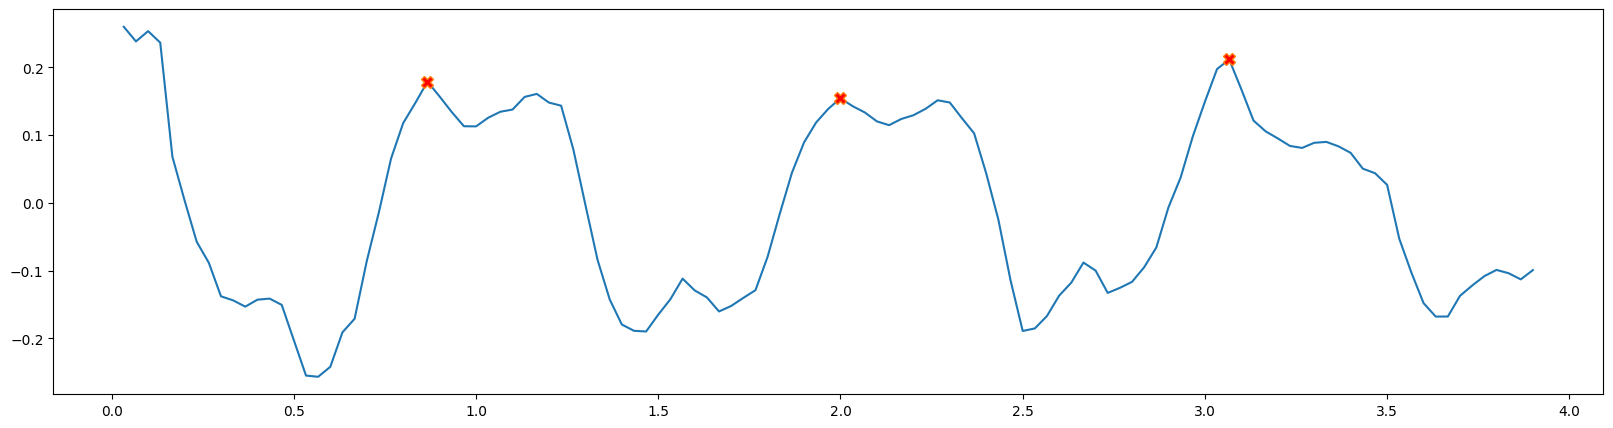

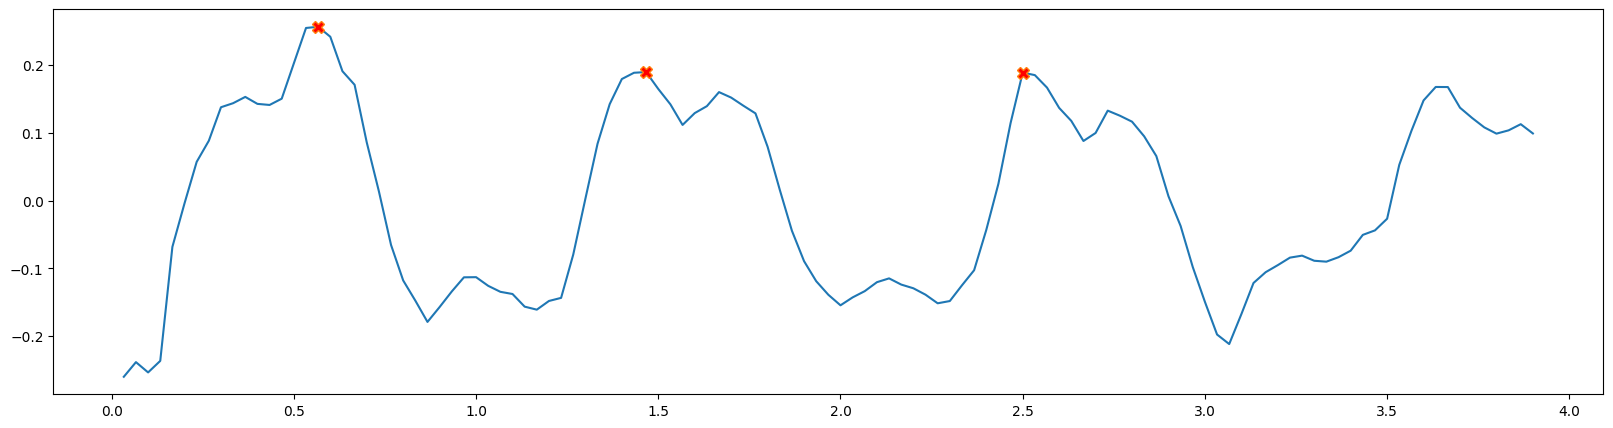

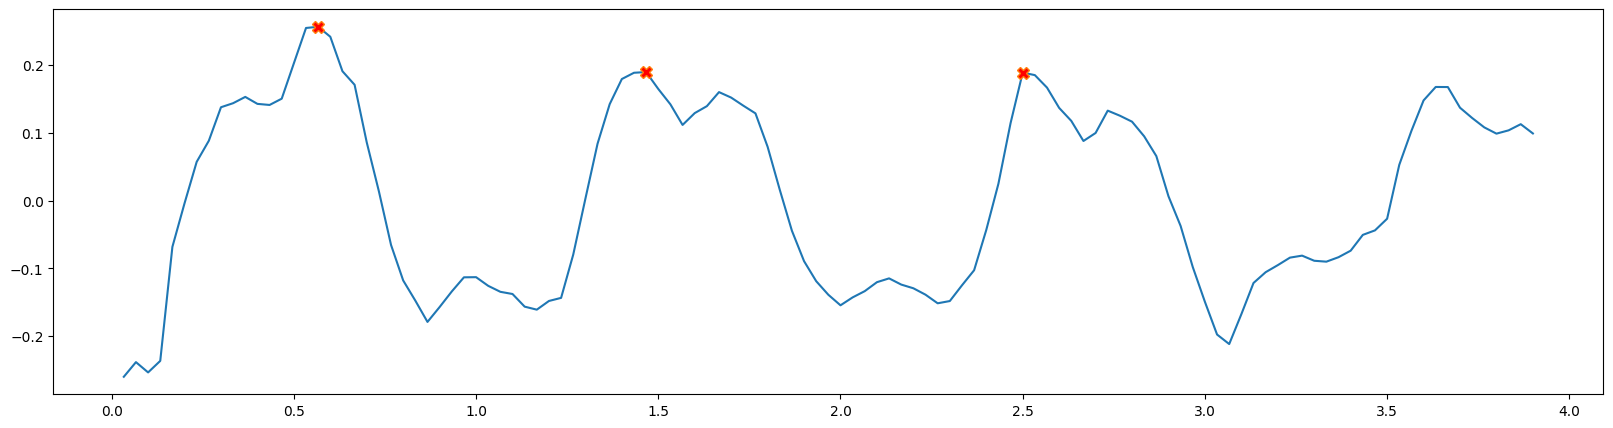

t1 0.8666666666666667
t1 2.0
results [1.3445147289433494, 1.3415806562784562]
t1 0.8666666666666667
t1 2.0
results [0.37069719770060744, 0.37803765768237996]
t1 0.8666666666666667
t1 2.0
results [0.2002391641894919, 0.20119049397081165]
t1 0.8666666666666667
t1 2.0
results [0.5489626717031346, 0.5560220214070561]
t1 0.8666666666666667
t1 2.0
results [0.5409989012991052, 0.556057118201369]
t1 0.8666666666666667
t1 2.0
results [0.45546798845259223, 0.45910898863616983]
t1 0.8666666666666667
t1 2.0
results [0.46671794772664815, 0.4610489532780096]
t1 0.8666666666666667
t1 2.0
results [1.1232540167078349, 1.1390852882078342]
t1 0.8666666666666667
t1 2.0
results [1.1197759810201573, 1.1300052104205507]
t1 0.8666666666666667
t1 2.0
results [0.6402228647851462, 0.6496694522619769]
t1 0.8666666666666667
t1 2.0
results [0.6313458585039293, 0.6352526228263322]
t1 0.8666666666666667
t1 2.0
results [0.7131688704394202, 0.7063280334521239]
t1 0.8666666666666667
t1 2.0
results [0.7131688704394202, 0

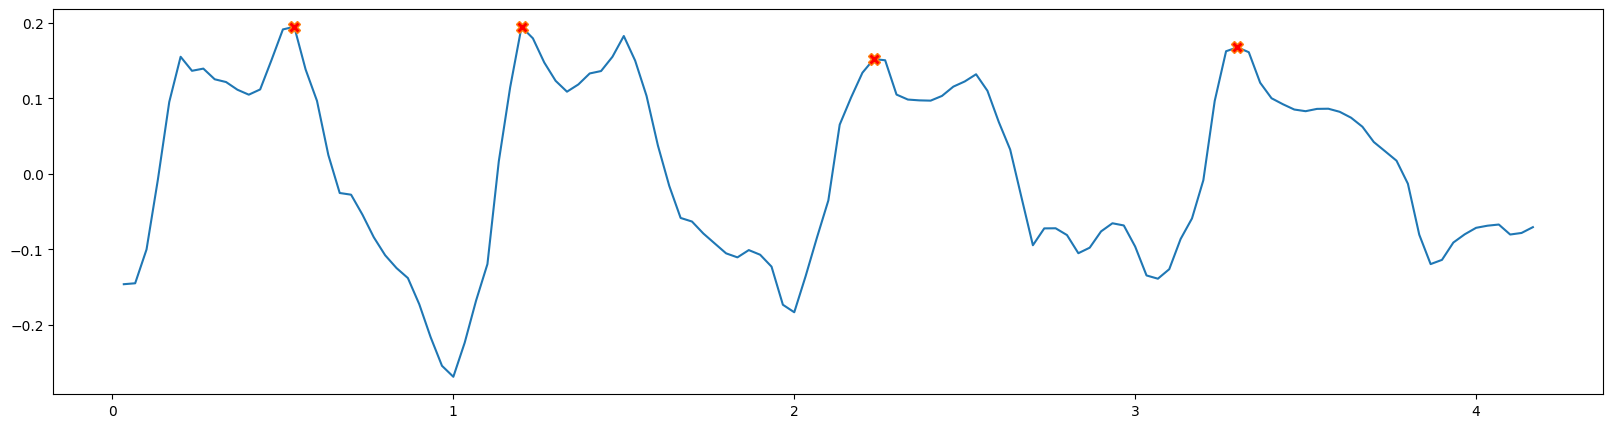

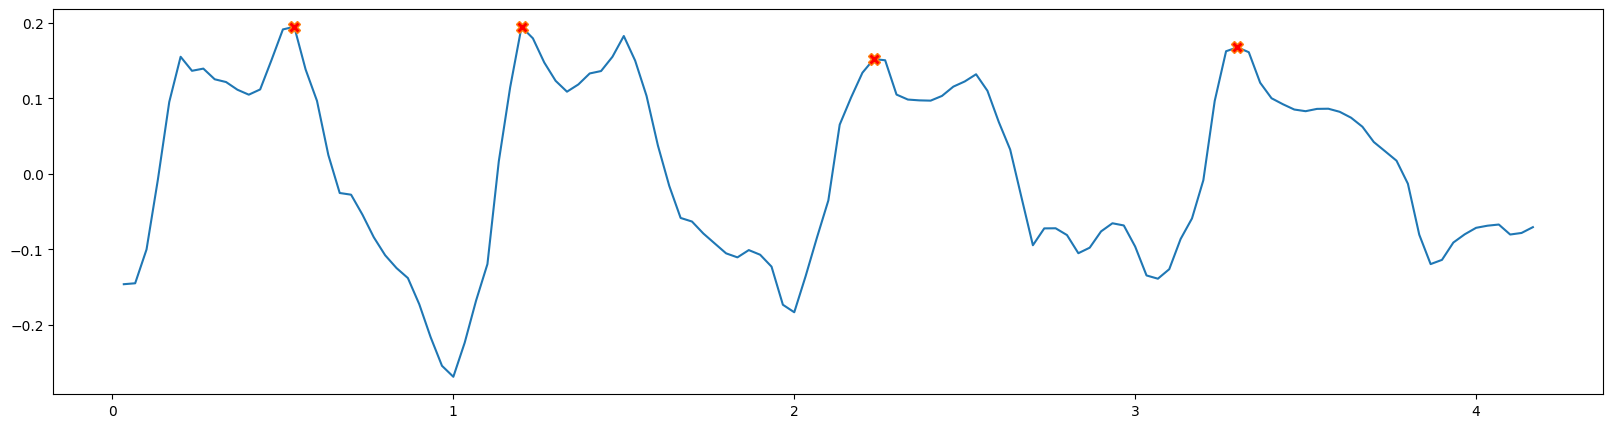

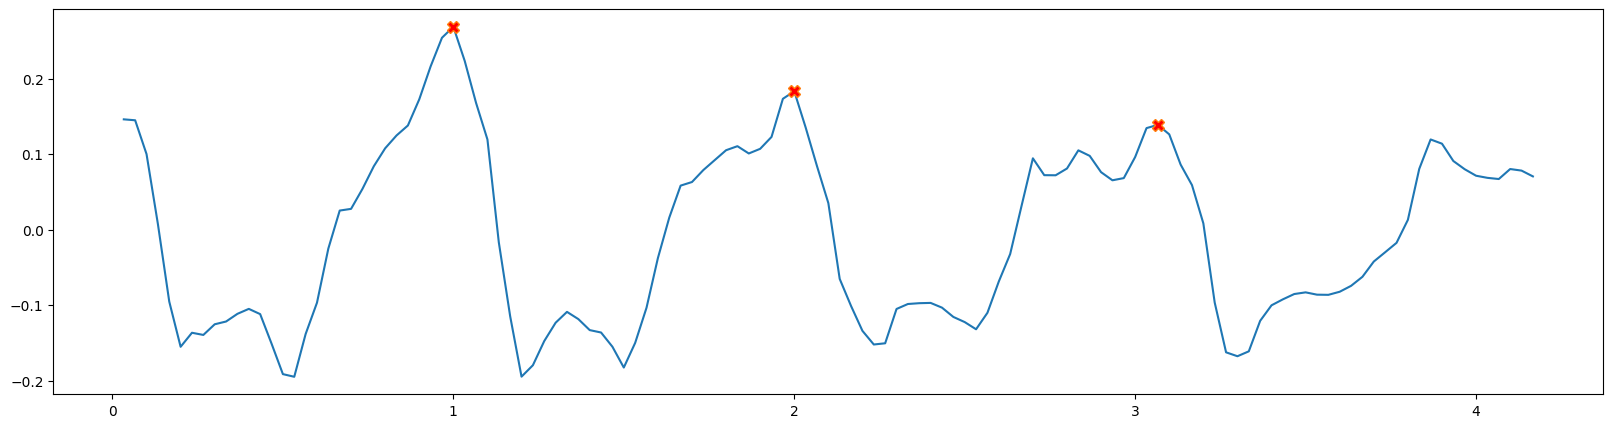

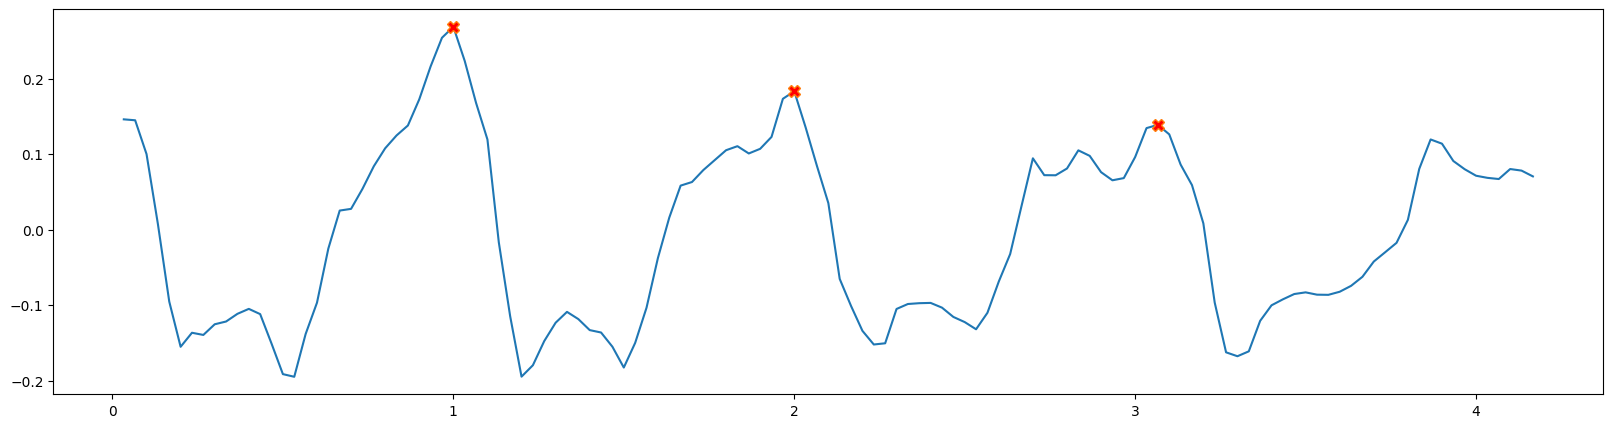

t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [1.4688032245356017, 1.5126687379859702, 1.5037413539053026]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.34164776411181147, 0.34735463535340233, 0.3572740894320704]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.19645305251020226, 0.18760234170933143, 0.1862740094839525]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.5665314499726735, 0.5688404642343687, 0.5810551460174253]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.5783350633623632, 0.5682411751868379, 0.5631737599272899]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.524709102031736, 0.5055758834282135, 0.5091054569550432]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [0.5236207760454686, 0.483419499424786, 0.4554834622629172]
t1 0.5333333333333333
t1 1.2
t1 2.2333333333333334
results [1.2306326764925508, 1.2151640073667955, 1.2333244233228693]
t1 0.5333333333333333
t1 1.2
t1 2.2333

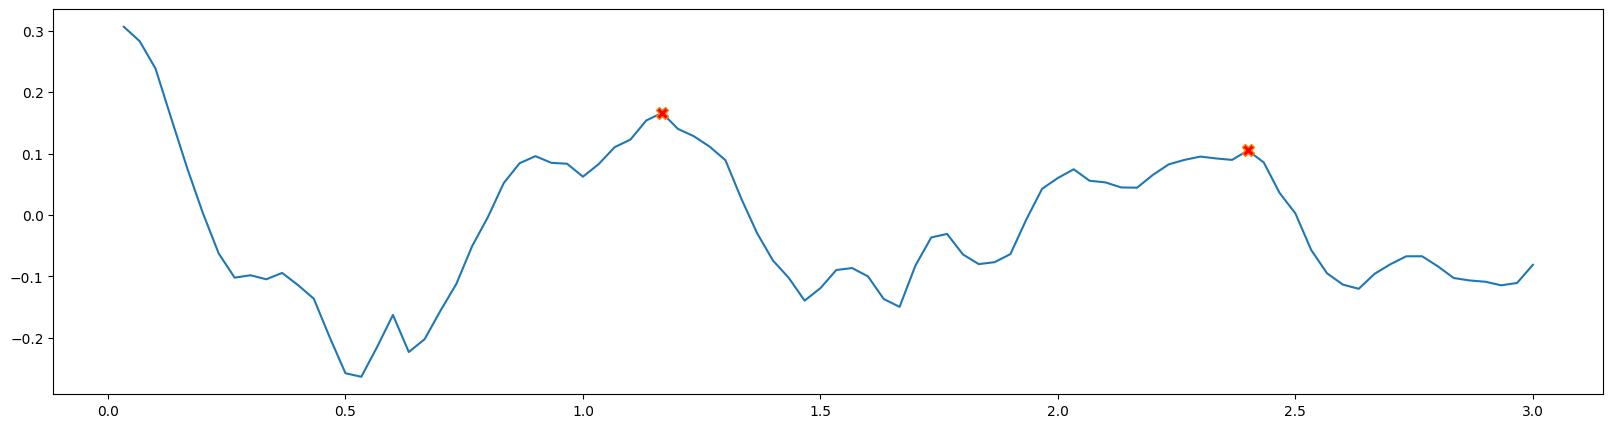

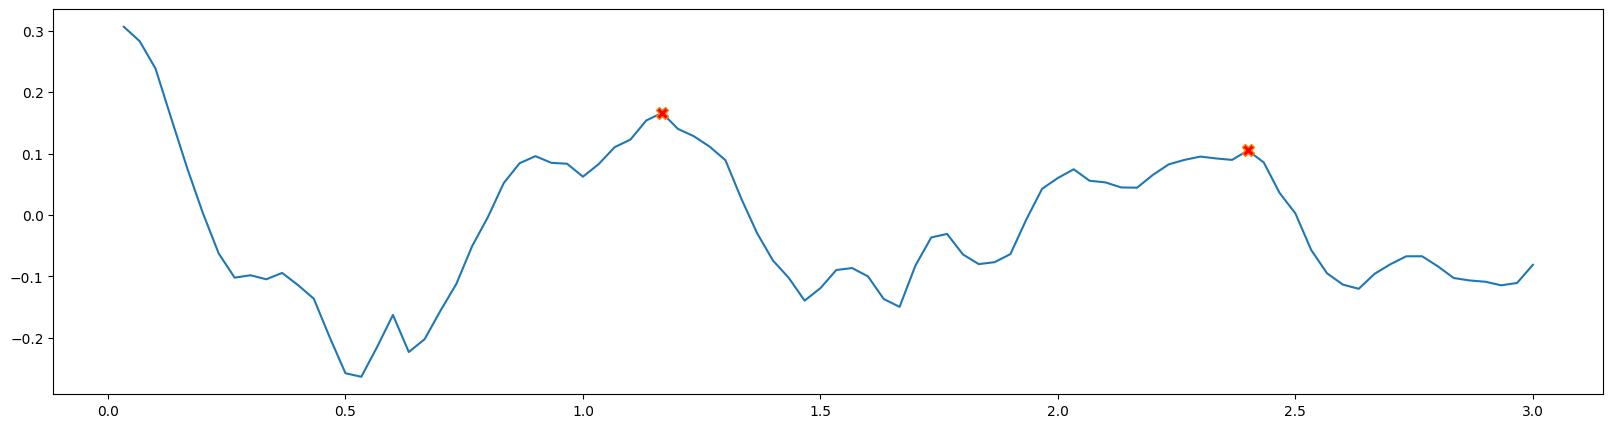

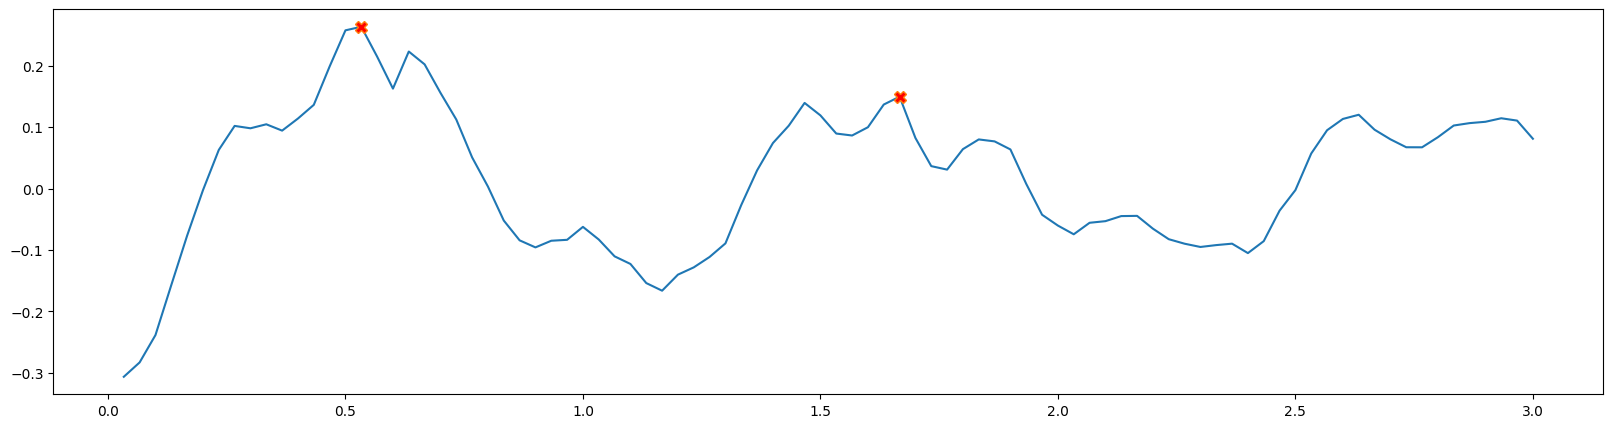

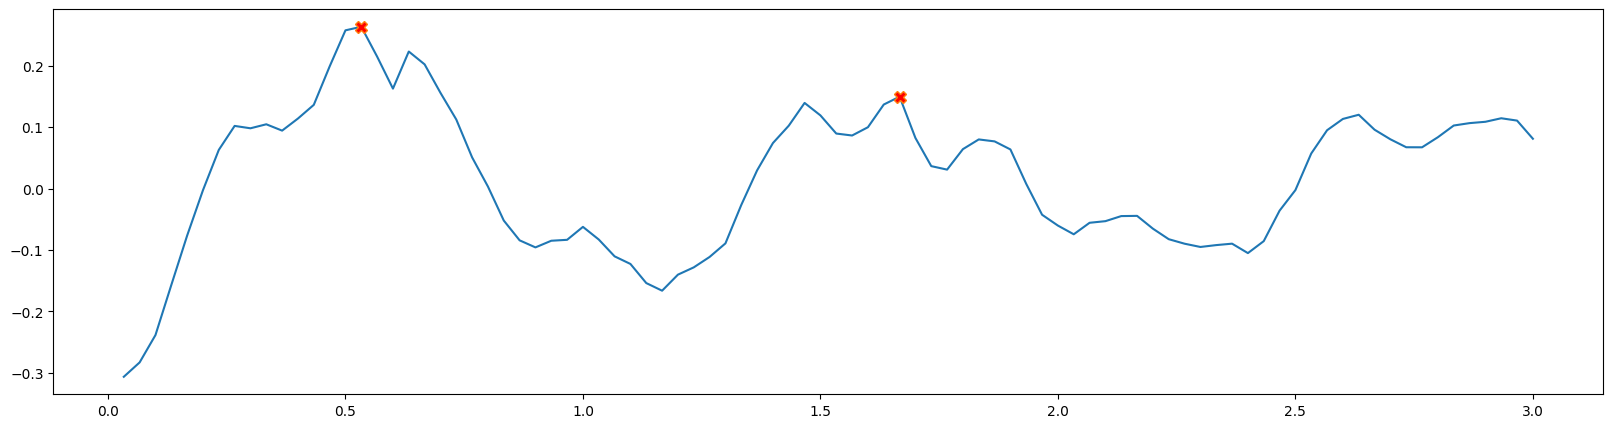

t1 1.1666666666666667
results [1.4599170967354542]
t1 1.1666666666666667
results [0.38678711983317204]
t1 1.1666666666666667
results [0.20546105812997306]
t1 1.1666666666666667
results [0.5121829048227006]
t1 1.1666666666666667
results [0.5160465735116885]
t1 1.1666666666666667
results [0.48455378678466277]
t1 1.1666666666666667
results [0.47113428857136985]
t1 1.1666666666666667
results [1.1300571355630105]
t1 1.1666666666666667
results [1.1176039061651926]
t1 1.1666666666666667
results [0.7199920021094314]
t1 1.1666666666666667
results [0.7106866002887425]
t1 1.1666666666666667
results [0.7492304964467116]
t1 1.1666666666666667
results [0.7492304964467116]
t1 1.1666666666666667
results [0.12709082727054066]
t1 1.1666666666666667
results [0.03768776882850253]
t1 1.1666666666666667
results [0.023526351060997572]
t1 1.1666666666666667
results [0.06124943878743733]
t1 1.1666666666666667
results [0.9570597354025597] 1.1666666666666667
t1 1.1666666666666667
results [0.9995336667694243] 1.1

           t  count        po        sw       flr       fll       stl  \
0   0.033333    1.0  2.786392  0.098071  0.308811 -0.308811  0.831471   
1   0.066667    2.0  2.997725  0.102393  0.253314 -0.253314  0.363699   
2   0.100000    3.0  2.787383  0.118325  0.135186 -0.135186  0.026565   
3   0.133333    4.0  4.466867  0.133160  0.035514 -0.035514  0.206018   
4   0.166667    5.0  4.548233  0.133238 -0.034610  0.034610  0.439674   
..       ...    ...       ...       ...       ...       ...       ...   
95  3.200000   96.0  5.717032  0.062968  0.102425 -0.102425  0.208323   
96  3.233333   97.0  6.010291  0.062732  0.106059 -0.106059  0.318561   
97  3.266667   98.0  5.986868  0.060646  0.101021 -0.101021  0.304894   
98  3.300000   99.0  5.951794  0.036670  0.094192 -0.094192  0.263485   
99  3.333333  100.0  5.438772  0.022759  0.101210 -0.101210  0.390676   

       right      left  
0   0.563835  0.488251  
1   0.563580  0.487975  
2   0.562604  0.487313  
3   0.562011  0.487138 

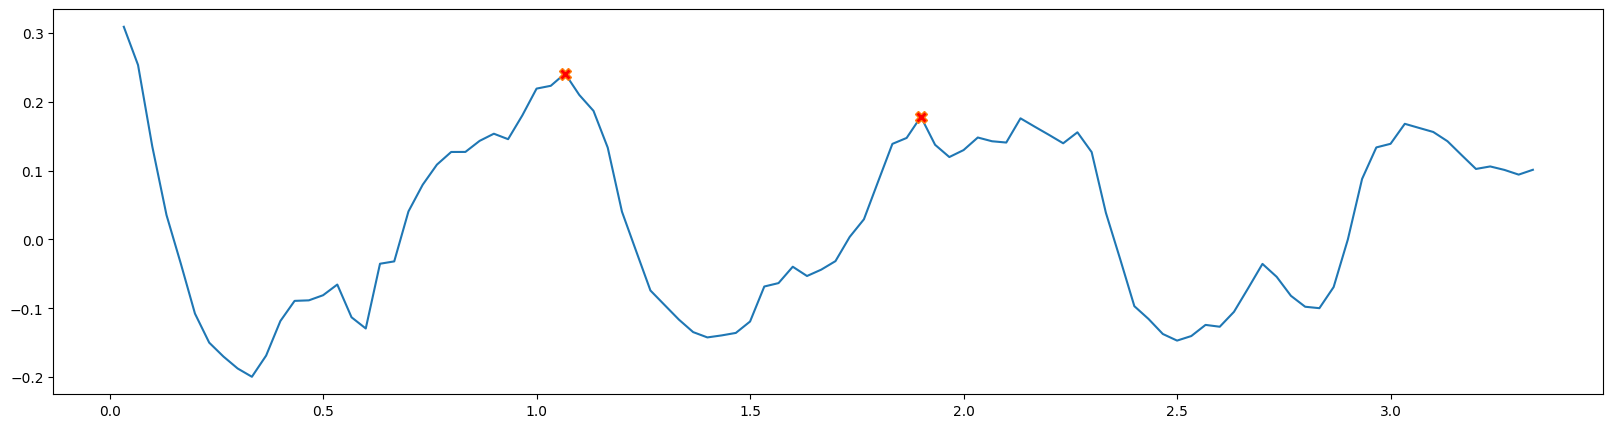

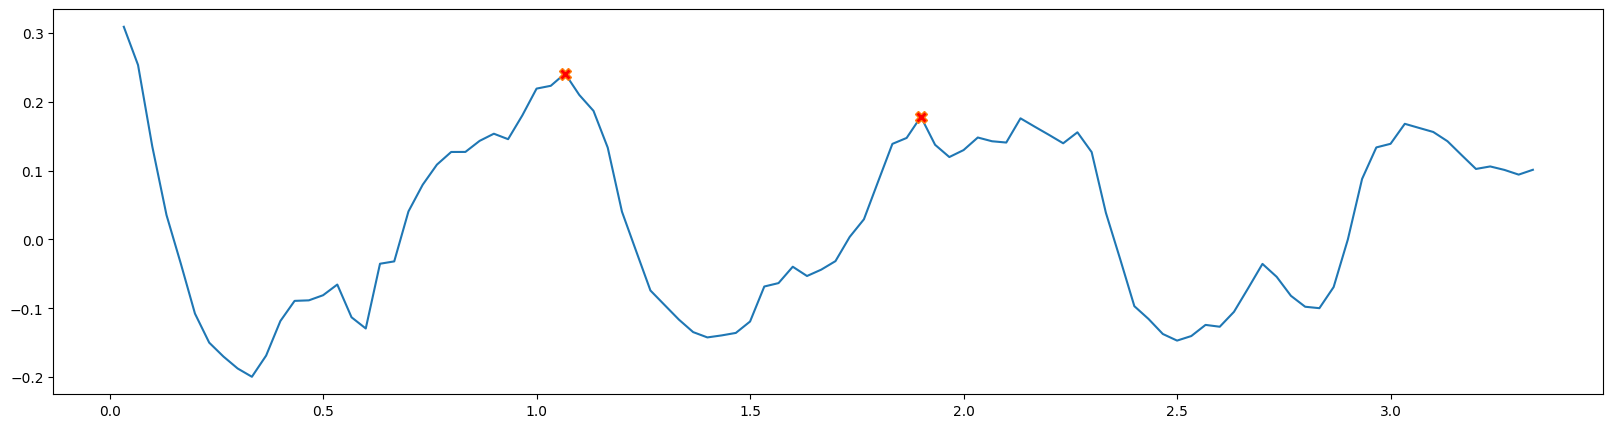

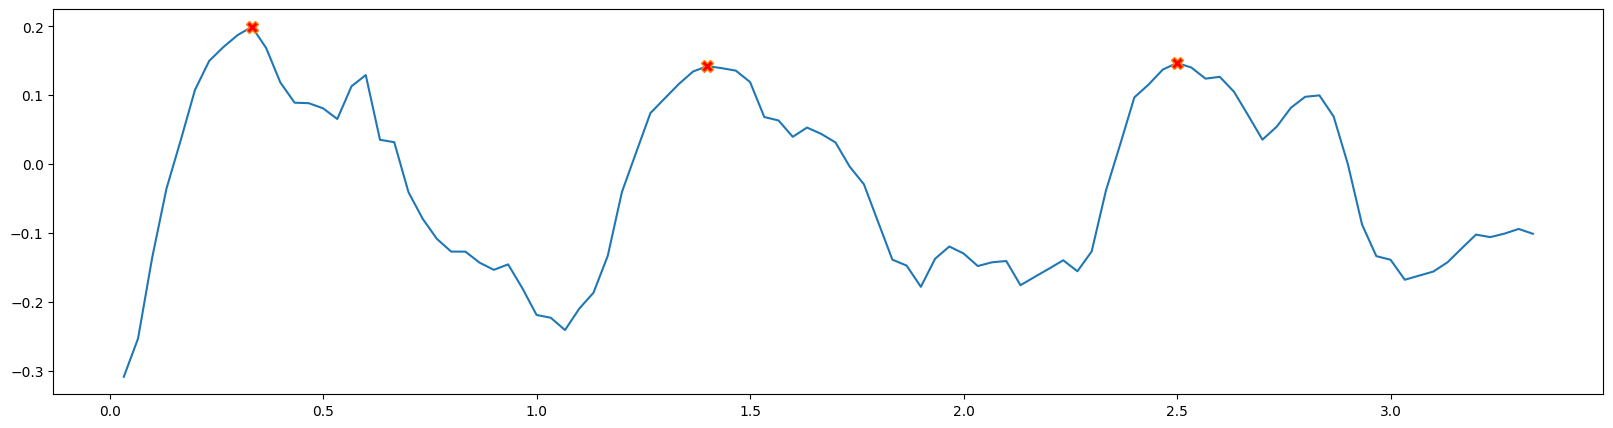

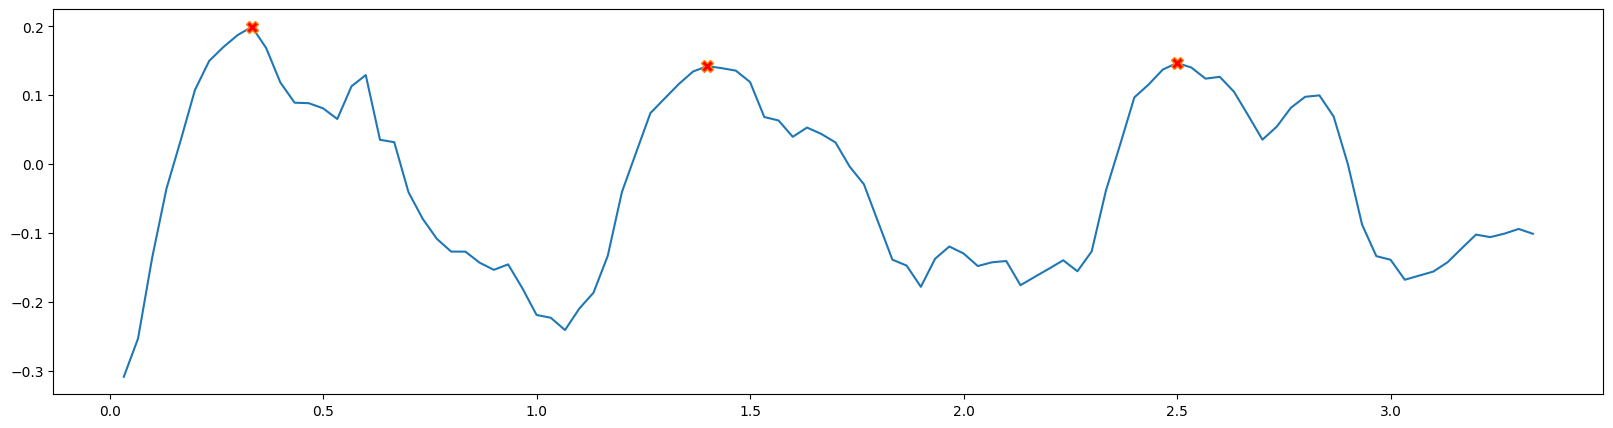

t1 1.0666666666666667
results [1.3775986810631708]
t1 1.0666666666666667
results [0.35826394959959174]
t1 1.0666666666666667
results [0.180977037833165]
t1 1.0666666666666667
results [0.5412164784669756]
t1 1.0666666666666667
results [0.5443897646366778]
t1 1.0666666666666667
results [0.37701628347659244]
t1 1.0666666666666667
results [0.521816907099418]
t1 1.0666666666666667
results [1.0403024579554583]
t1 1.0666666666666667
results [1.1977187241087484]
t1 1.0666666666666667
results [0.6802568694706606]
t1 1.0666666666666667
results [0.6716847133502847]
t1 1.0666666666666667
results [0.7059139677128864]
t1 1.0666666666666667
results [0.7059139677128864]
t1 1.0666666666666667
results [0.11780901106848837]
t1 1.0666666666666667
results [0.03717036866672143]
t1 1.0666666666666667
results [0.022479979604702997]
t1 1.0666666666666667
results [0.05872120708144487]
t1 1.0666666666666667
results [0.8863372054616694] 1.0666666666666667
t1 1.0666666666666667
results [0.9992767404194692] 1.06666

In [36]:
for idx in range(len(name_list)):
    name=name_list[idx]
    f_file = open('new_key_arrays_all/new_test_key_arrays/{}/{}/key_array_{}_{}_{}.pkl'.format(cam,direction,name,direction,vid_no), 'rb')
    
    key_array = pickle.load(f_file)
    f_file.close()
    
    ##Upper body height
    H=[]
    for i in range(len(key_array)):
        #time
        t=key_array[i][12][3]
    
        #upper body height
        x1,x2 = (((key_array[i][11][0]+key_array[i][12][0])/2),((key_array[i][23][0]+key_array[i][24][0])/2))
        y1,y2 = (((key_array[i][11][1]+key_array[i][12][1])/2),((key_array[i][23][1]+key_array[i][24][1])/2))
        #z1,z2 = (((key_array[i][11][2]+key_array[i][12][2])/2),((key_array[i][23][2]+key_array[i][24][2])/2))
        ubh = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
        #ubh = math.sqrt(((x1-x2)**2)+((y1-y2)**2)+((z1-z2)**2))
    
        #shoulder length
        x_sl1,x_sl2 = (key_array[i][11][0],key_array[i][12][0])
        y_sl1,y_sl2 = (key_array[i][11][1],key_array[i][12][1])
        #z_sl1,z_sl2 = (key_array[i][11][2],key_array[i][12][2])
        sl=math.sqrt(((x_sl1-x_sl2)**2)+((y_sl1-y_sl2)**2))
        #sl=math.sqrt(((x_sl1-x_sl2)**2)+((y_sl1-y_sl2)**2)+((z_sl1-z_sl2)**2))
    
        #center of upper body in depth
        center=(key_array[i][11][2]+key_array[i][12][2]+key_array[i][23][2]+key_array[i][24][2])/4
    
        #right and left shoulders
        right=key_array[i][12][0]
        left=key_array[i][11][0]
    
        H.append([ubh])
        H[i].append(t)
        H[i].append(center)
        H[i].append(right)
        H[i].append(left)
        H[i].append(sl)
        H[i].append(sl/ubh)
   
    
    H_array = np.array(H)
    print(H_array)

    df = pd.DataFrame(H_array,columns=['ubh','t','center','r_sdr','l_sdr','sl','sln'])
    df_ubh = pd.DataFrame(H_array,columns=['ubh','t','sl','sln','center','r_sdr','l_sdr'])
    
    df_upper_body_height=df_ubh.iloc[:,0]
    
    from scipy.interpolate import UnivariateSpline

    spl = UnivariateSpline(df.t, df.r_sdr, k=4, s=0)
    r_sdr_diff= spl.derivative()
    spl = UnivariateSpline(df.t, df.l_sdr, k=4, s=0)
    l_sdr_diff= spl.derivative()
    
    ##Length of lower body
    lb=[]
    for i in range(len(key_array)):
        t=key_array[i][11][3]
        l_xy=(thigh_r(i)[0]+shank_r(i)[0])/ubl(i)
        l_xy_visi=(thigh_r(i)[1]*shank_r(i)[1])
        #l_xy=thigh_r(i)+shank_r(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        lb.append([l_xy])
        lb[i].append(right)
        lb[i].append(left)
        lb[i].append(t)
        lb[i].append(l_xy_visi)
    ratio_ub_lb=np.array(lb) 
    df_lb = pd.DataFrame(ratio_ub_lb,columns=['l_xy','r_sdr','l_sdr','t','visi_l_xy'])
    
    df_lower_body_length=df_lb.iloc[:,0]
    df_lower_body_length_visi=df_lb.iloc[:,-1]
    
    ##Shoulder length
    sl=[]
    for i in range(len(key_array)):
        t=key_array[i][11][3]
        #l_xy=shoulder(i)
        l_xy=shoulder(i)[0]/ubl(i)
        l_xy_visi=shoulder(i)[1]
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        sl.append([l_xy])
        sl[i].append(right)
        sl[i].append(left)
        sl[i].append(t)
        sl[i].append(l_xy_visi)
    shoulder_length=np.array(sl) 
    df_shoulder_l = pd.DataFrame(shoulder_length,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_shoulder_length=df_shoulder_l.iloc[:,0]
    df_shoulder_length_visi=df_shoulder_l.iloc[:,-1]
    
    ##Hip size
    hip=[]
    for i in range(len(key_array)):
        t=key_array[i][23][3]
        def hip_size(k):
            l_xy=length(key_array[k][24][0],key_array[k][23][0],key_array[k][24][1],key_array[k][23][1],0,0)
            visi=key_array[k][24][4]*key_array[k][23][4]
            return l_xy,visi
        
        l_xy=hip_size(i)[0]/ubl(i)
        l_xy_visi=hip_size(i)[1]
    
        #l_xy=hip_size(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        hip.append([l_xy])
        hip[i].append(right)
        hip[i].append(left)
        hip[i].append(t)
        hip[i].append(l_xy_visi)
    hip_size=np.array(hip) 
    df_hip = pd.DataFrame(hip_size,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_hip_size=df_hip.iloc[:,0]
    df_hip_size_visi=df_hip.iloc[:,-1]
    
    ## Length of upper arm
    u_arm=[]
    for i in range(len(key_array)):
        t=key_array[i][12][3]
        l_xy_r=upper_arm_r(i)[0]/ubl(i)
        l_xy_l=upper_arm_l(i)[0]/ubl(i)
        l_xy_r_visi=upper_arm_r(i)[1]
        l_xy_l_visi=upper_arm_l(i)[1]
    
        #l_xy_r=upper_arm_r(i)
        #l_xy_l=upper_arm_l(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        u_arm.append([l_xy_r])
        u_arm[i].append(l_xy_l)
        u_arm[i].append(right)
        u_arm[i].append(left)
        u_arm[i].append(t)
        u_arm[i].append(l_xy_r_visi)
        u_arm[i].append(l_xy_l_visi)
    upper_arm=np.array(u_arm) 
    df_u_arm = pd.DataFrame(upper_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t','l_xy_r_visi','l_xy_l_visi'])
    
    df_upper_arm_length_left=df_u_arm.iloc[:,1]
    df_upper_arm_length_right=df_u_arm.iloc[:,0]
    
    df_upper_arm_length_left_visi=df_u_arm.iloc[:,-1]
    df_upper_arm_length_right_visi=df_u_arm.iloc[:,-2]
    
    ##Length of lower arm
    l_arm=[]
    for i in range(len(key_array)):
        t=key_array[i][14][3]
        l_xy_r=lower_arm_r(i)[0]/ubl(i)
        l_xy_l=lower_arm_l(i)[0]/ubl(i)
        l_xy_r_visi=lower_arm_r(i)[1]
        l_xy_l_visi=lower_arm_l(i)[1]
        
    
        #l_xy_r=lower_arm_r(i)
        #l_xy_l=lower_arm_l(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        l_arm.append([l_xy_r])
        l_arm[i].append(l_xy_l)
        l_arm[i].append(right)
        l_arm[i].append(left)
        l_arm[i].append(t)
        l_arm[i].append(l_xy_r_visi)
        l_arm[i].append(l_xy_l_visi)
    lower_arm=np.array(l_arm) 
    df_l_arm = pd.DataFrame(lower_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t','l_xy_r_visi','l_xy_r_visi'])
    
    df_lower_arm_length_left=df_l_arm.iloc[:,1]
    df_lower_arm_length_right=df_l_arm.iloc[:,0]
    df_lower_arm_length_left_visi=df_l_arm.iloc[:,-1]
    df_lower_arm_length_right_visi=df_l_arm.iloc[:,-2]
    
    ##Length of arm
    arm=[]
    for i in range(len(key_array)):
        t=key_array[i][12][3]
        #l_xy_r=upper_arm_r(i)+lower_arm_r(i)+palm_to_finger_r(i)/ubl(i)
        #l_xy_l=upper_arm_l(i)+lower_arm_l(i)+palm_to_finger_l(i)/ubl(i)
    
        l_xy_r=(upper_arm_r(i)[0]+lower_arm_r(i)[0]+palm_to_finger_r(i)[0])/ubl(i)
        l_xy_l=(upper_arm_l(i)[0]+lower_arm_l(i)[0]+palm_to_finger_l(i)[0])/ubl(i)
        l_xy_r_visi=(upper_arm_r(i)[1]*lower_arm_r(i)[1]*palm_to_finger_r(i)[1])
        l_xy_l_visi=(upper_arm_l(i)[1]*lower_arm_l(i)[1]*palm_to_finger_l(i)[1])
        
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        arm.append([l_xy_r])
        arm[i].append(l_xy_l)
        arm[i].append(right)
        arm[i].append(left)
        arm[i].append(t)
        arm[i].append(l_xy_r_visi)
        arm[i].append(l_xy_l_visi)
    Length_of_arm=np.array(arm) 
    df_arm = pd.DataFrame(Length_of_arm,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t','l_xy_r_visi','l_xy_l_visi'])
    
    df_arm_length_left=df_arm.iloc[:,1]
    df_arm_length_right=df_arm.iloc[:,0]
    df_arm_length_left_visi=df_arm.iloc[:,-1]
    df_arm_length_right_visi=df_arm.iloc[:,-2]
    
    
    ##Length of thigh
    th=[]
    for i in range(len(key_array)):
        t=key_array[i][24][3]
        l_xy_r=thigh_r(i)[0]/ubl(i)
        l_xy_l=thigh_l(i)[0]/ubl(i)
        l_xy_r_visi=thigh_r(i)[1]
        l_xy_l_visi=thigh_l(i)[1]
        #l_xy_r=thigh_r(i)
        #l_xy_l=thigh_l(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        th.append([l_xy_r])
        th[i].append(l_xy_l)
        th[i].append(right)
        th[i].append(left)
        th[i].append(t)
        th[i].append(l_xy_r_visi)
        th[i].append(l_xy_l_visi)
    thigh=np.array(th) 
    df_thigh= pd.DataFrame(thigh,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t','l_xy_r_visi','l_xy_l_visi'])
    
    df_thigh_length_left=df_thigh.iloc[:,1]
    df_thigh_length_right=df_thigh.iloc[:,0]
    df_thigh_length_left_visi=df_thigh.iloc[:,-1]
    df_thigh_length_right_visi=df_thigh.iloc[:,-2]
    
    ##Length of shank
    shk=[]
    for i in range(len(key_array)):
        t=key_array[i][26][3]
        l_xy_r=shank_r(i)[0]/ubl(i)
        l_xy_l=shank_r(i)[0]/ubl(i)
        l_xy_r_visi=shank_r(i)[1]
        l_xy_l_visi=shank_r(i)[1]
        
        #l_xy_r=shank_r(i)
        #l_xy_l=shank_l(i)
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        shk.append([l_xy_r])
        shk[i].append(l_xy_l)
        shk[i].append(right)
        shk[i].append(left)
        shk[i].append(t)
        shk[i].append(l_xy_r_visi)
        shk[i].append(l_xy_l_visi)
    shank=np.array(shk) 
    df_shk = pd.DataFrame(shank,columns=['l_xy_r','l_xy_l','r_sdr','l_sdr','t','l_xy_r_visi','l_xy_l_visi'])
    
    df_shank_length_left=df_shk.iloc[:,1]
    df_shank_length_right=df_shk.iloc[:,0]
    df_shank_length_left_visi=df_shk.iloc[:,-1]
    df_shank_length_right_visi=df_shk.iloc[:,-2]
    
    ##Face width ear to ear
    Face_width=[]
    for i in range(len(key_array)):
        t=key_array[i][8][3]
        l_xy=face_width(i)[0]/ubl(i)
        l_xy_visi=face_width(i)[1]
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        Face_width.append([l_xy])
        Face_width[i].append(right)
        Face_width[i].append(left)
        Face_width[i].append(t)
        Face_width[i].append(l_xy_visi)
    Face_width_ear_to_ear=np.array(Face_width) 
    df_Face_width = pd.DataFrame(Face_width_ear_to_ear,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_Face_width_ear_to_ear=df_Face_width.iloc[:,0]
    df_Face_width_ear_to_ear_visi=df_Face_width.iloc[:,-1]
    
    ##Mouth width
    mouth=[]
    for i in range(len(key_array)):
        t=key_array[i][9][3]
        def mouth_width(k):
            l_xy=length(key_array[k][9][0],key_array[k][10][0],key_array[k][9][1],key_array[k][10][1],0,0)
            visi=key_array[k][9][4]*key_array[k][10][4]
            return l_xy,visi
        l_xy=mouth_width(i)[0]/ubl(i)
        l_xy_visi=mouth_width(i)[1]
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        mouth.append([l_xy])
        mouth[i].append(right)
        mouth[i].append(left)
        mouth[i].append(t)
        mouth[i].append(l_xy_visi)
    mouth_width=np.array(mouth) 
    df_mouth = pd.DataFrame(mouth_width,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_mouth_width=df_mouth.iloc[:,0]
    df_mouth_width_visi=df_mouth.iloc[:,-1]
    
    ##eye size
    eye=[]
    for i in range(len(key_array)):
        t=key_array[i][6][3]
        l_xy=eye_size(i)[0]/ubl(i)
        l_xy_visi=eye_size(i)[1]
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        eye.append([l_xy])
        eye[i].append(right)
        eye[i].append(left)
        eye[i].append(t)
        eye[i].append(l_xy_visi)
    eye_width=np.array(eye) 
    df_eye = pd.DataFrame(eye_width,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_eye_size=df_eye.iloc[:,0]
    df_eye_size_visi=df_eye.iloc[:,-1]
    
    ##Distance between eyes Midpoints
    eyes_mid=[]
    for i in range(len(key_array)):
        t=key_array[i][5][3]
        l_xy=eyes_midpoints(i)[0]/ubl(i)
        l_xy_visi=eyes_midpoints(i)[1]
        right = key_array[i][12][0]
        left = key_array[i][11][0]
        eyes_mid.append([l_xy])
        eyes_mid[i].append(right)
        eyes_mid[i].append(left)
        eyes_mid[i].append(t)
        eyes_mid[i].append(l_xy_visi)
        
    eyes_mid_width=np.array(eyes_mid) 
    df_eyes_mid = pd.DataFrame(eyes_mid_width,columns=['l_xy','r_sdr','l_sdr','t','l_xy_visi'])
    
    df_eyes_mid_width=df_eyes_mid.iloc[:,0]
    df_eyes_mid_width_visi=df_eyes_mid.iloc[:,-1]
    
    ###DETECTING GAIT
    PARA=[]

    count=0
    for i in range(len(key_array)):
        t=key_array[i][28][3]
        po=math.degrees(pelvic_obliquity(key_array[i][23][0],key_array[i][24][0],key_array[i][23][1],key_array[i][24][1]))
        sw=step_width(key_array[i][11][0],key_array[i][12][0],key_array[i][23][0],key_array[i][24][0],key_array[i][11][1],key_array[i][12][1],key_array[i][23][1],key_array[i][24][1],key_array[i][29][0],key_array[i][30][0])
        flr=foot_lifting(key_array[i][28][1],key_array[i][27][1],key_array[i][11][0],key_array[i][12][0],key_array[i][23][0],key_array[i][24][0],key_array[i][11][1],key_array[i][12][1],key_array[i][23][1],key_array[i][24][1])
        fll=foot_lifting(key_array[i][27][1],key_array[i][28][1],key_array[i][11][0],key_array[i][12][0],key_array[i][23][0],key_array[i][24][0],key_array[i][11][1],key_array[i][12][1],key_array[i][23][1],key_array[i][24][1])
        stl=step_length(key_array[i][11][0],key_array[i][12][0],key_array[i][23][0],key_array[i][24][0],key_array[i][11][1],key_array[i][12][1],key_array[i][23][1],key_array[i][24][1],key_array[i][27][2],key_array[i][28][2])
        count = count +1
        right = key_array[i][12][0]
        left = key_array[i][11][0]

        ##TODO: I comment out this listed {sl}
        #S_L.append([sl])
    
        PARA.append([t])
        PARA[i].append(count)
        PARA[i].append(po)
        PARA[i].append(sw)
        PARA[i].append(flr)
        PARA[i].append(fll)
        PARA[i].append(stl)
        PARA[i].append(right)
        PARA[i].append(left)
    
    parameters = np.array(PARA)
    df_para = pd.DataFrame(parameters,columns=['t','count','po','sw','flr','fll','stl','right','left'])
    print(df_para)
    
    ##Foot lifting right
    flr_peaks=get_peaks(df_para,df_para.flr,0.2)
    Time_to_index_ratio=(flr_peaks[1]-flr_peaks[0])/(df.t[flr_peaks[1]]-df.t[flr_peaks[0]])
    df_time=time_diff(flr_peaks,df)
    flr_peaks_rd=remove_distinct_peaks(df_time,df,Time_to_index_ratio,df_para.flr,0.2,0.1)
    
    fll_peaks=get_peaks(df_para,df_para.fll,0.2)
    Time_to_index_ratio=(fll_peaks[1]-fll_peaks[0])/(df.t[fll_peaks[1]]-df.t[fll_peaks[0]])
    df_time=time_diff(fll_peaks,df)
    fll_peaks_rd=remove_distinct_peaks(df_time,df,Time_to_index_ratio,df_para.fll,0.2,0.1)
    
    df_lower_body_length=df_lb.iloc[:,0]
    df_shoulder_length=df_shoulder_l.iloc[:,0]
    df_hip_size=df_hip.iloc[:,0]
    df_upper_arm_length_left=df_u_arm.iloc[:,1]
    df_upper_arm_length_right=df_u_arm.iloc[:,0]
    df_lower_arm_length_left=df_l_arm.iloc[:,1]
    df_lower_arm_length_right=df_l_arm.iloc[:,0]
    df_arm_length_left=df_arm.iloc[:,1]
    df_arm_length_right=df_arm.iloc[:,0]
    df_thigh_length_left=df_thigh.iloc[:,1]
    df_thigh_length_right=df_thigh.iloc[:,0]
    df_shank_length_left=df_shk.iloc[:,1]
    df_shank_length_right=df_shk.iloc[:,0]
    df_Face_width_ear_to_ear=df_Face_width.iloc[:,0]
    df_mouth_width=df_mouth.iloc[:,0]
    df_eye_size=df_eye.iloc[:,0]
    df_eyes_mid_width=df_eyes_mid.iloc[:,0]
    
    df_lower_body_length_avg=calculate_averages(flr_peaks_rd,
                                                df_lower_body_length)
    df_shoulder_length_avg=calculate_averages(flr_peaks_rd,
                                                df_shoulder_length)
    df_hip_size_avg=calculate_averages(flr_peaks_rd,
                                                df_hip_size)
    df_upper_arm_length_left_avg=calculate_averages(flr_peaks_rd,
                                                df_upper_arm_length_left)
    df_upper_arm_length_right_avg=calculate_averages(flr_peaks_rd,
                                                df_upper_arm_length_right)
    df_lower_arm_length_left_avg=calculate_averages(flr_peaks_rd,
                                                df_lower_arm_length_left)
    df_lower_arm_length_right_avg=calculate_averages(flr_peaks_rd,
                                                df_lower_arm_length_right)
    df_arm_length_left_avg=calculate_averages(flr_peaks_rd,
                                                df_arm_length_left)
    df_arm_length_right_avg=calculate_averages(flr_peaks_rd,
                                                df_arm_length_right)
    df_thigh_length_left_avg=calculate_averages(flr_peaks_rd,
                                                df_thigh_length_left)
    df_thigh_length_right_avg=calculate_averages(flr_peaks_rd,
                                                df_thigh_length_right)
    df_shank_length_left_avg=calculate_averages(flr_peaks_rd,
                                                df_shank_length_left)
    df_shank_length_right_avg=calculate_averages(flr_peaks_rd,
                                                df_shank_length_right)
    df_Face_width_ear_to_ear_avg=calculate_averages(flr_peaks_rd,
                                                df_Face_width_ear_to_ear)
    df_mouth_width_avg=calculate_averages(flr_peaks_rd,
                                                df_mouth_width)
    df_eye_size_avg=calculate_averages(flr_peaks_rd,
                                                df_eye_size)
    df_eyes_mid_width_avg=calculate_averages(flr_peaks_rd,
                                                df_eyes_mid_width)
    
    ##visibility
    lower_body_length_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_lower_body_length_visi)
    shoulder_length_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_shoulder_length_visi)
    hip_size_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_hip_size_visi)
    upper_arm_length_left_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_upper_arm_length_left_visi)
    upper_arm_length_right_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_upper_arm_length_right_visi)
    lower_arm_length_left_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_lower_arm_length_left_visi)
    lower_arm_length_right_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_lower_arm_length_right_visi)
    arm_length_left_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_arm_length_left_visi)
    arm_length_right_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_arm_length_right_visi)
    thigh_length_left_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_thigh_length_left_visi)
    thigh_length_right_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_thigh_length_right_visi)
    shank_length_left_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_shank_length_left_visi)
    shank_length_right_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_shank_length_right_visi)
    Face_width_ear_to_ear_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_Face_width_ear_to_ear_visi)
    mouth_width_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_mouth_width_visi)
    eye_size_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_eye_size_visi)
    eyes_mid_width_avg_visi=calculate_averages_visi(flr_peaks_rd,
                                                df_eyes_mid_width_visi)
    
    df_lower_body_length_avg_visi=pd.DataFrame(lower_body_length_avg_visi,columns=['lower_body_length_avg_visi'])
    df_shoulder_length_avg_visi=pd.DataFrame(shoulder_length_avg_visi,columns=['shoulder_length_avg_visi'])
    df_hip_size_avg_visi=pd.DataFrame(hip_size_avg_visi,columns=['hip_size_avg_visi'])
    df_upper_arm_length_left_avg_visi=pd.DataFrame(upper_arm_length_left_avg_visi,columns=['upper_arm_length_left_avg_visi'])
    df_upper_arm_length_right_avg_visi=pd.DataFrame(upper_arm_length_right_avg_visi,columns=['upper_arm_length_right_avg_visi'])
    df_lower_arm_length_left_avg_visi=pd.DataFrame(lower_arm_length_left_avg_visi,columns=['lower_arm_length_left_avg_visi'])
    df_lower_arm_length_right_avg_visi=pd.DataFrame(lower_arm_length_right_avg_visi,columns=['lower_arm_length_right_avg_visi'])
    df_arm_length_left_avg_visi=pd.DataFrame(arm_length_left_avg_visi,columns=['arm_length_left_avg_visi'])
    df_arm_length_right_avg_visi=pd.DataFrame(arm_length_right_avg_visi,columns=['arm_length_right_avg_visi'])
    df_thigh_length_left_avg_visi=pd.DataFrame(thigh_length_left_avg_visi,columns=['thigh_length_left_avg_visi'])
    df_thigh_length_right_avg_visi=pd.DataFrame(thigh_length_right_avg_visi,columns=['thigh_length_right_avg_visi'])
    df_shank_length_left_avg_visi=pd.DataFrame(shank_length_left_avg_visi,columns=['shank_length_left_avg_visi'])
    df_shank_length_right_avg_visi=pd.DataFrame(shank_length_right_avg_visi,columns=['shank_length_right_avg_visi'])
    df_Face_width_ear_to_ear_avg_visi=pd.DataFrame(Face_width_ear_to_ear_avg_visi,columns=['sFace_width_ear_to_ear_avg_visi'])
    df_mouth_width_avg_visi=pd.DataFrame(mouth_width_avg_visi,columns=['mouth_width_avg_visi'])
    df_eye_size_avg_visi=pd.DataFrame(eye_size_avg_visi,columns=['eye_size_avg_visi'])
    df_eyes_mid_width_avg_visi=pd.DataFrame(eyes_mid_width_avg_visi,columns=['eyes_mid_width_avg_visi'])
    
    df_visi = pd.concat([df_lower_body_length_avg_visi,
                                 df_shoulder_length_avg_visi,
                                 df_hip_size_avg_visi,
                                 df_upper_arm_length_left_avg_visi,
                                 df_upper_arm_length_right_avg_visi,
                                 df_lower_arm_length_left_avg_visi,
                                 df_lower_arm_length_right_avg_visi,
                                 df_arm_length_left_avg_visi,
                                 df_arm_length_right_avg_visi,
                                 df_thigh_length_left_avg_visi,
                                 df_thigh_length_right_avg_visi,
                                 df_shank_length_left_avg_visi,
                                 df_shank_length_right_avg_visi,
                                 df_Face_width_ear_to_ear_avg_visi,
                                 df_mouth_width_avg_visi,
                                 df_eye_size_avg_visi,
                                 df_eyes_mid_width_avg_visi], axis=1,
                                )
    
    
    df_static_front = pd.concat([df_lower_body_length_avg[1],df_lower_body_length_avg[0],
                                 df_shoulder_length_avg[0],
                                 df_hip_size_avg[0],
                                 df_upper_arm_length_left_avg[0],
                                 df_upper_arm_length_right_avg[0],
                                 df_lower_arm_length_left_avg[0],
                                 df_lower_arm_length_right_avg[0],
                                 df_arm_length_left_avg[0],
                                 df_arm_length_right_avg[0],
                                 df_thigh_length_left_avg[0],
                                 df_thigh_length_right_avg[0],
                                 df_shank_length_left_avg[0],
                                 df_shank_length_right_avg[0],
                                 df_Face_width_ear_to_ear_avg[0],
                                 df_mouth_width_avg[0],
                                 df_eye_size_avg[0],
                                 df_eyes_mid_width_avg[0]], axis=1,
                                keys=['time','df_lower_body_length_avg',
                                      'df_shoulder_length_avg',
                                      'df_hip_size_avg',
                                      'df_upper_arm_length_left_avg',
                                      'df_upper_arm_length_right_avg',
                                      'df_lower_arm_length_left_avg',
                                      'df_lower_arm_length_right_avg',
                                      'df_arm_length_left_avg',
                                      'df_arm_length_right_avg',
                                      'df_thigh_length_left_avg',
                                      'df_thigh_length_right_avg',
                                      'df_shank_length_left_avg',
                                      'df_shank_length_right_avg',
                                      'df_Face_width_ear_to_ear_avg',
                                      'df_mouth_width_avg',
                                      'df_eye_size_avg',
                                      'df_eyes_mid_width_avg'])
    
    df_index=['time','df_lower_body_length_avg',
                                      'df_shoulder_length_avg',
                                      'df_hip_size_avg',
                                      'df_upper_arm_length_left_avg',
                                      'df_upper_arm_length_right_avg',
                                      'df_lower_arm_length_left_avg',
                                      'df_lower_arm_length_right_avg',
                                      'df_arm_length_left_avg',
                                      'df_arm_length_right_avg',
                                      'df_thigh_length_left_avg',
                                      'df_thigh_length_right_avg',
                                      'df_shank_length_left_avg',
                                      'df_shank_length_right_avg',
                                      'df_shank_length_left_avg',
                                      'df_Face_width_ear_to_ear_avg',
                                      'df_mouth_width_avg',
                                      'df_eye_size_avg',
                                      'df_eyes_mid_width_avg'] 
    
    df_comb=pd.concat([df_static_front,df_visi], axis=1)
    
    
    #print(df_static_front)
    output = open('parameters/Static/{}/{}/{}_{}_{}.pkl'.format(cam,direction,name,direction,vid_no), 'wb')
    pickle.dump(df_comb, output)
    output.close()
                                 
    print(cam,direction,name,direction,vid_no)
    
    
    
    
    